In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib
import sys
import os

project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)



from MieSppForce import frenel, dipoles, green_func, force

c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7

In [2]:
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

R = 110
dist = 2
a_angle = np.pi/4
phase=0
STOP=45
angle=25*np.pi/180
point = [0,0,dist+R]

z0 = point[2]

wls=np.linspace(400,1100,60)

In [3]:
F_z_air = np.empty(len(wls))

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], 1, point, R, eps_Si, 0,amplitude=1,phase=0,a_angle=0, stop=STOP, full_output=False)
    F_z_air[i] = f[2]

F0 = np.max(np.abs(F_z_air))

100%|██████████| 60/60 [00:00<00:00, 97.06it/s]


In [4]:

F_x = np.empty((len(wls), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)

for i in tqdm(range(len(wls))):
    f =  force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

 30%|███       | 18/60 [00:13<00:33,  1.27it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
 38%|███▊      | 23/60 [00:17<00:32,  1.15it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [00:52<00:00,  1.15it/s]


In [7]:
P,M = np.empty((len(wls),3), dtype=complex),np.empty((len(wls),3), dtype=complex)
for i in tqdm(range(len(wls))):
    p,m = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

100%|██████████| 60/60 [00:00<00:00, 2743.11it/s]


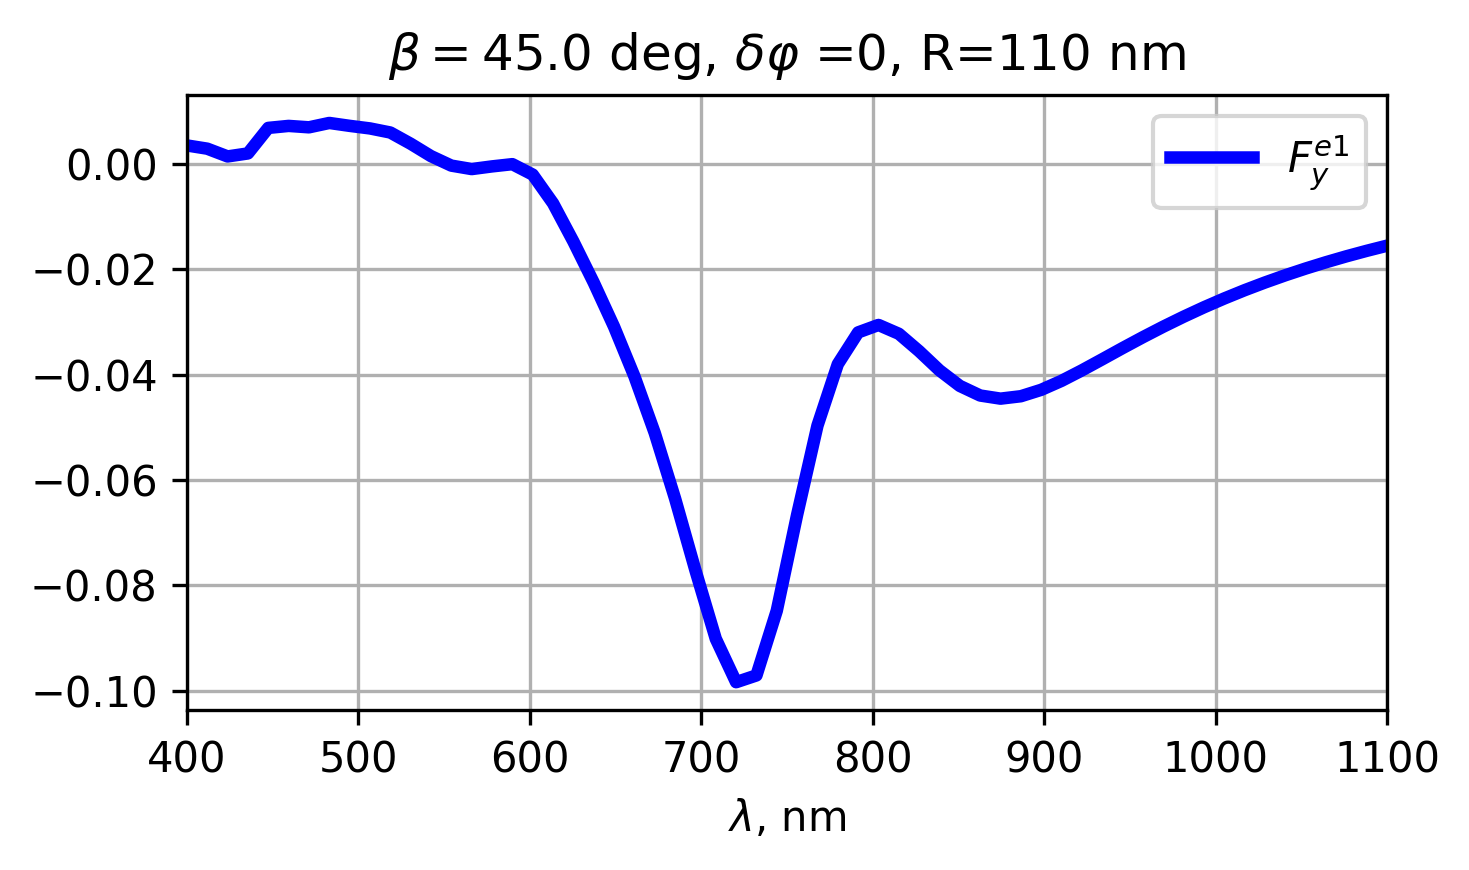

In [8]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, F_y[:,2]/F0, label='$F_y^{e1}$', lw=3, c='blue')
plt.xlim(wls[0], wls[-1])
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.xlabel('$\lambda$, nm')
plt.savefig(f'Fye1_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

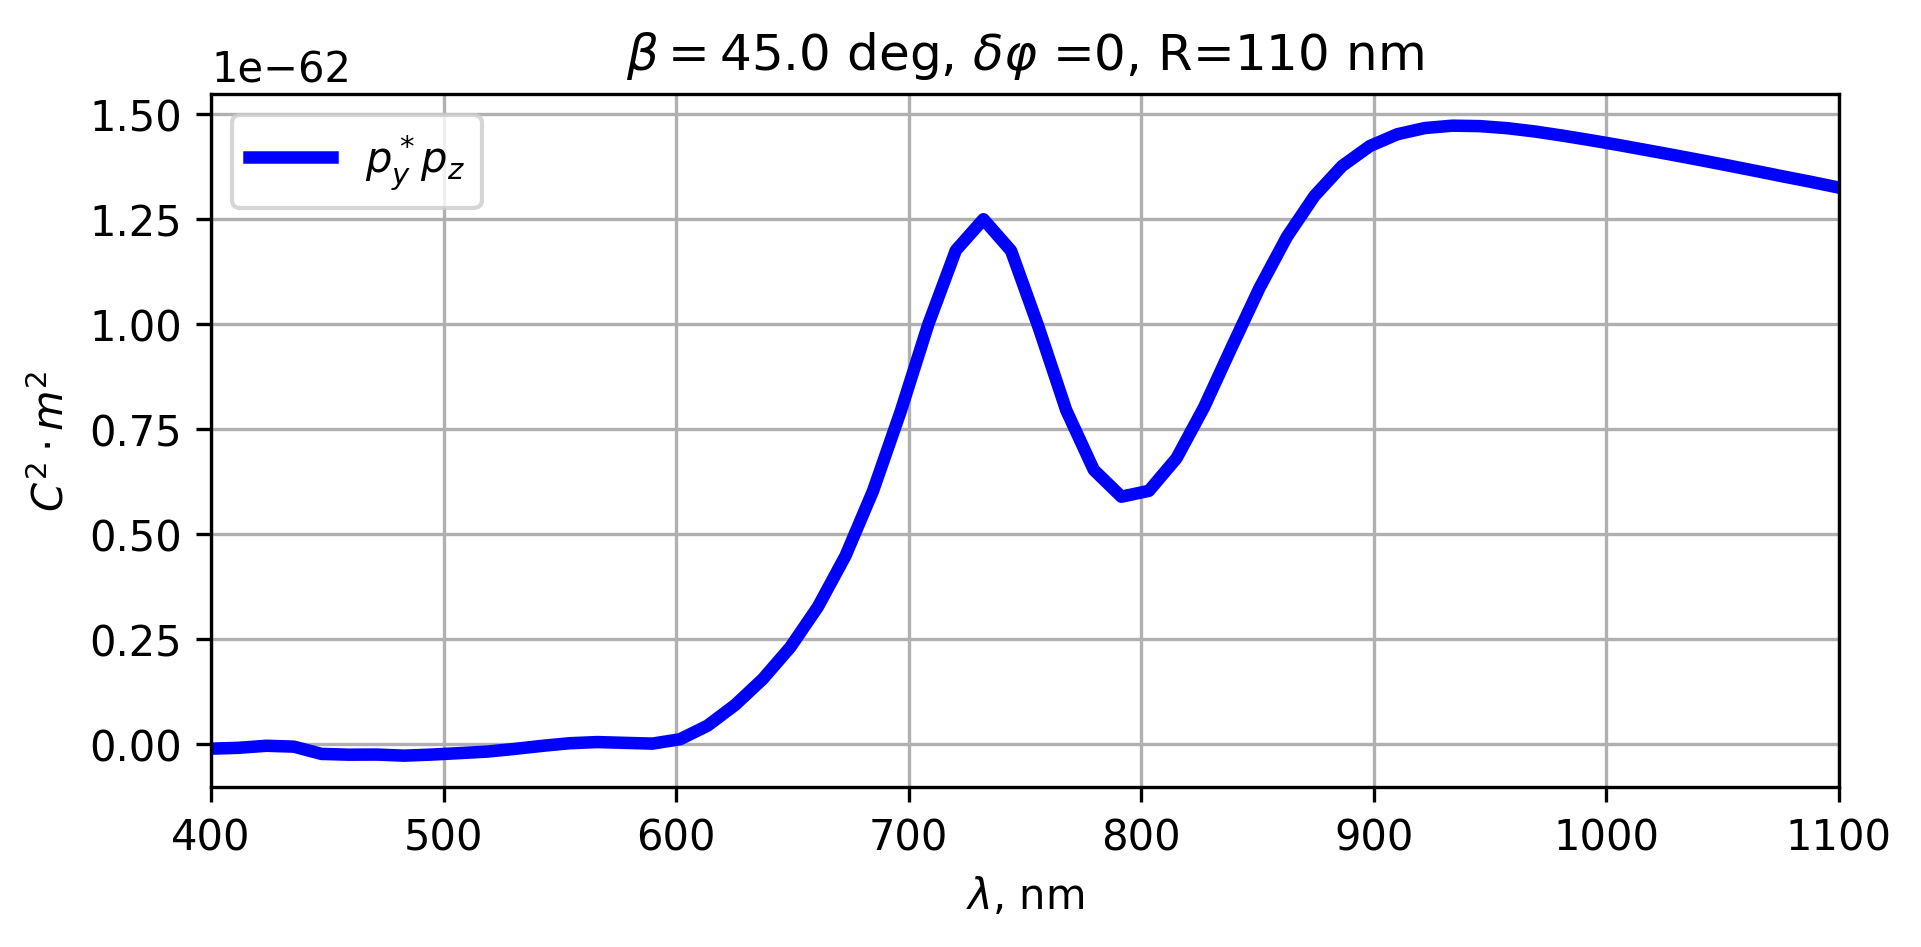

In [9]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.imag(P[:,1].conj()*P[:,2]), label='$p_y^* p_z$', lw=3, c='blue')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.legend(loc="upper left")
plt.xlim(wls[0], wls[-1])
plt.savefig(f'pypz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')
plt.show()


In [10]:
def AlphaE(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[0]
def AlphaH(R, eps_Si):
    return lambda wl: dipoles.alpha_v2(wl, R, eps_Si)[1]

AlphaEE = AlphaE(R, eps_Si)
AlphaHH = AlphaH(R, eps_Si)


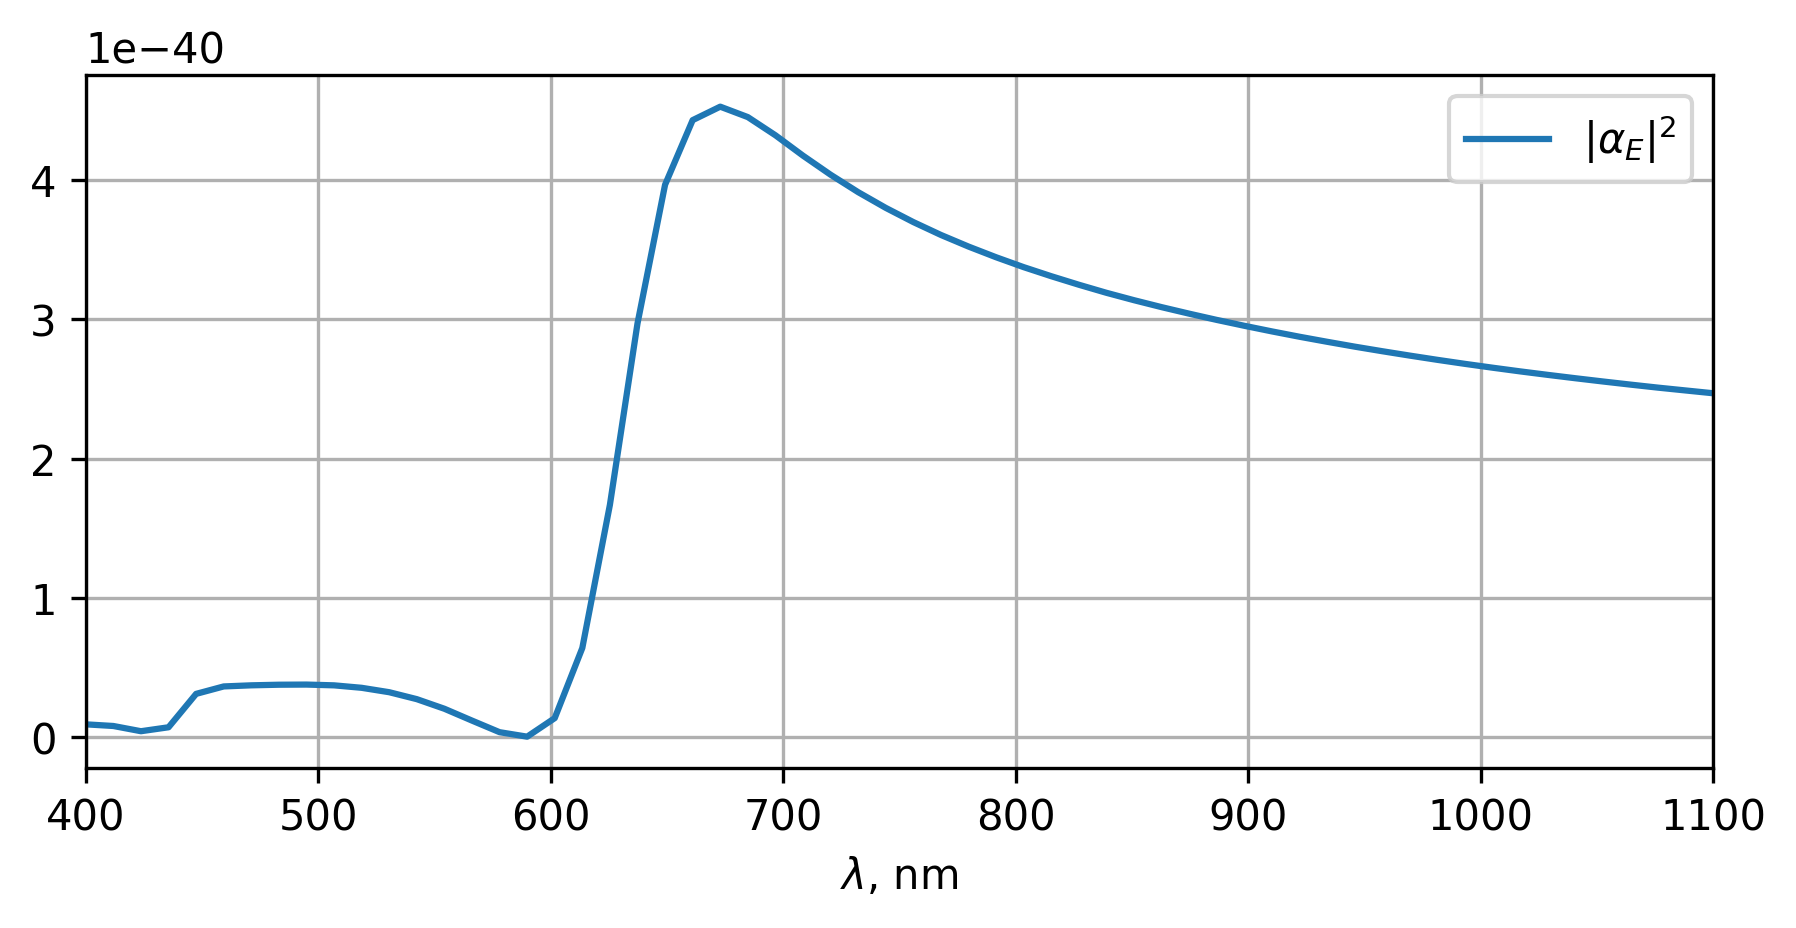

In [11]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.abs(AlphaEE(wls))**2, label='$|\\alpha_E|^2$')
plt.xlabel('$\lambda$, nm')
plt.xlim(wls[0], wls[-1])
plt.grid()
plt.legend()
plt.xlabel('$\lambda$, nm')
plt.show()

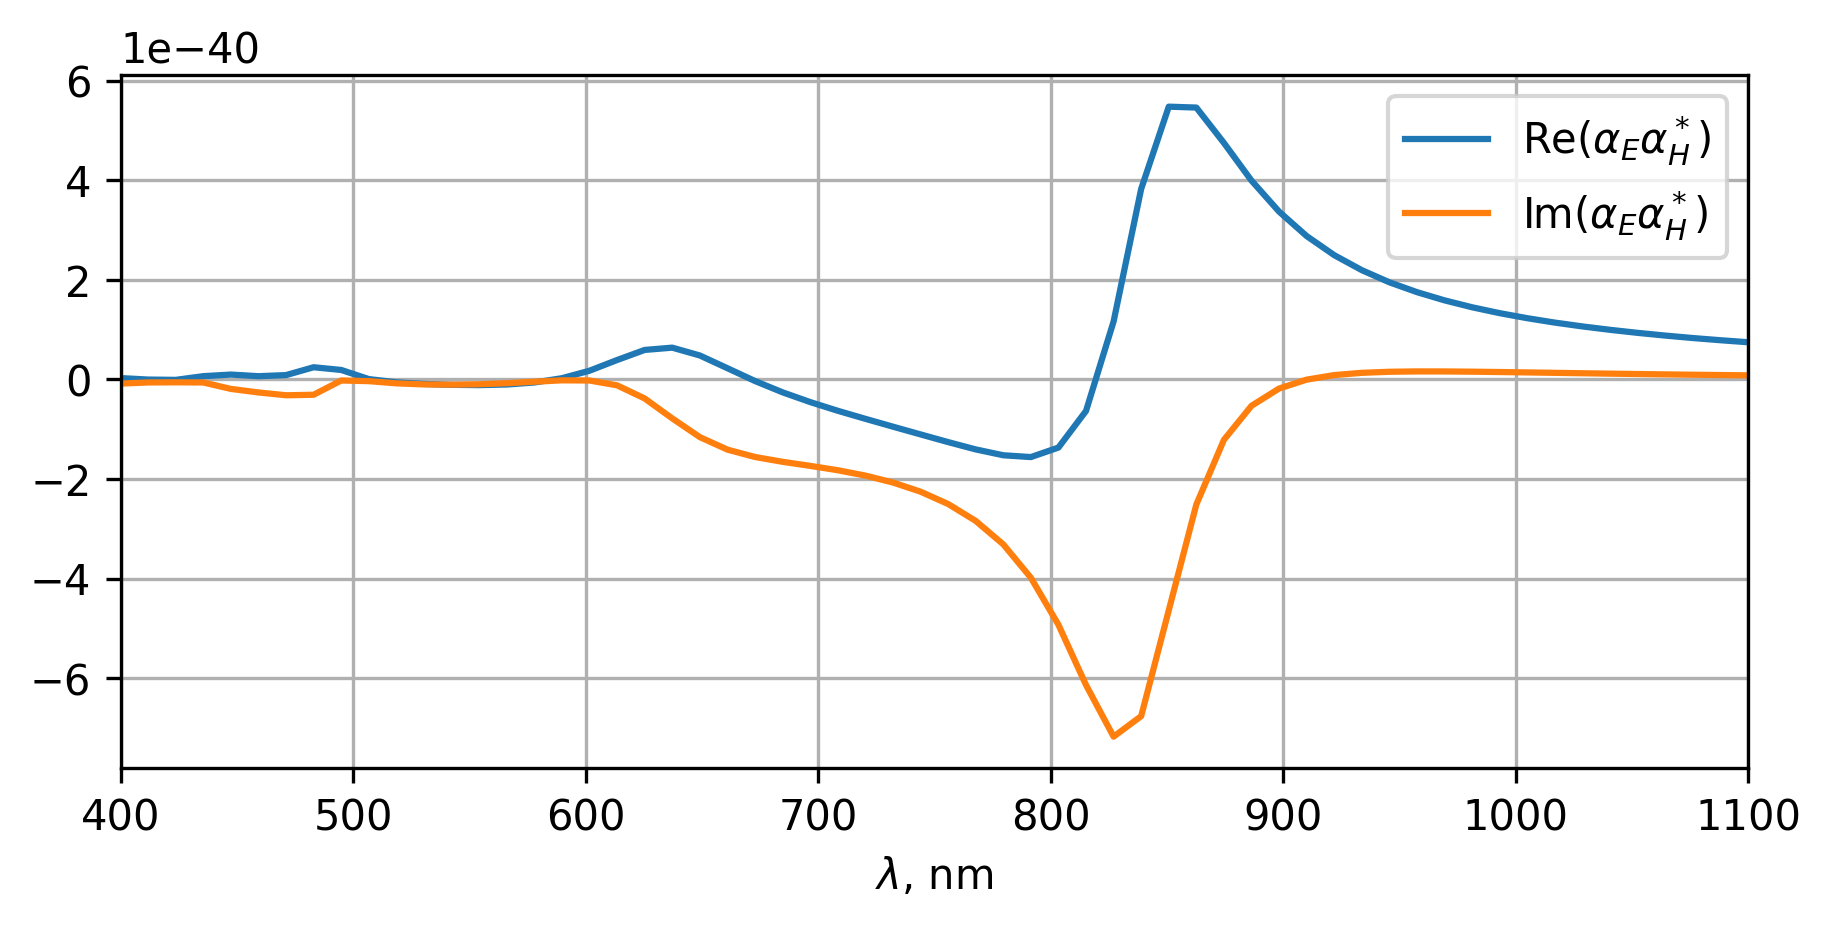

In [185]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.real(AlphaEE(wls)*AlphaHH(wls).conj()), label='Re($\\alpha_E \\alpha_H^*$)')
plt.plot(wls, np.imag(AlphaEE(wls)*AlphaHH(wls).conj()), label='Im($\\alpha_E \\alpha_H^*$)')
plt.xlabel('$\lambda$, nm')
plt.xlim(wls[0], wls[-1])
plt.grid()
plt.legend()
plt.show()

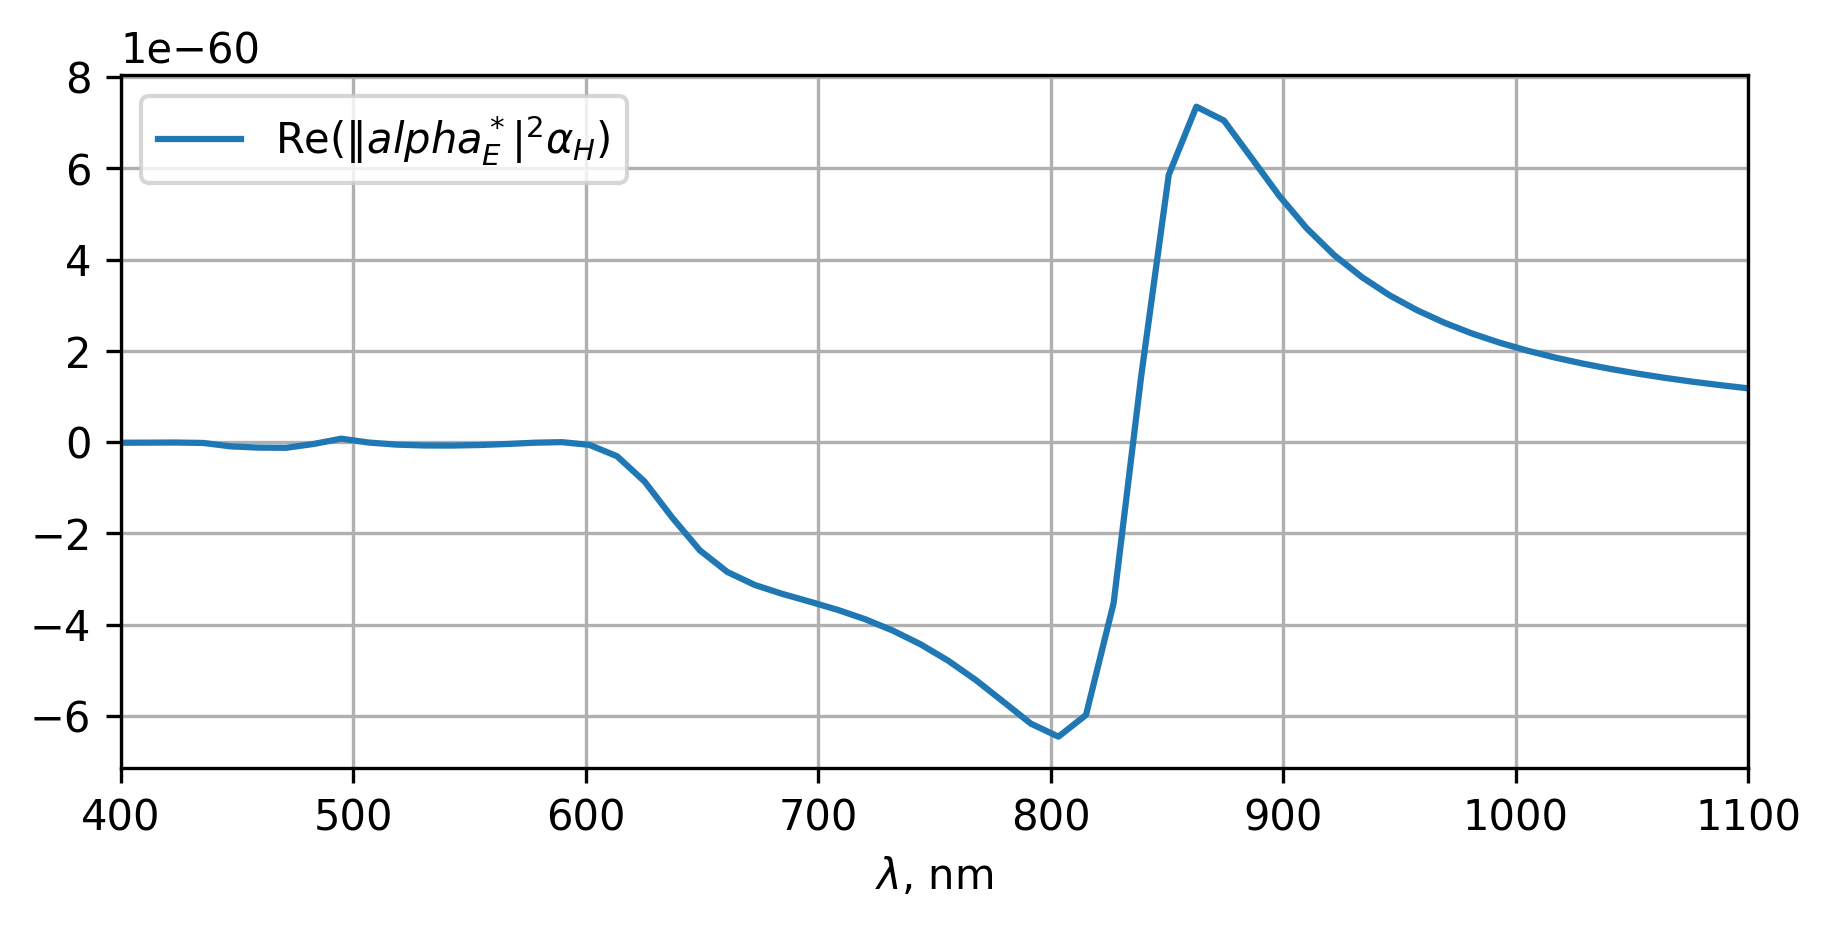

In [189]:
plt.figure(figsize=(7, 3), dpi=300)
# plt.plot(wls, np.real(AlphaEE(wls).conj()*AlphaHH(wls)), label='Re($\\alpha_E^* \\alpha_H$)')
# plt.plot(wls, np.imag(AlphaEE(wls).conj()*AlphaHH(wls)), label='Im($\\alpha_E^*\\alpha_H$)')
plt.plot(wls, np.real(np.abs(AlphaEE(wls))**2*AlphaHH(wls)), label='Re($\\|alpha_E^*|^2 \\alpha_H$)')

plt.xlabel('$\lambda$, nm')
plt.xlim(wls[0], wls[-1])
plt.grid()
plt.legend()
plt.show()

In [12]:
k0 = lambda wl: 2*np.pi/wl/1e-9
omega = lambda wl: 2*np.pi*c_const/wl/1e-9

In [70]:
dyGE_yz = np.zeros(len(wls), dtype=complex)
dyGH_yz,dyrotGHxz,dyrotGHzx = np.empty_like(dyGE_yz),  np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)
GE0xx, GE0zz, GH0xx, GH0zz = np.empty_like(dyGE_yz),  np.empty_like(dyGE_yz), np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)
rotGExy, rotGEyx = np.empty_like(dyGE_yz), np.empty_like(dyGE_yz)

for i in tqdm(range(len(wls))):
    dyGE, dyGH = green_func.dy_green_E_H(wls[i], point[2], eps_Au, STOP)
    dyrotGE, dyrotGH = green_func.dy_rot_green_E_H(wls[i], point[2], eps_Au, STOP)
    dyGE_yz[i] = dyGE[1,2]
    dyGH_yz[i] = dyGH[1,2]
    dyrotGHxz[i] = dyrotGH[0,2]
    dyrotGHzx[i] = dyrotGH[2,0]
    GE, GH = green_func.green_ref_00(wls[i], point[2], eps_Au, STOP)
    rotGE, _  = green_func.rot_green_ref_00(wls[i], point[2], eps_Au, STOP)
    GE0xx[i] = GE[0,0]
    GE0zz[i] = GE[2,2]
    GH0xx[i] = GH[0,0]
    GH0zz[i] = GH[2,2]
    rotGExy[i] = rotGE[0,1]
    rotGEyx[i] = rotGE[1,0]

100%|██████████| 60/60 [00:00<00:00, 194180.74it/s]


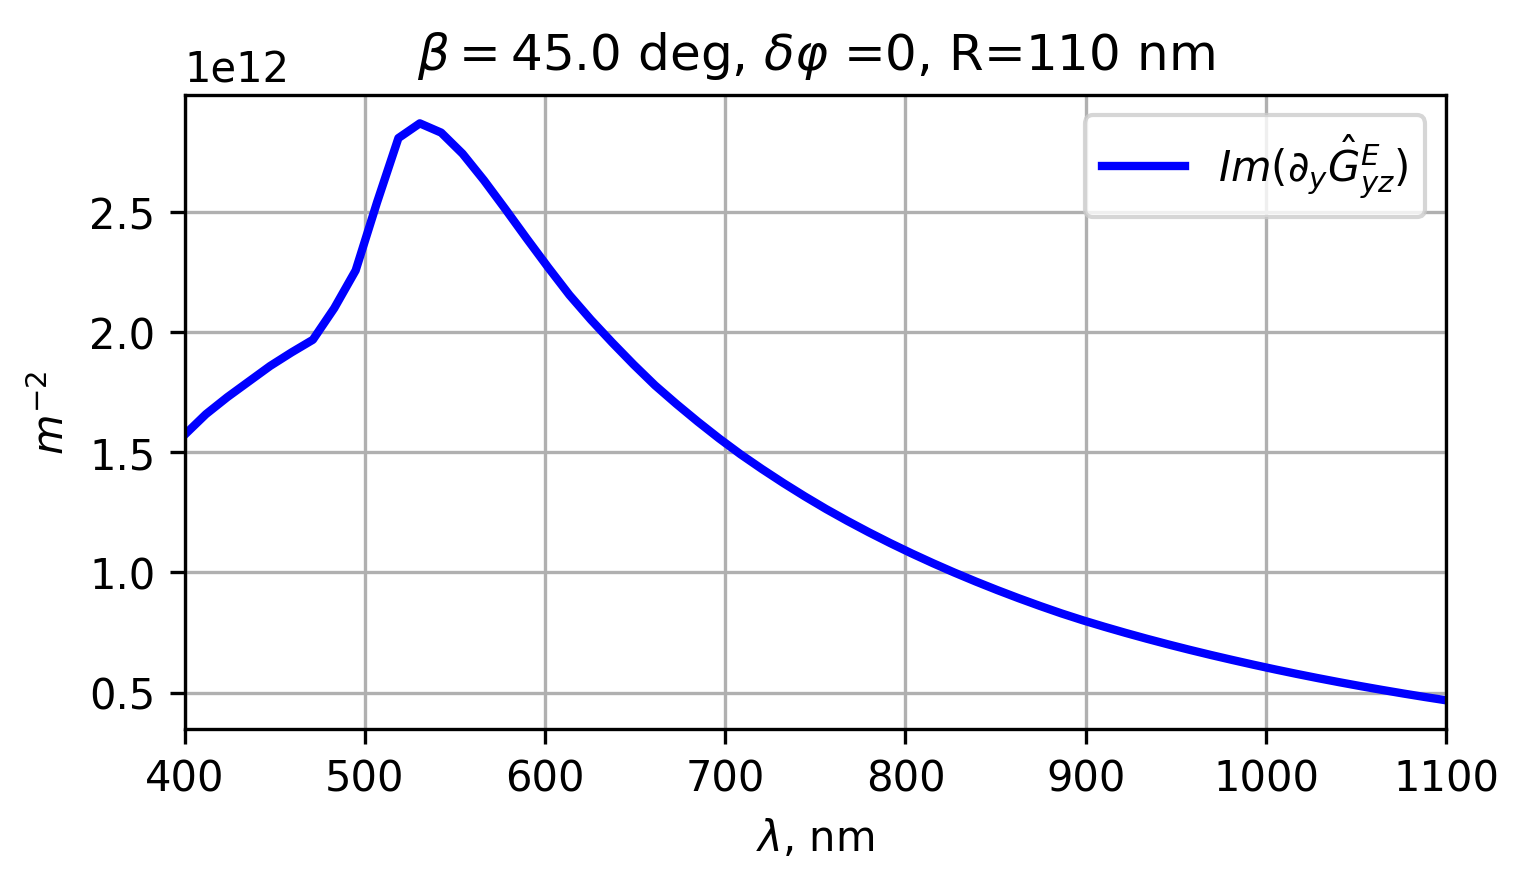

In [14]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(dyGE_yz), label=r'$Im(\partial_y \hat{G}^E_{yz})$', lw=2, c='b')
plt_set(wls)
plt.ylabel('$m^{-2}$')
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.savefig(f'Im_dyGEyz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

In [15]:
GEExx = k0(wls)**2 * GE0xx/eps0_const
GEEzz = k0(wls)**2 * GE0zz/eps0_const
GMMxx = k0(wls)**2 * GH0xx
GMMzz = k0(wls)**2 * GH0zz

GMExy =  - 1j* omega(wls) * rotGExy 
GMEyx =  - 1j* omega(wls) * rotGEyx
GEMxy = GMExy * mu0_const
GEMyx = GMEyx * mu0_const

In [16]:
def RP(eps_Au, angle):
    return lambda wl: frenel.reflection_coeff_v2(wl, eps_Au, angle)[0]
def RS(eps_Au, angle):
    return lambda wl: frenel.reflection_coeff_v2(wl, eps_Au, angle)[1]
def KZ(angle):
    return lambda wl: 2*np.pi/wl *np.cos(angle)

RPP = RP(eps_Au, angle)
RSS = RS(eps_Au, angle)
KZZ = KZ(angle)

In [6]:
def plt_set(wls):
    plt.grid()
    plt.xlabel('$\lambda$, nm')
    plt.xlim(wls[0], wls[-1])
    plt.legend()
    plt.tight_layout()

# $Im(p_y^* p_z)$

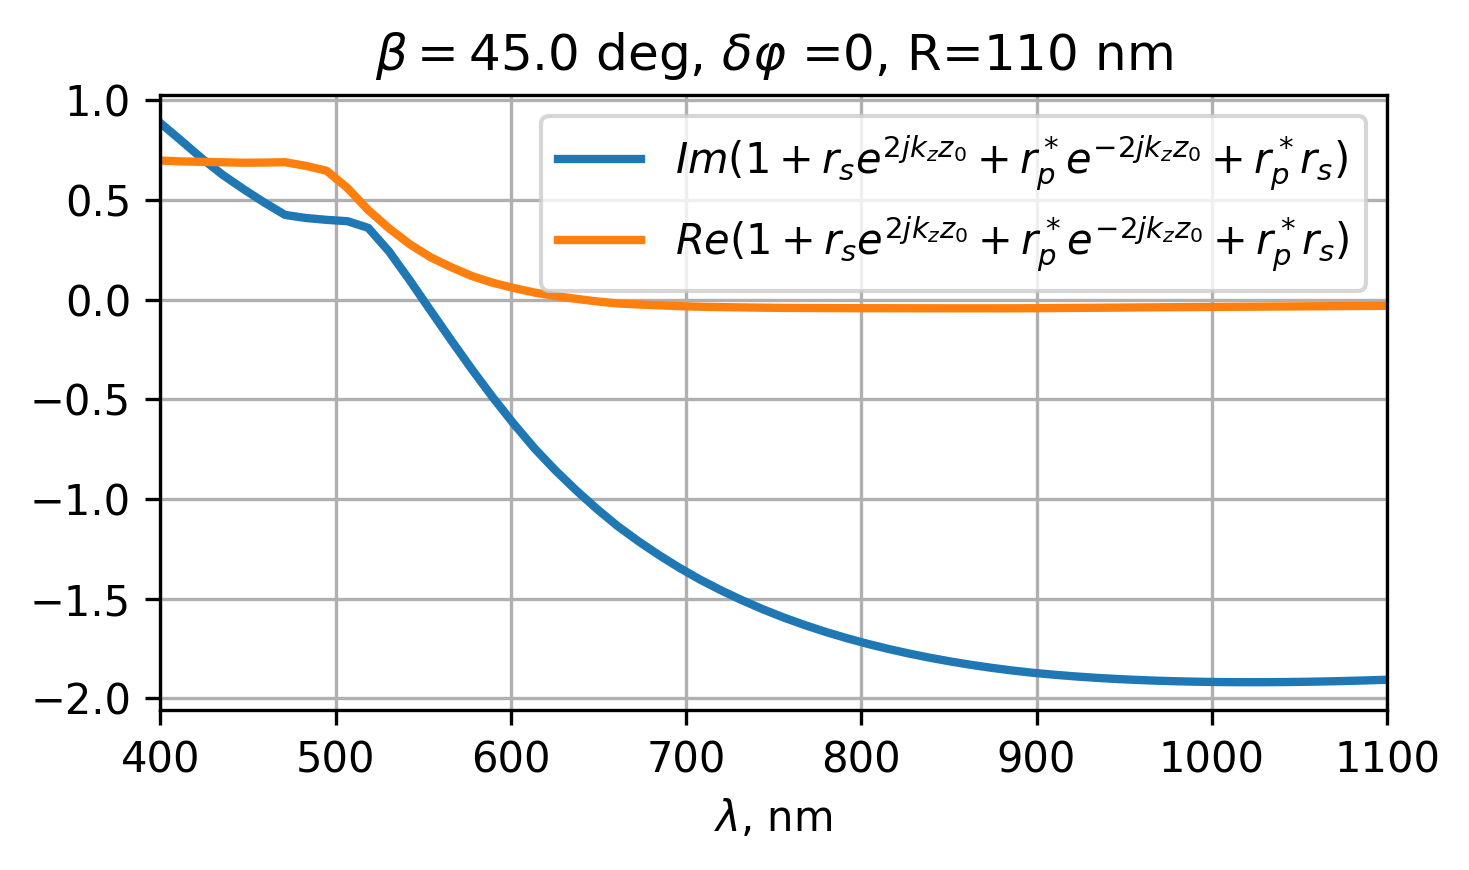

In [218]:
rp_conj_rs_py_pz_1 = 1+RPP(wls).conj() * np.exp(-2j*KZZ(wls)*z0) + RSS(wls)* np.exp(2j*KZZ(wls)*z0) + RPP(wls).conj()*RSS(wls) #OK

plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, np.imag(rp_conj_rs_py_pz_1), label='$Im(1+r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} + r_p^* r_s)$', lw=2)
plt.plot(wls, np.real(rp_conj_rs_py_pz_1), label='$Re(1+r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} + r_p^* r_s)$', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'rs_rp_conj_sum_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')


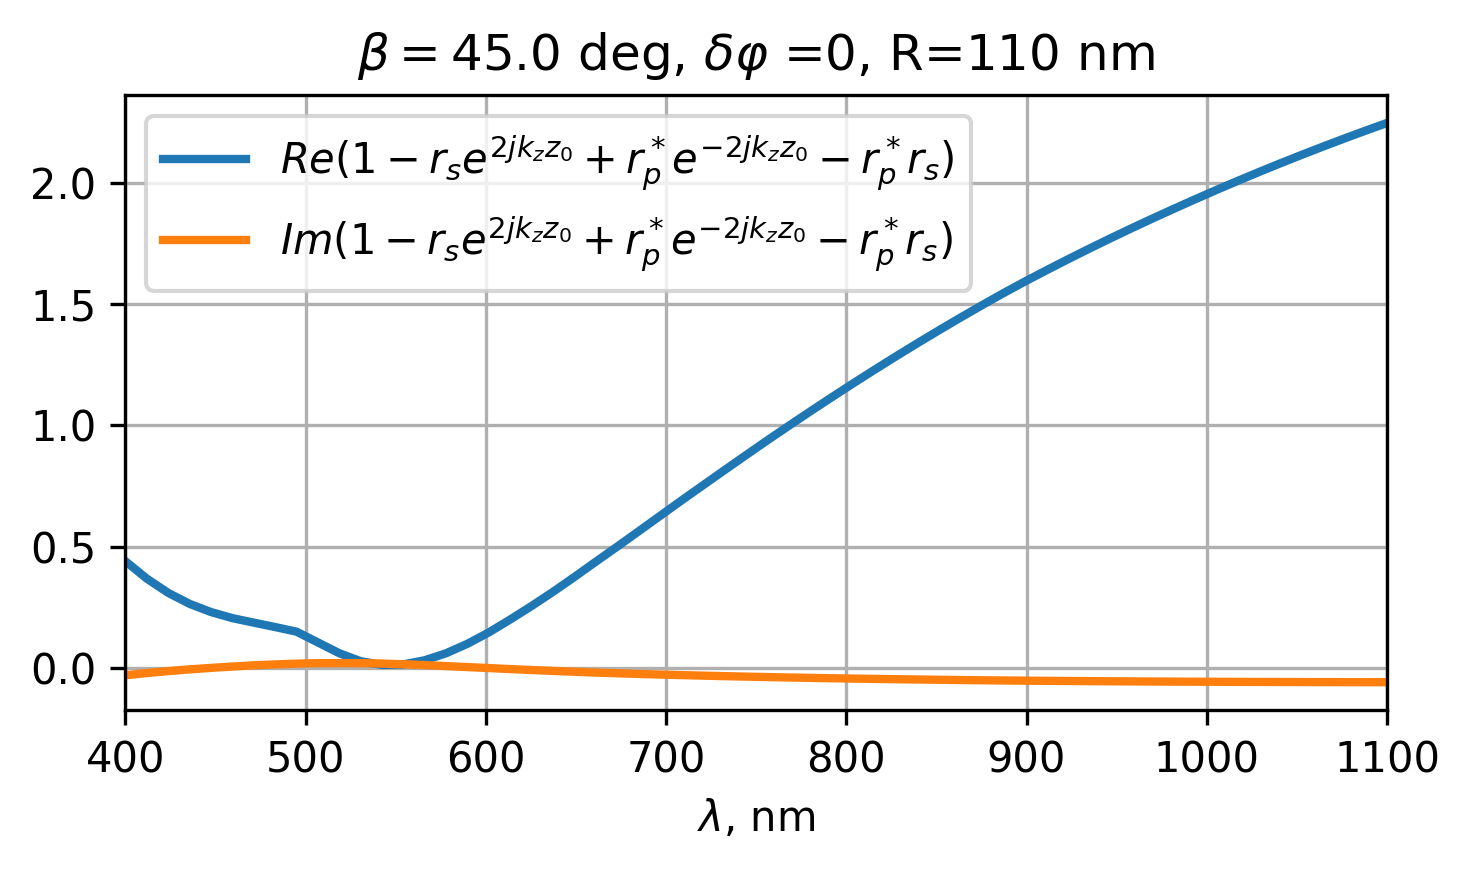

In [222]:
rp_conj_rs_py_pz_2= 1+RPP(wls).conj()*np.exp(-2j*KZZ(wls)*z0) - RSS(wls)*np.exp(2j*KZZ(wls)*z0) - RPP(wls).conj()*RSS(wls) #OK

plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, np.real(rp_conj_rs_py_pz_2), label='$Re(1-r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} - r_p^* r_s)$', lw=2)
plt.plot(wls, np.imag(rp_conj_rs_py_pz_2), label='$Im(1-r_s e^{2j k_z z_0} + r_p^* e^{-2j k_z z_0} - r_p^* r_s)$', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'rs_rp_conj_razn_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

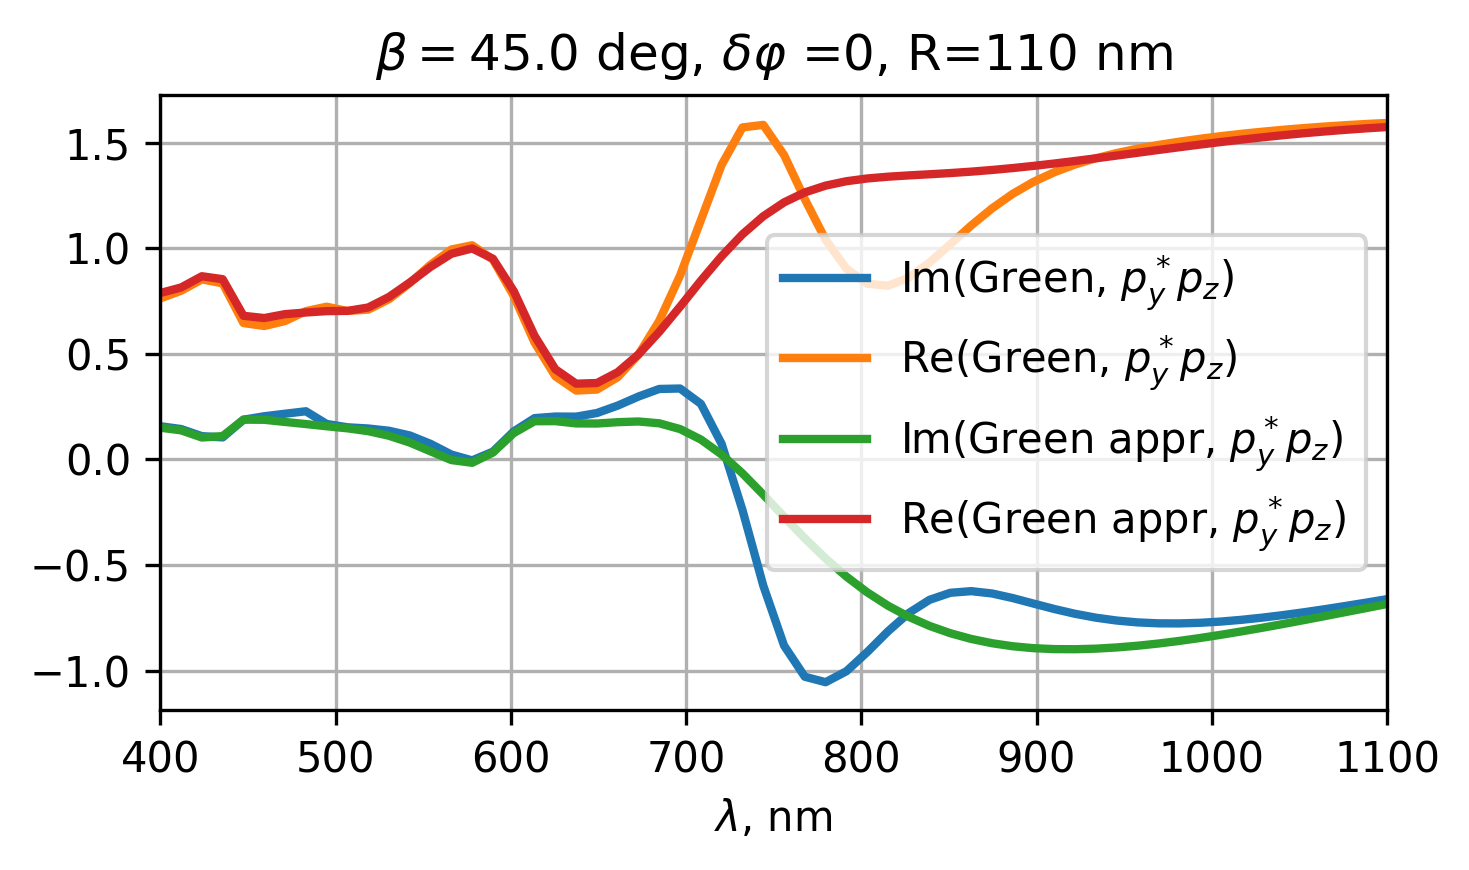

In [19]:
A = 1 - AlphaHH(wls)*GMMxx
B2 = 1 - AlphaEE(wls)*eps0_const*GEExx
B3 = AlphaEE(wls)*eps0_const*AlphaHH(wls)*GMExy*GEMyx

D = 1 - AlphaEE(wls).conj() * eps0_const * GEEzz.conj()


Greens_py_pz = A/(A * B2 - B3)/D

Greens_py_pz_v2= 1/ B2/D
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(Greens_py_pz), label='Im(Green, $p_y^* p_z$) ', lw=2)
plt.plot(wls, np.real(Greens_py_pz), label='Re(Green, $p_y^* p_z$) ', lw=2)

plt.plot(wls, np.imag(Greens_py_pz_v2), label='Im(Green appr, $p_y^* p_z$) ', lw=2)
plt.plot(wls, np.real(Greens_py_pz_v2), label='Re(Green appr, $p_y^* p_z$) ', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)

plt.savefig(f'green_pypz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')


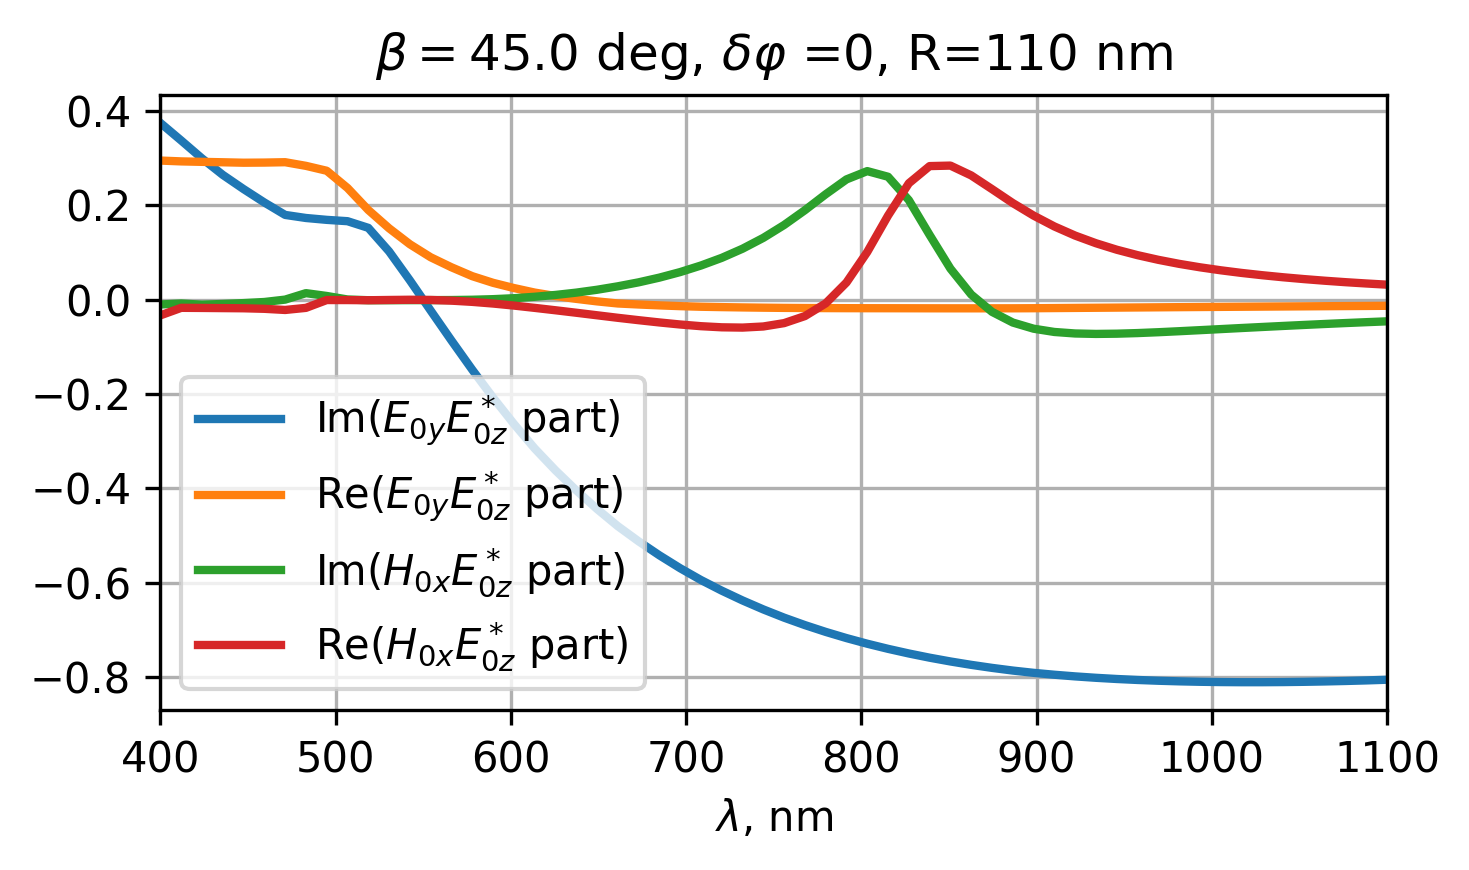

In [20]:


H0XE0z =  k0(wls) * np.sin(2*angle) * rp_conj_rs_py_pz_2 / (2 * omega(wls)*mu0_const )

E0yE0z = np.sin(angle) * rp_conj_rs_py_pz_1


py_pz_rprs_2 = AlphaHH(wls) * GEMyx * H0XE0z/(1 - AlphaHH(wls)*GMMxx)


plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(E0yE0z), label='Im($E_{0y} E_{0z}^*$ part)', lw=2)
plt.plot(wls, np.real(E0yE0z), label='Re($E_{0y} E_{0z}^*$ part)', lw=2)

plt.plot(wls, np.imag(py_pz_rprs_2), label='Im($H_{0x} E_{0z}^*$ part)', lw=2)
plt.plot(wls, np.real(py_pz_rprs_2), label='Re($H_{0x} E_{0z}^*$ part)', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt_set(wls)


plt.savefig(f'E0yE0z_H0xE0Z_pypz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')
# plt.figure(figsize=(7, 3))
# plt.plot(wls, np.imag(py_pz_rprs_2), label='Im(rp_rs_H0xE0z_conj)')
# plt.plot(wls, np.real(py_pz_rprs_2), label='Re(rp_rs_H0xE0z_conj)')
# plt_set(wls)

Text(0.5, 1.0, '$\\beta=$45.0 deg, $\\delta \\varphi$ =0, R=110 nm')

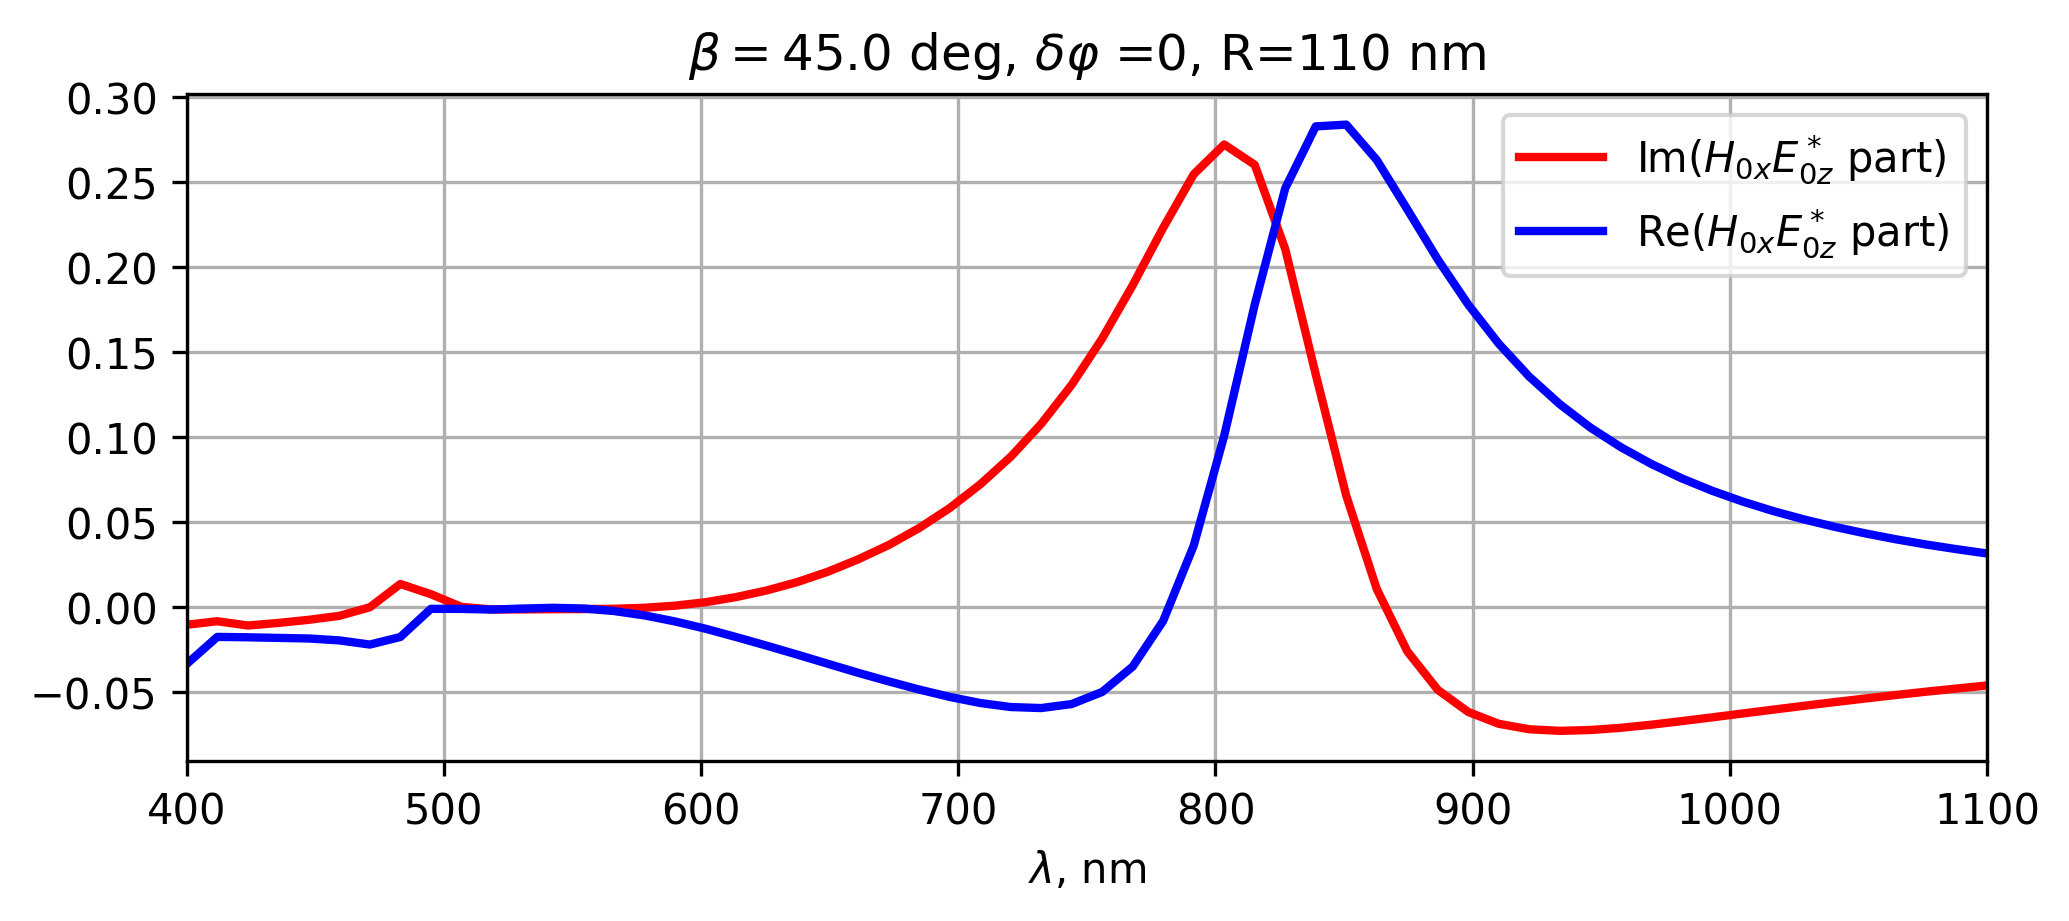

In [21]:
plt.figure(figsize=(7, 3), dpi=300)
plt.plot(wls, np.imag(py_pz_rprs_2), label='Im($H_{0x} E_{0z}^*$ part)', lw=2, c='r')
plt.plot(wls, np.real(py_pz_rprs_2), label='Re($H_{0x} E_{0z}^*$ part)', lw=2, c='b')
plt_set(wls)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

#plt.savefig(f'E0yE0z_pypz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')
# plt.figure(figsize=(7, 3))
# plt.plot(wls, np.imag(py_pz_rprs_2), label='Im(rp_rs_H0xE0z_conj)')
# plt.plot(wls, np.real(py_pz_rprs_2), label='Re(rp_rs_H0xE0z_conj)')
# plt_set(wls)

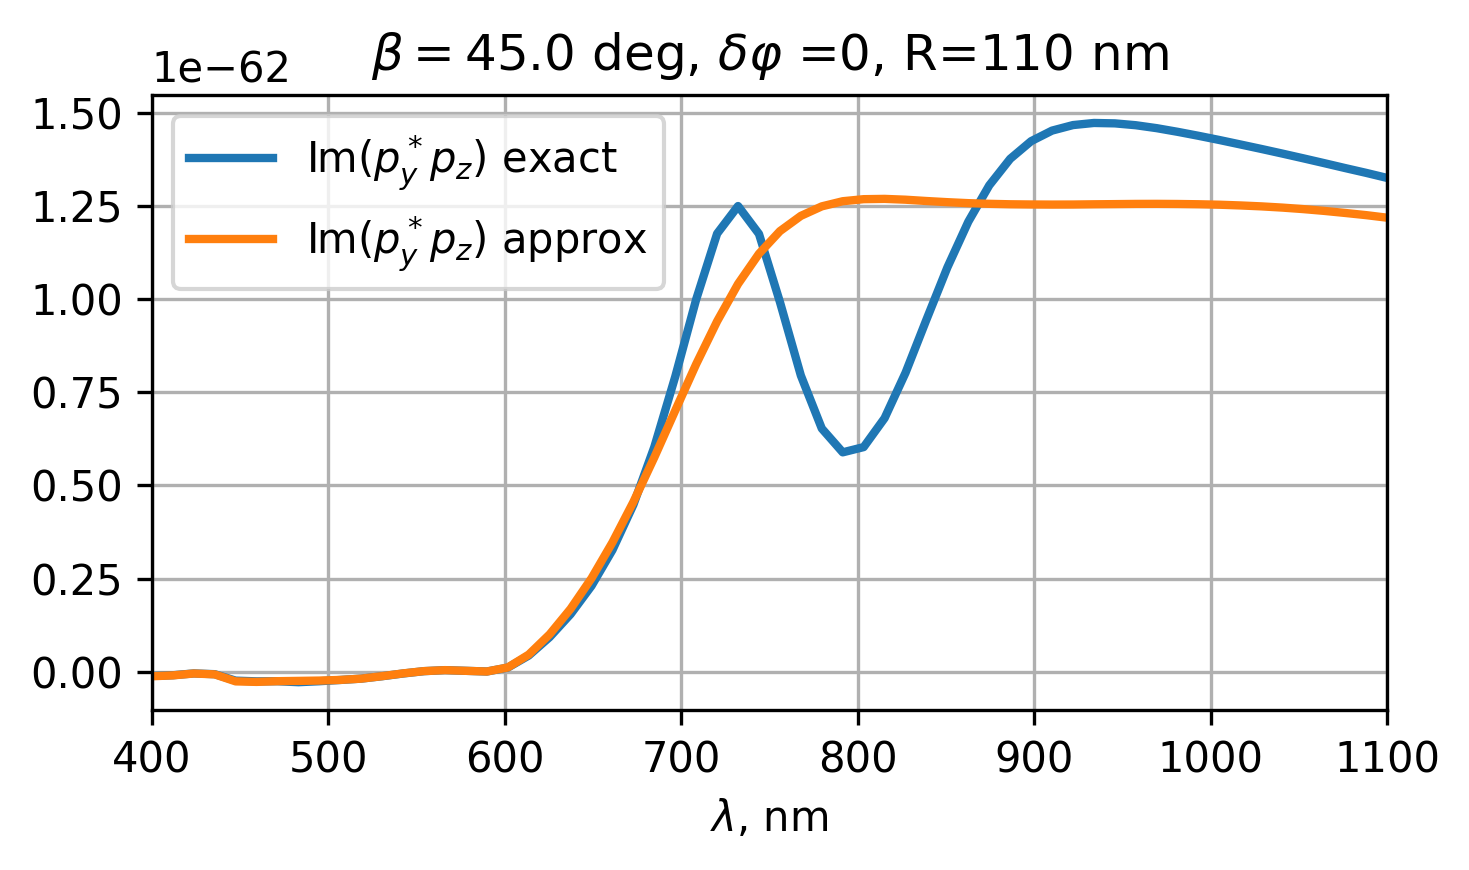

In [22]:
py_pz_coeff = -1* np.abs(AlphaEE(wls))**2 * eps0_const**2 * np.sin(2*a_angle)/2

py_pz_1 = py_pz_coeff * np.imag( Greens_py_pz *E0yE0z)

py_pz_2 = py_pz_coeff * np.imag( Greens_py_pz *py_pz_rprs_2)

py_pz_appr = py_pz_coeff *np.imag(Greens_py_pz_v2 * E0yE0z)


plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, py_pz_1  + py_pz_2, label='Im($p_y^* p_z$) exact', lw=2)
plt.plot(wls, py_pz_appr, label='Im($p_y^* p_z$) approx', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt_set(wls)


plt.savefig(f'pypz_aprox_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')



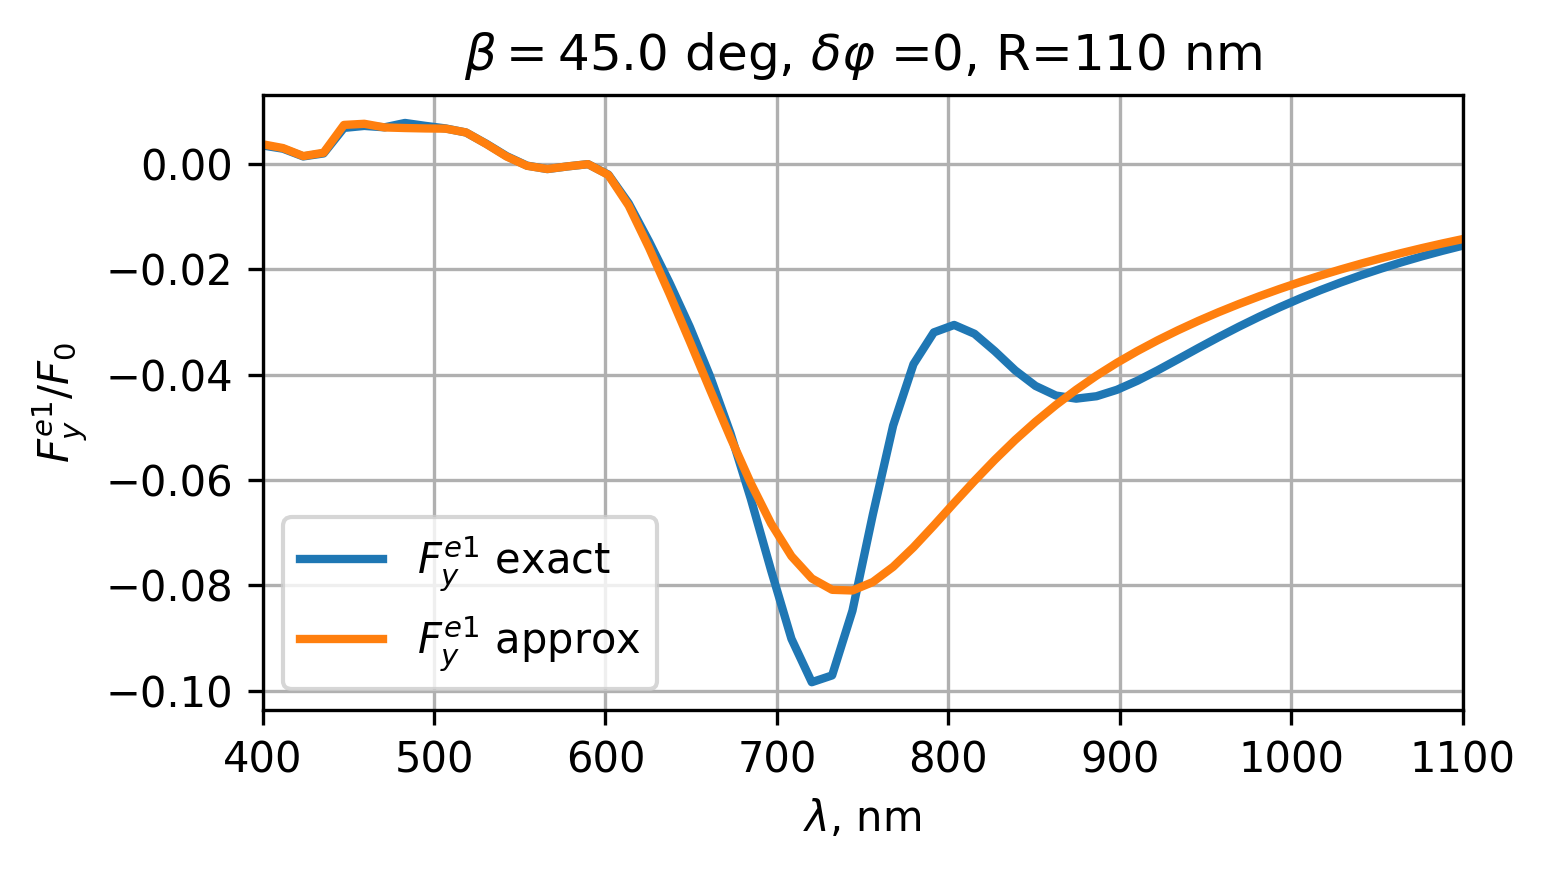

In [23]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, F_y[:,2]/F0, label=r'$F_y^{e1}$ exact', lw=2)
plt.plot(wls,  - k0(wls)**2 * py_pz_appr * np.imag(dyGE_yz) / eps0_const/F0, label=r'$F_y^{e1}$ approx', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt_set(wls)
plt.ylabel('$F_y^{e1}/F_0$')

plt.savefig(f'fye1_aprox_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

# $Im(m_y^* m_z)$

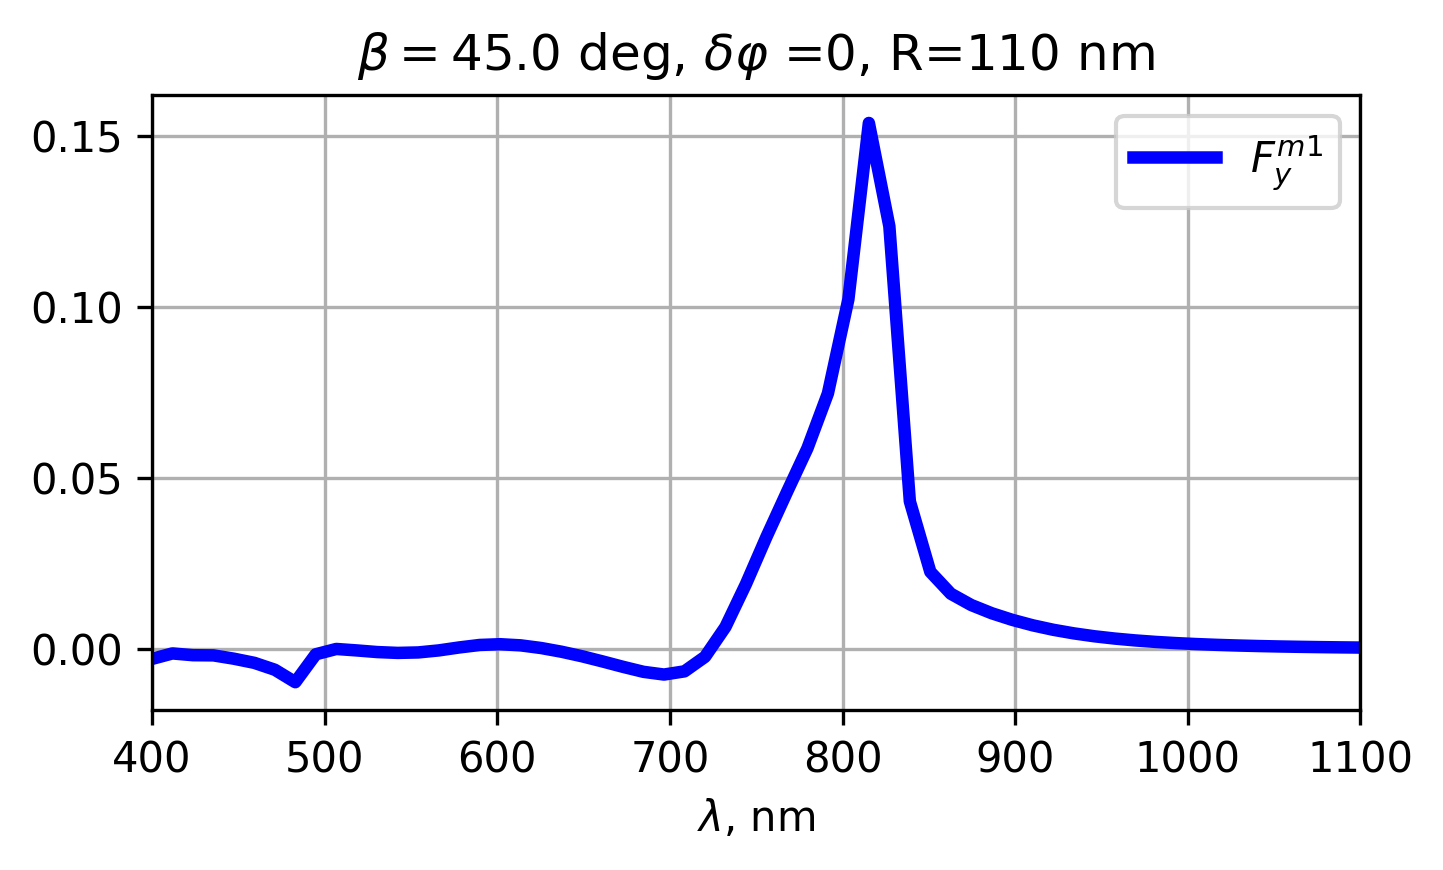

In [24]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, F_y[:,5]/F0, label='$F_y^{m1}$', lw=3, c='blue')
plt.xlim(wls[0], wls[-1])
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.xlabel('$\lambda$, nm')
plt.savefig(f'Fym1_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

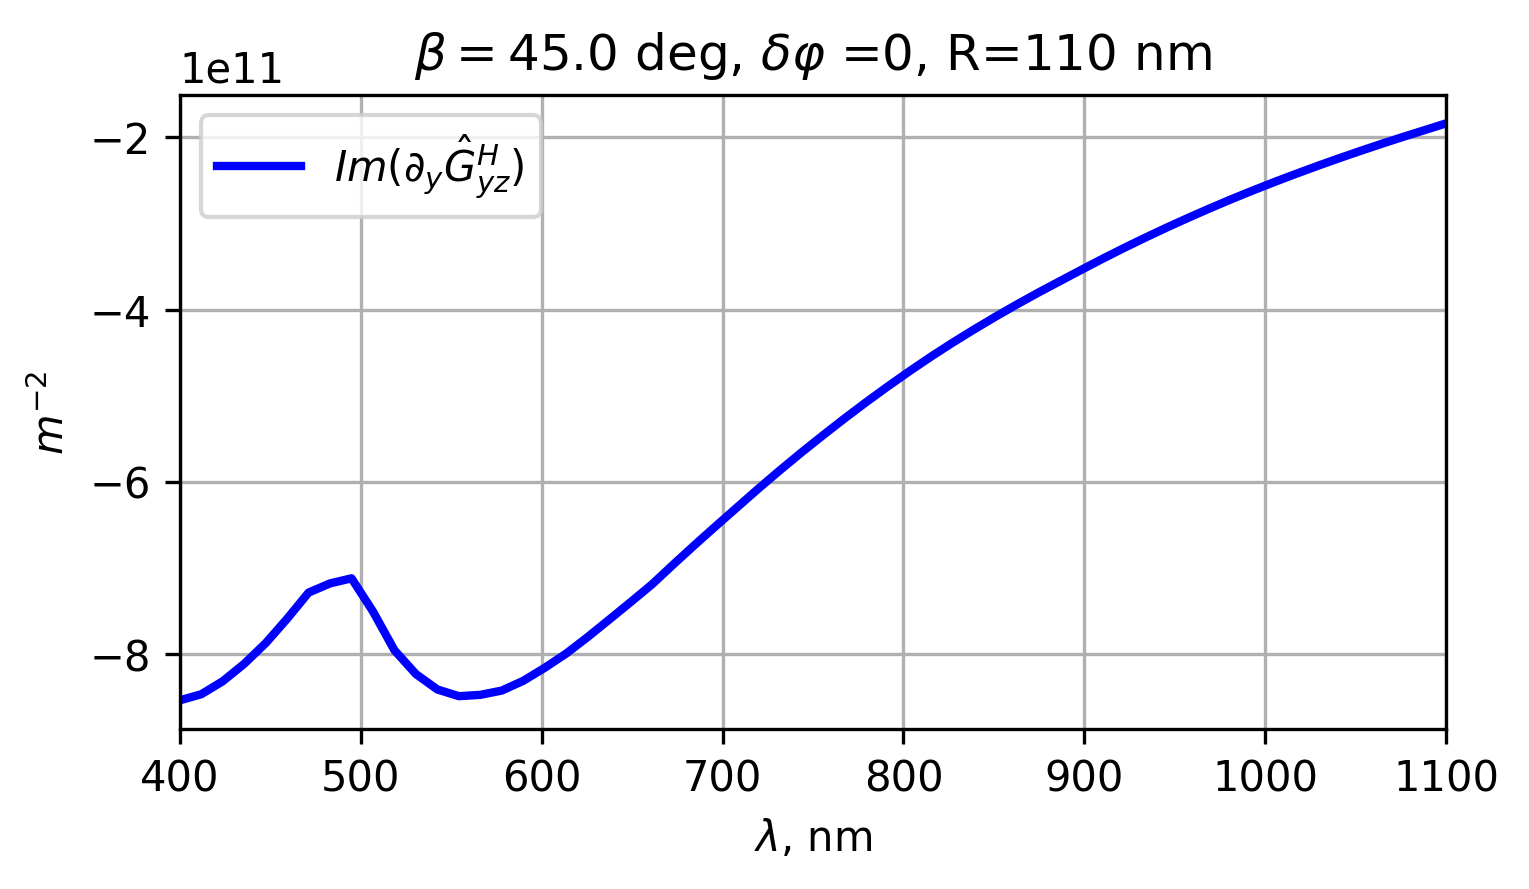

In [25]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(dyGH_yz), label=r'$Im(\partial_y \hat{G}^H_{yz})$', lw=2, c='b')
plt_set(wls)
plt.ylabel('$m^{-2}$')
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.savefig(f'Im_dyGHyz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

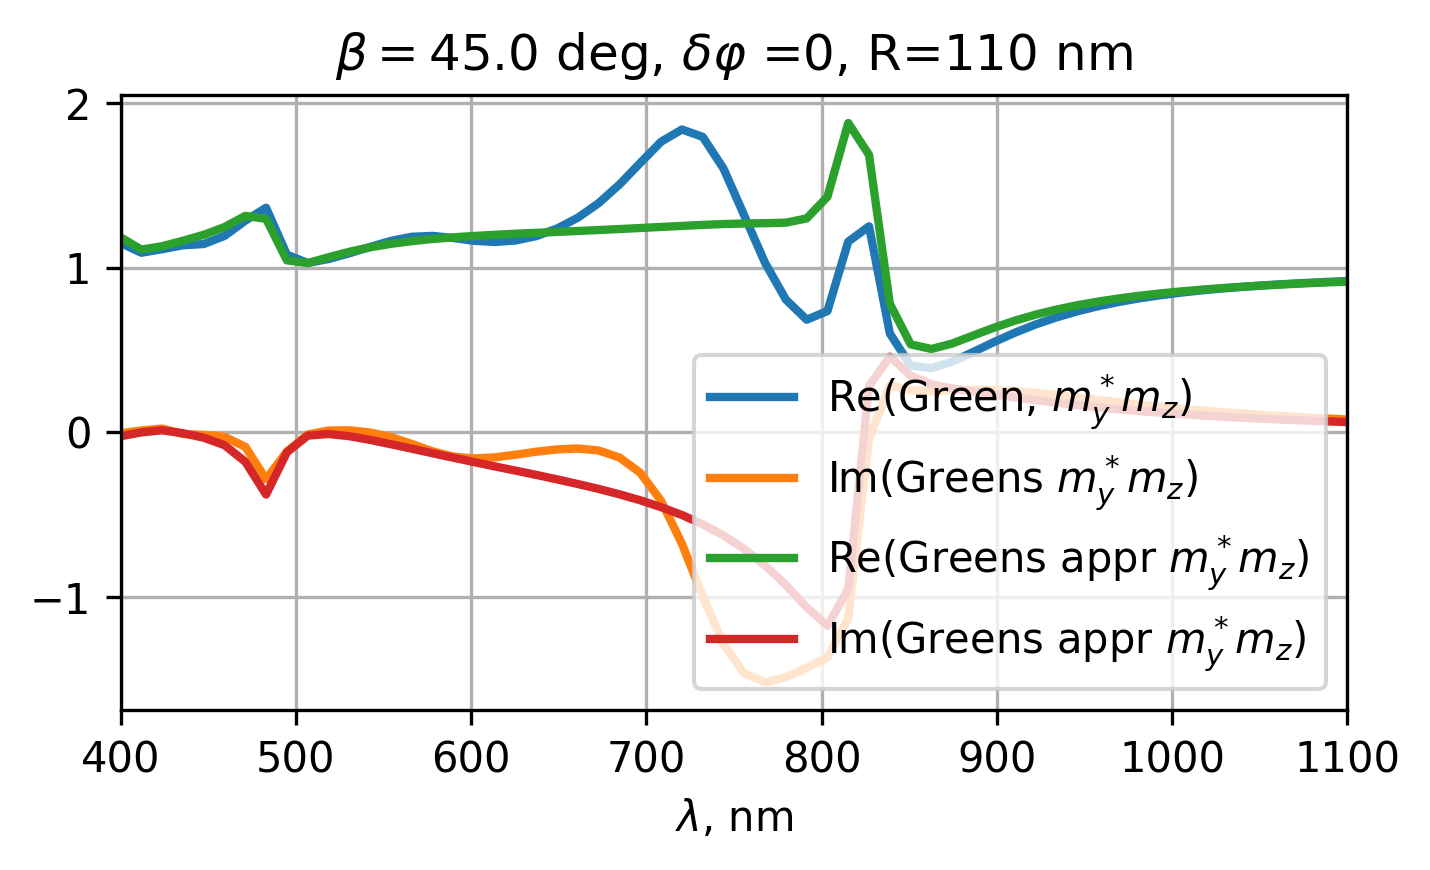

In [50]:
Amymz = (1 - AlphaEE(wls)* eps0_const * GEExx)

Bmymz = 1 - AlphaHH(wls).conj()*GMMzz.conj()

Cmymz = (1 - AlphaHH(wls) * GMMxx)


Mmymz = - AlphaHH(wls)*AlphaEE(wls)*eps0_const * GEMxy*GMEyx


Greens_my_mz = Amymz/(Cmymz*Amymz+Mmymz)/Bmymz

Greens_my_mz_appr2 = 1/(Cmymz)/Bmymz


plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.real(Greens_my_mz), label='Re(Green, $m_y^* m_z$)', lw=2)
plt.plot(wls, np.imag(Greens_my_mz), label='Im(Greens $m_y^* m_z$)', lw=2)

plt.plot(wls, np.real(Greens_my_mz_appr2), label='Re(Greens appr $m_y^* m_z$)', lw=2)
plt.plot(wls, np.imag(Greens_my_mz_appr2), label='Im(Greens appr $m_y^* m_z$)', lw=2)


plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend(loc='lower right')

plt.savefig(f'green_mymz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')


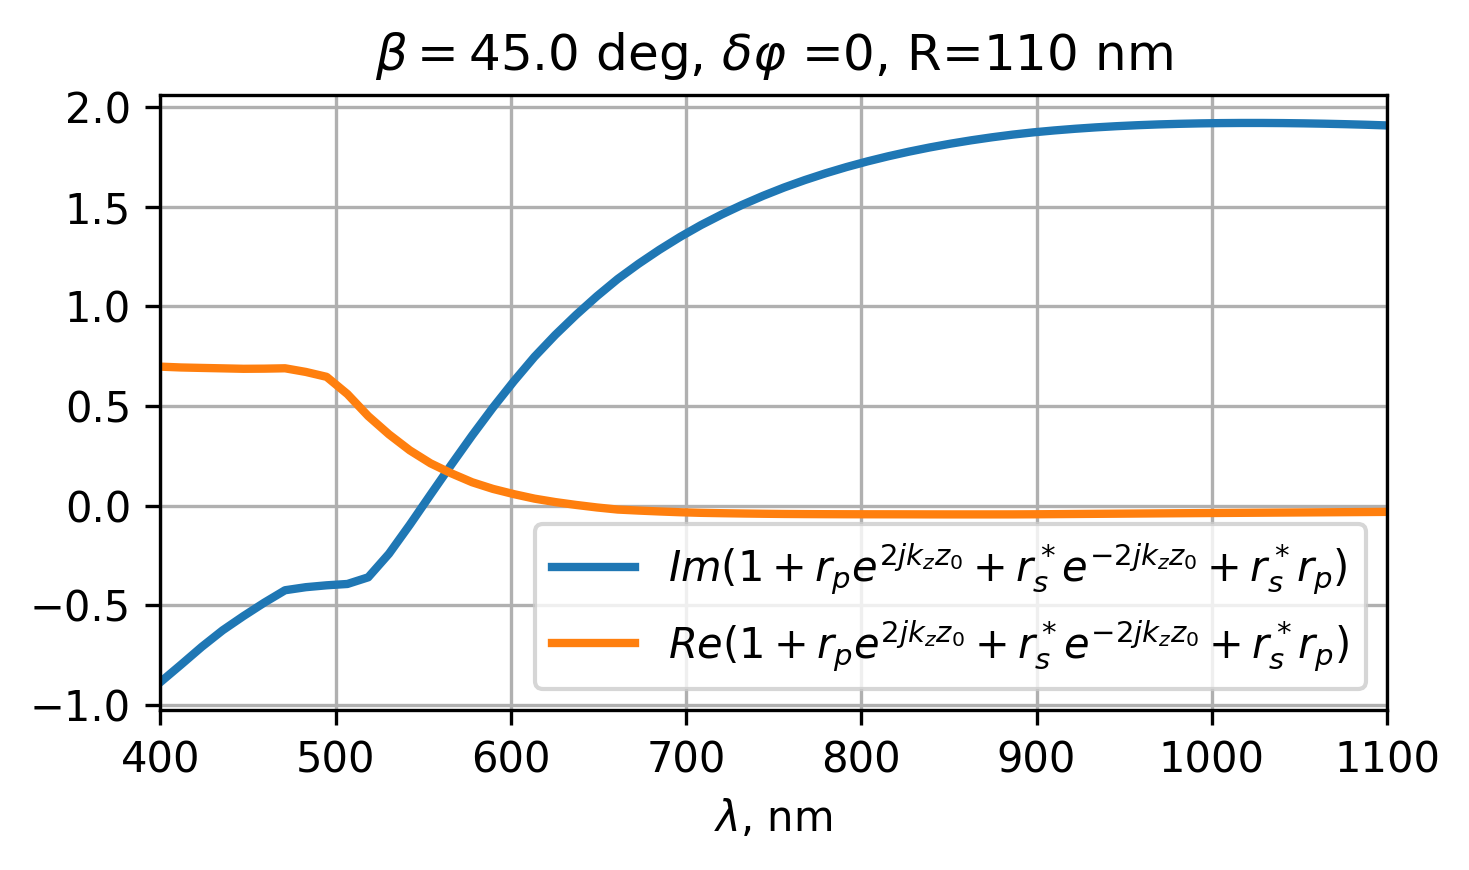

In [221]:
rp_rs_conj_mymz_2 = 1 + RSS(wls).conj() * np.exp(-2j*KZZ(wls)*z0) - RPP(wls)*np.exp(2j*KZZ(wls)*z0) - RPP(wls)*RSS(wls).conj()

rp_rs_conj_mymz_1 = 1 + RPP(wls)*np.exp(2j*KZZ(wls)*z0) + RSS(wls).conj() * np.exp(-2j*KZZ(wls)*z0) + RSS(wls).conj()*RPP(wls) 

plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, np.imag(rp_rs_conj_mymz_1), label='$Im(1+r_p e^{2j k_z z_0} + r_s^* e^{-2j k_z z_0} + r_s^* r_p)$', lw=2)
plt.plot(wls, np.real(rp_rs_conj_mymz_1), label='$Re(1+r_p e^{2j k_z z_0} + r_s^* e^{-2j k_z z_0} + r_s^* r_p)$', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'rs_conj_rp_sum_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')



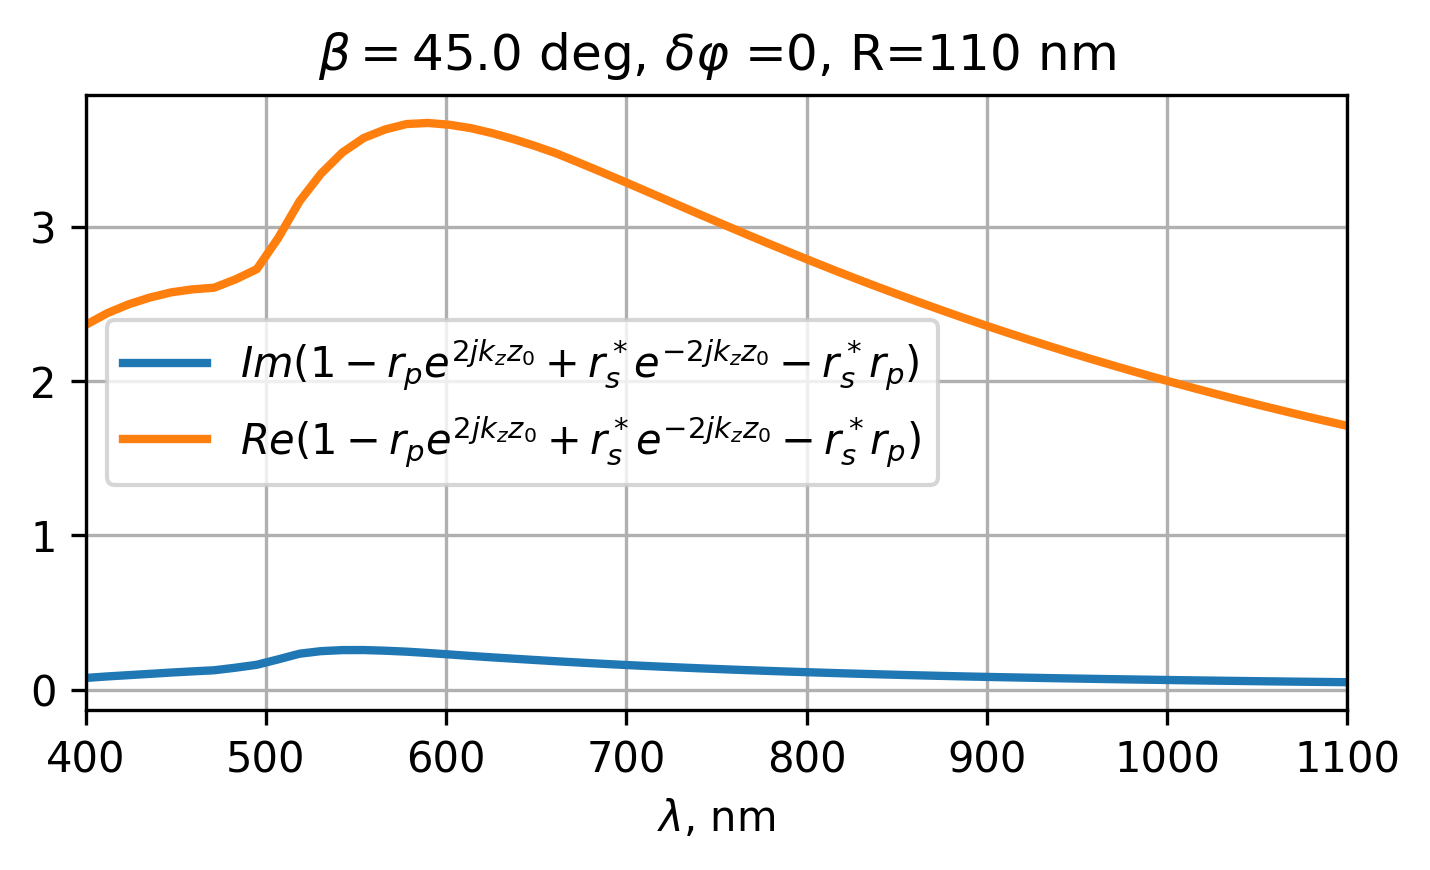

In [223]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, np.imag(rp_rs_conj_mymz_2), label='$Im(1 -r_p e^{2j k_z z_0} + r_s^* e^{-2j k_z z_0} - r_s^* r_p)$', lw=2)
plt.plot(wls, np.real(rp_rs_conj_mymz_2), label='$Re(1 -r_p e^{2j k_z z_0} + r_s^* e^{-2j k_z z_0} - r_s^* r_p)$', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'rs_conj_rp_rasn_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

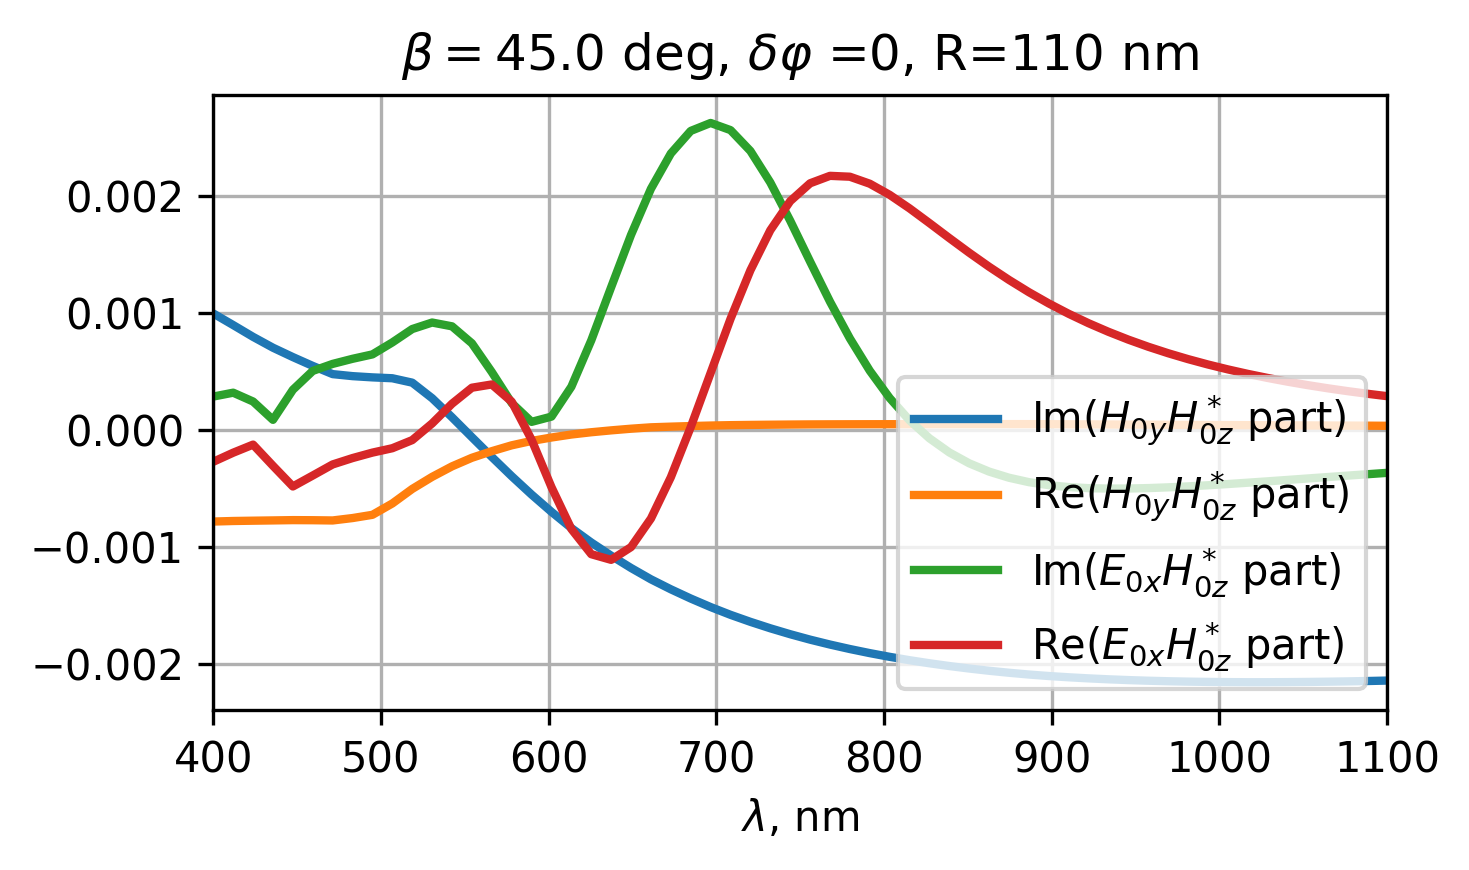

In [51]:
H0yH0z = - k0(wls) * np.sin(angle)/omega(wls)/mu0_const * rp_rs_conj_mymz_1

E0xH0z = np.sin(2*angle)/2 *AlphaEE(wls)*eps0_const * GMEyx*rp_rs_conj_mymz_2 /(1-AlphaEE(wls)*eps0_const * GEExx)

plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, np.imag(H0yH0z), label='Im($H_{0y} H_{0z}^*$ part)', lw=2)
plt.plot(wls, np.real(H0yH0z), label='Re($H_{0y} H_{0z}^*$ part)', lw=2)
plt.plot(wls, np.imag(E0xH0z), label='Im($E_{0x} H_{0z}^*$ part)', lw=2)
plt.plot(wls, np.real(E0xH0z), label='Re($E_{0x} H_{0z}^*$ part)', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend(loc='lower right')

plt.savefig(f'HOYHOZ_E0XH0Z_mymz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')


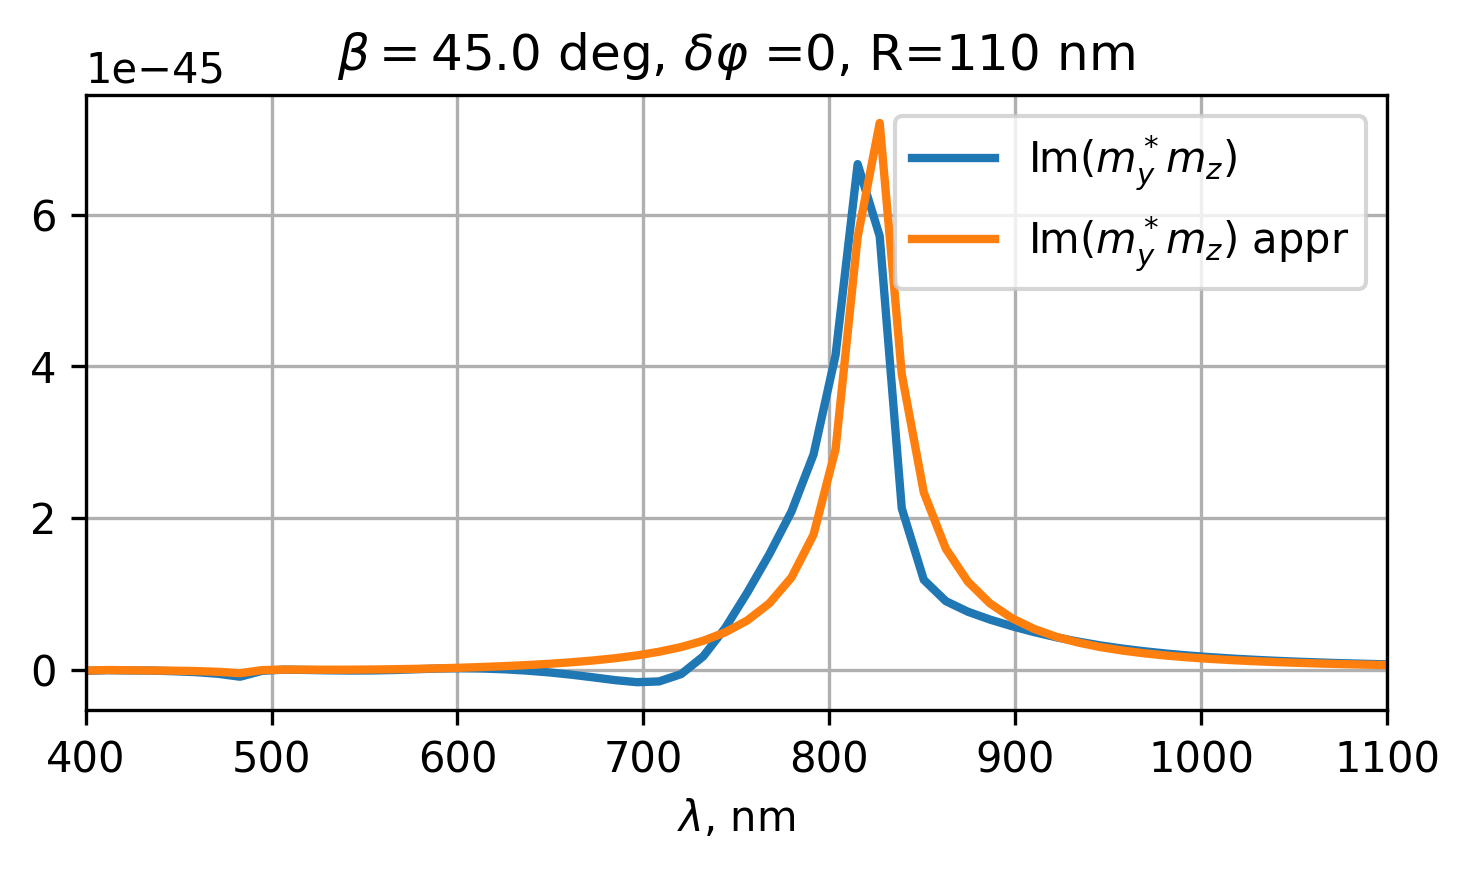

In [216]:
my_mz_coeff = -np.abs(AlphaHH(wls))**2 *  k0(wls)*np.sin(2*a_angle)/2/omega(wls)/mu0_const

my_mz_1 = my_mz_coeff * np.imag( Greens_my_mz * H0yH0z)

my_mz_2 = my_mz_coeff * np.imag( Greens_my_mz * E0xH0z)

Greens_my_mz_appr2 = 1/(Cmymz)/Bmymz

mymz_apr = my_mz_coeff * np.imag( Greens_my_mz_appr2 * (H0yH0z ) )


plt.figure(figsize=(5,3),dpi=300)
plt.plot(wls, my_mz_1 + my_mz_2, label='Im($m_y^*  m_z$)', lw=2)

plt.plot(wls, mymz_apr , label='Im($m_y^*  m_z$) appr', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'mymz_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')


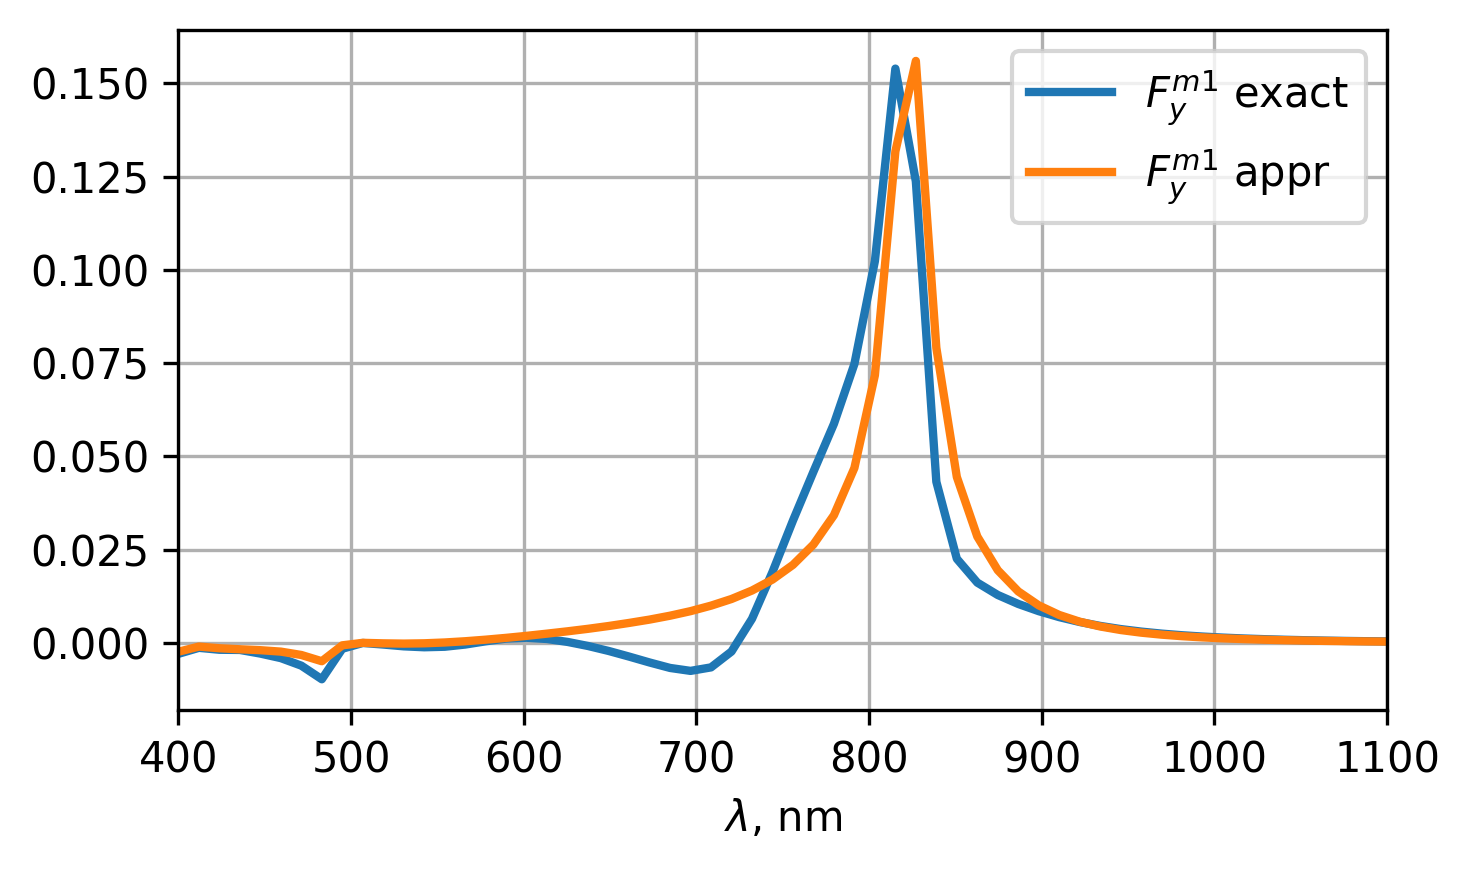

In [62]:
plt.figure(figsize=(5,3),dpi=300)
plt.plot(wls, F_y[:,5]/F0, label='$F_y^{m1}$ exact', lw=2)
plt.plot(wls, -k0(wls)**2 * mu0_const *mymz_apr * np.imag(dyGH_yz)/F0 , label='$F_y^{m1}$ appr' , lw=2)
plt_set(wls)
plt.legend()

plt.savefig(f'fym1_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

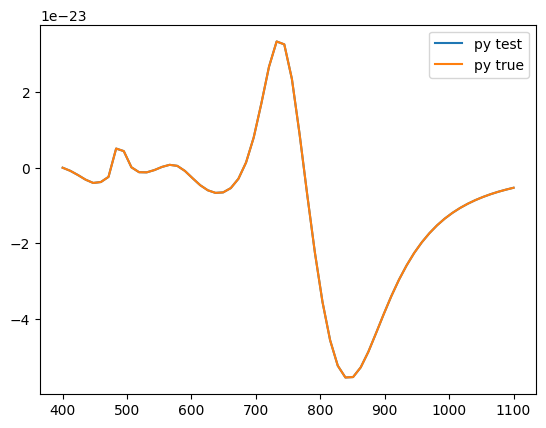

In [197]:

Greeeeens_mypz =  (1 - AlphaEE(wls)* eps0_const * GEExx) /((1 - AlphaHH(wls) * GMMxx)*(1 - AlphaEE(wls)* eps0_const * GEExx) - AlphaHH(wls)*AlphaEE(wls)*eps0_const * GEMxy*GMEyx)

H_eff_y_m = H0Y * Greeeeens_mypz

H_eff_y_e =  AlphaEE(wls) * eps0_const * GMEyx * E0X /(1-AlphaEE(wls)*eps0_const*GEExx) *  Greeeeens_mypz

H_eff_z = H0Z /(1 - AlphaHH(wls)*GMMzz)

plt.plot(wls, np.imag(AlphaHH(wls) * (H_eff_y_m + H_eff_y_e)), label='py test')
plt.plot(wls, np.real(M[:,1]), label='py true')
plt.legend()

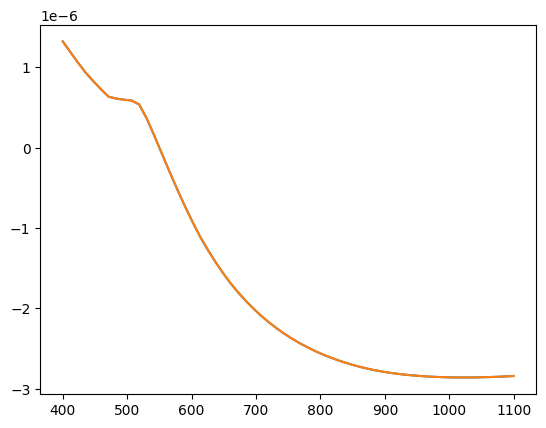

In [232]:
E0xH0z = np.sin(2*angle)/2 *AlphaEE(wls)*eps0_const * GMEyx*rp_rs_conj_mymz_2 /(1-AlphaEE(wls)*eps0_const * GEExx) #OK

my_mz_coeff_test =  k0(wls)*np.sin(2*a_angle)/2/omega(wls)/mu0_const

H0yH0zzz = - k0(wls)**2 * np.sin(angle)*np.sin(2*a_angle)/2/omega(wls)**2 / mu0_const**2 * (1 + RPP(wls)*np.exp(2j*KZZ(wls)*z0) + RSS(wls).conj() * np.exp(-2j*KZZ(wls)*z0) + RSS(wls).conj()*RPP(wls))



# plt.plot(wls, np.real( (H0Y  )* H0Z.conj()))
plt.plot(wls, np.imag( (H0Y ) * H0Z.conj()))
plt.plot(wls, np.imag(H0yH0zzz))
#plt.plot(wls, np.imag( my_mz_coeff /(-np.abs(AlphaHH(wls))**2)* (H0yH0z ) ))

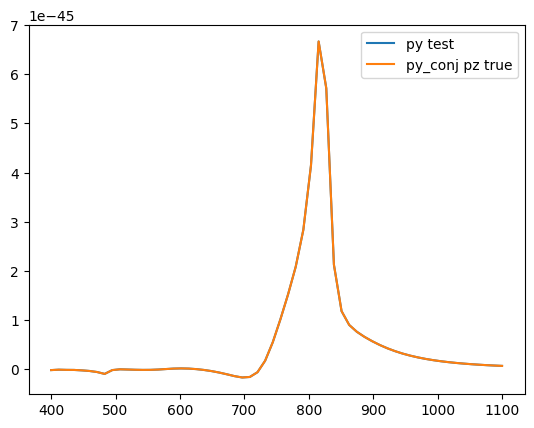

In [224]:
Amymz = (1 - AlphaEE(wls)* eps0_const * GEExx)

Bmymz = 1 - AlphaHH(wls).conj()*GMMzz.conj()

Cmymz = (1 - AlphaHH(wls) * GMMxx)

Dmymz = (1 - AlphaEE(wls)* eps0_const * GEExx)

Mmymz = - AlphaHH(wls)*AlphaEE(wls)*eps0_const * GEMxy*GMEyx


Greens_my_mz = Amymz/(Cmymz*Dmymz+Mmymz)/Bmymz

#plt.plot(wls, np.imag( Greens_my_mz * my_mz_coeff * (H0yH0z + E0xH0z) ))

plt.plot(wls, -np.abs(AlphaHH(wls))**2 * np.imag( Greens_my_mz *( (H0Y + AlphaEE(wls) * eps0_const * GMEyx *E0X/(1-AlphaEE(wls)*eps0_const*GEExx)) * H0Z.conj())), label='py test')
plt.plot(wls, np.imag(M[:,1].conj()*M[:,2]), label='py_conj pz true')
plt.legend()


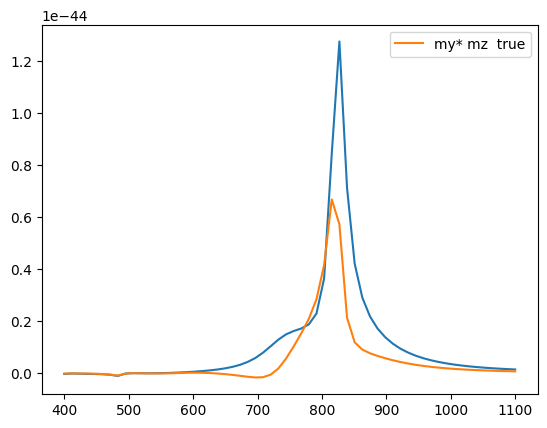

In [120]:
Amymz = 1 - AlphaEE(wls)*eps0_const*GEExx

Bmymz = 1 - AlphaHH(wls).conj()*GMMzz.conj()

Cmymz = 1 - AlphaEE(wls)*GEExx*eps0_const

Dmymz = 1 - AlphaHH(wls) * GMMxx

Mmymz = - AlphaEE(wls)*AlphaHH(wls)*eps0_const * GEMxy*GMEyx


Greens_my_mz = Amymz/(Bmymz*(Cmymz*Dmymz+Mmymz))

plt.plot(wls, -np.abs(AlphaHH(wls))**2*np.imag( (H0Y + AlphaEE(wls)*eps0_const*E0X /(1-AlphaEE(wls)*eps0_const*GEExx))*Greens_my_mz *H0Z.conj() ))
plt.plot(wls, np.imag(M[:,1].conj()*M[:,2]), label='my* mz  true')
plt.legend()

# $Re(p_x^* m_z)$

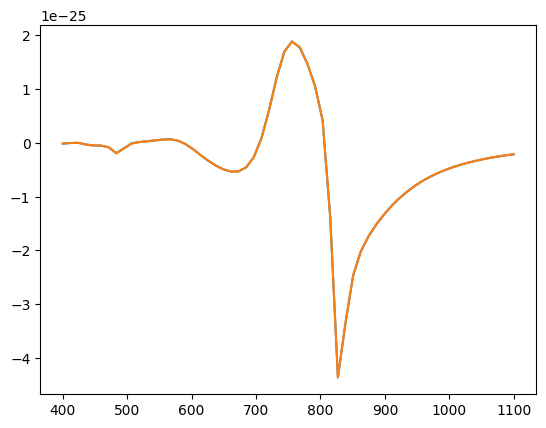

In [81]:
plt.plot(wls,- omega(wls) * mu0_const * (np.imag(dyrotGHxz) * np.real(P[:,0].conj()*M[:,2]) + np.imag(dyrotGHzx) * np.real(P[:,2].conj()*M[:,0])))
plt.plot(wls, F_y[:,3]+F_y[:,6])

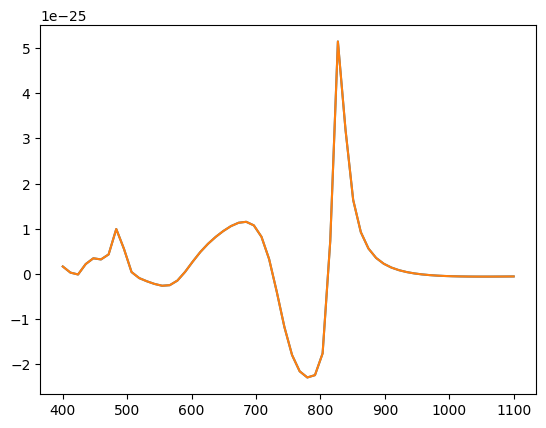

In [82]:
plt.plot(wls,-k0(wls)**4/(12 * np.pi * eps0_const*c_const) * np.real( P[:,2]*M[:,0].conj() - M[:,2].conj()*P[:,0]))
plt.plot(wls, F_y[:,7])

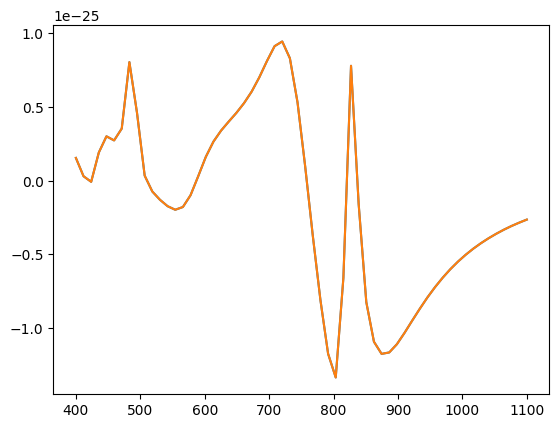

In [138]:
Fy_pxmz_exact = - omega(wls) * mu0_const * (np.imag(dyrotGHxz)  - k0(wls)**3/(12 * np.pi )) * np.real(P[:,0].conj()*M[:,2])

Fy_pzmx_exact = - omega(wls) * mu0_const * (np.imag(dyrotGHzx) + k0(wls)**3/(12 * np.pi)) * np.real(P[:,2].conj() * M[:,0])

plt.plot(wls, Fy_pxmz_exact+ Fy_pzmx_exact)
plt.plot(wls, F_y[:,7]+F_y[:,3]+F_y[:,6])

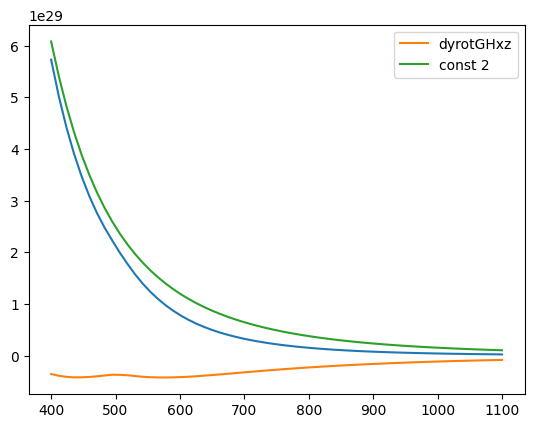

In [140]:
plt.plot(wls, - omega(wls) * mu0_const * np.imag(dyrotGHxz)  + omega(wls) * mu0_const *  k0(wls)**3/(12 * np.pi ))
plt.plot(wls, - omega(wls) * mu0_const * np.imag(dyrotGHxz), label='dyrotGHxz' )
plt.plot(wls, omega(wls) * mu0_const * k0(wls)**3/(12 * np.pi ), label='const 2')
plt.legend()

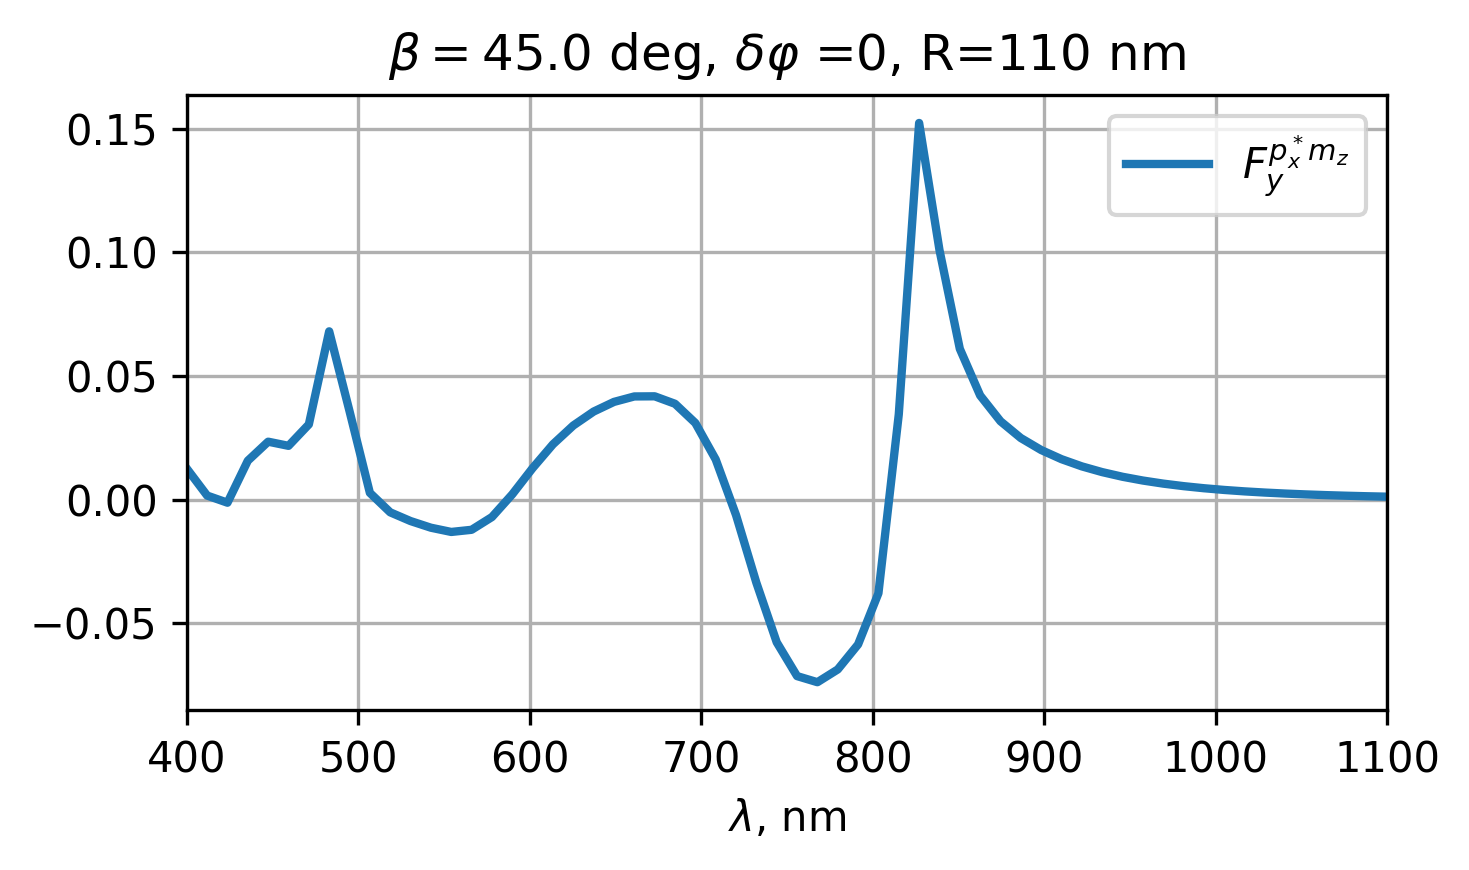

In [179]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, Fy_pxmz_exact/F0, label='$F_y^{p_x^* m_z}$', lw=2 )

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'fypxmz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

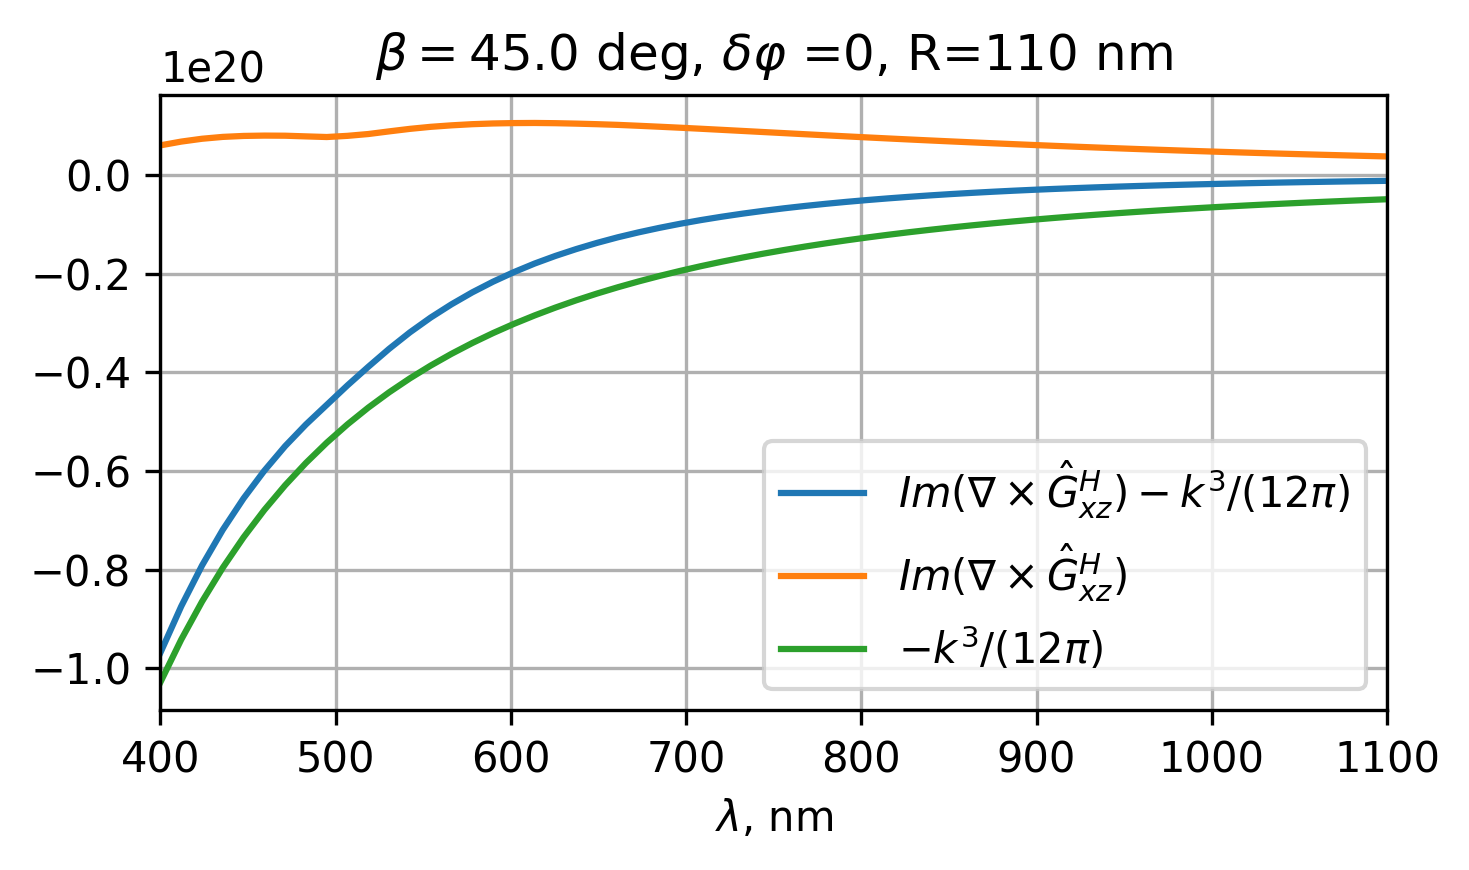

In [197]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(dyrotGHxz)  - k0(wls)**3/(12 * np.pi ), label='$Im(\\nabla \\times \hat{G}_{xz}^H) - k^3/(12 \pi)$')
plt.plot(wls, np.imag(dyrotGHxz), label='$Im(\\nabla \\times \hat{G}_{xz}^H)$' )
plt.plot(wls, - k0(wls)**3/(12 * np.pi ), label='$- k^3/(12 \pi)$')

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'dyrotGHxz_const_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

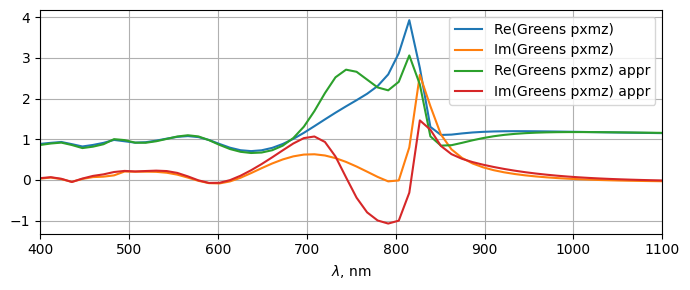

In [ ]:
Apxmy = 1 - AlphaHH(wls) * GMMxx
Bpxmz = 1 - AlphaHH(wls).conj() * GMMzz.conj()
Cpxmz = 1 - AlphaEE(wls) * eps0_const * GEExx 
Epxmz = -AlphaEE(wls)*eps0_const * AlphaHH(wls) * GEMxy * GMEyx

Greens_px_mz = Apxmy/(Bpxmz*(Cpxmz*Apxmy+Epxmz))

Greens_px_mz_appr = 1/(Bpxmz*(Cpxmz))

plt.figure(figsize=(7,3))

plt.plot(wls, np.real(Greens_px_mz), label='Re(Greens pxmz) ')
plt.plot(wls, np.imag(Greens_px_mz), label='Im(Greens pxmz)')
plt_set(wls)



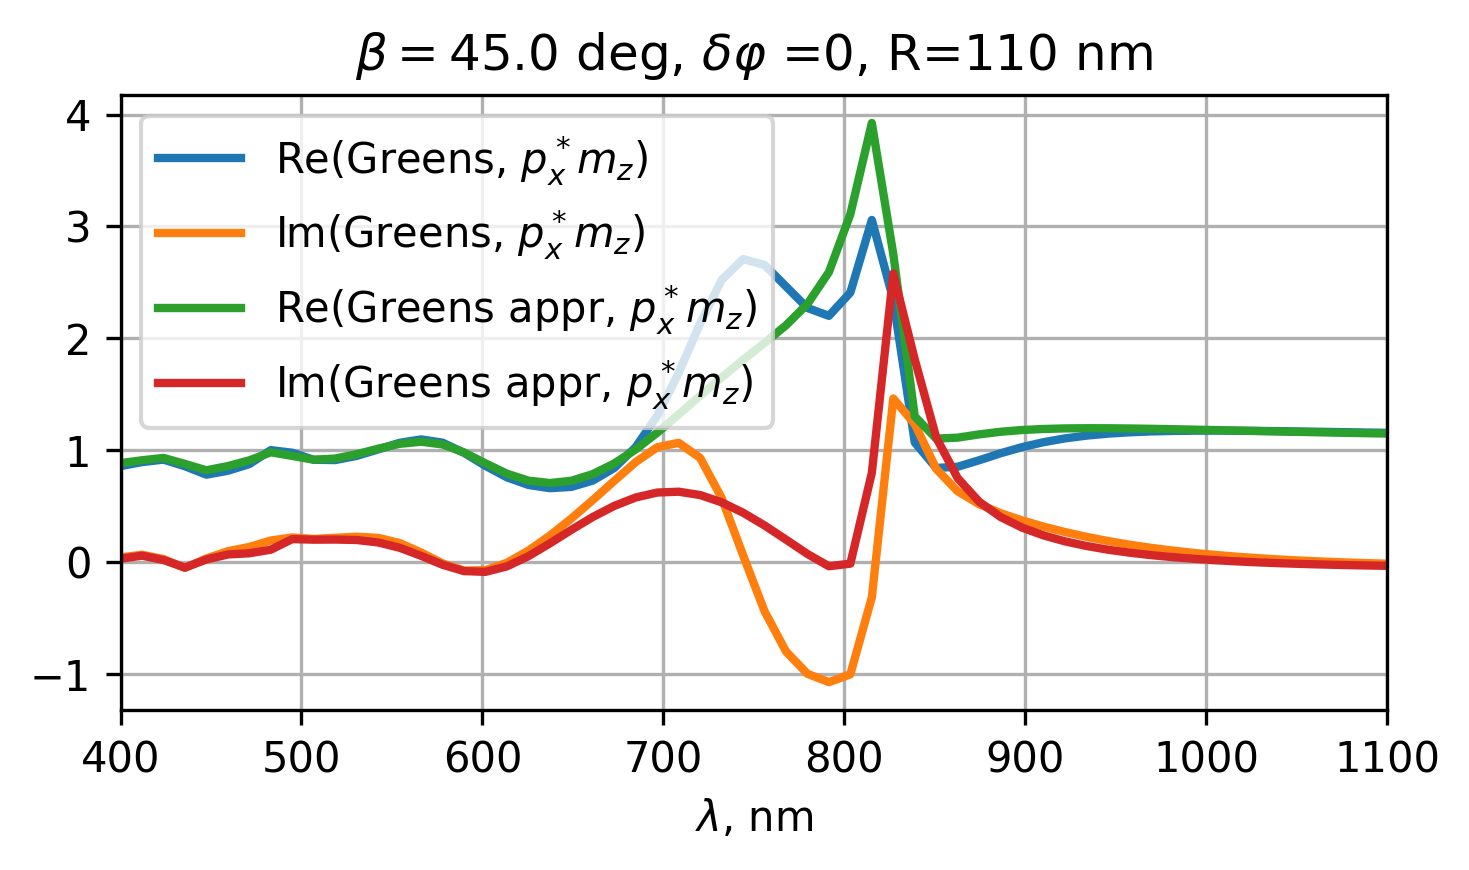

In [130]:
plt.figure(figsize=(5,3), dpi=300)

plt.plot(wls, np.real(Greens_px_mz), label='Re(Greens, $p_x^* m_z$)', lw=2)
plt.plot(wls, np.imag(Greens_px_mz), label='Im(Greens, $p_x^* m_z$)', lw=2)

plt.plot(wls, np.real(Greens_px_mz_appr), label='Re(Greens appr, $p_x^* m_z$)', lw=2)
plt.plot(wls, np.imag(Greens_px_mz_appr), label='Im(Greens appr, $p_x^* m_z$)', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'greeens_pxmz_const_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

In [60]:
E0X = np.cos(angle) * (np.exp(-1j*KZZ(wls)*z0) - RPP(wls)*np.exp(1j*KZZ(wls)*z0)) * np.cos(a_angle)
H0Y = -1* k0(wls) /omega(wls)/mu0_const * (np.exp(-1j*KZZ(wls)*z0)+RPP(wls)*np.exp(1j*KZZ(wls)*z0))*np.cos(a_angle)


In [282]:
H0Z = k0(wls)/omega(wls)/mu0_const * np.sin(angle) * ( np.exp(-1j*KZZ(wls)*z0) + RSS(wls)*np.exp(1j*KZZ(wls)*z0)) * np.sin(a_angle)

In [61]:
# plt.plot(wls, np.real(AlphaHH(wls)* H0Z /(1-AlphaHH(wls)*GMMzz)), label='mz test')
# plt.plot(wls, np.real(M[:,2]), label='mz true')
# plt.legend()

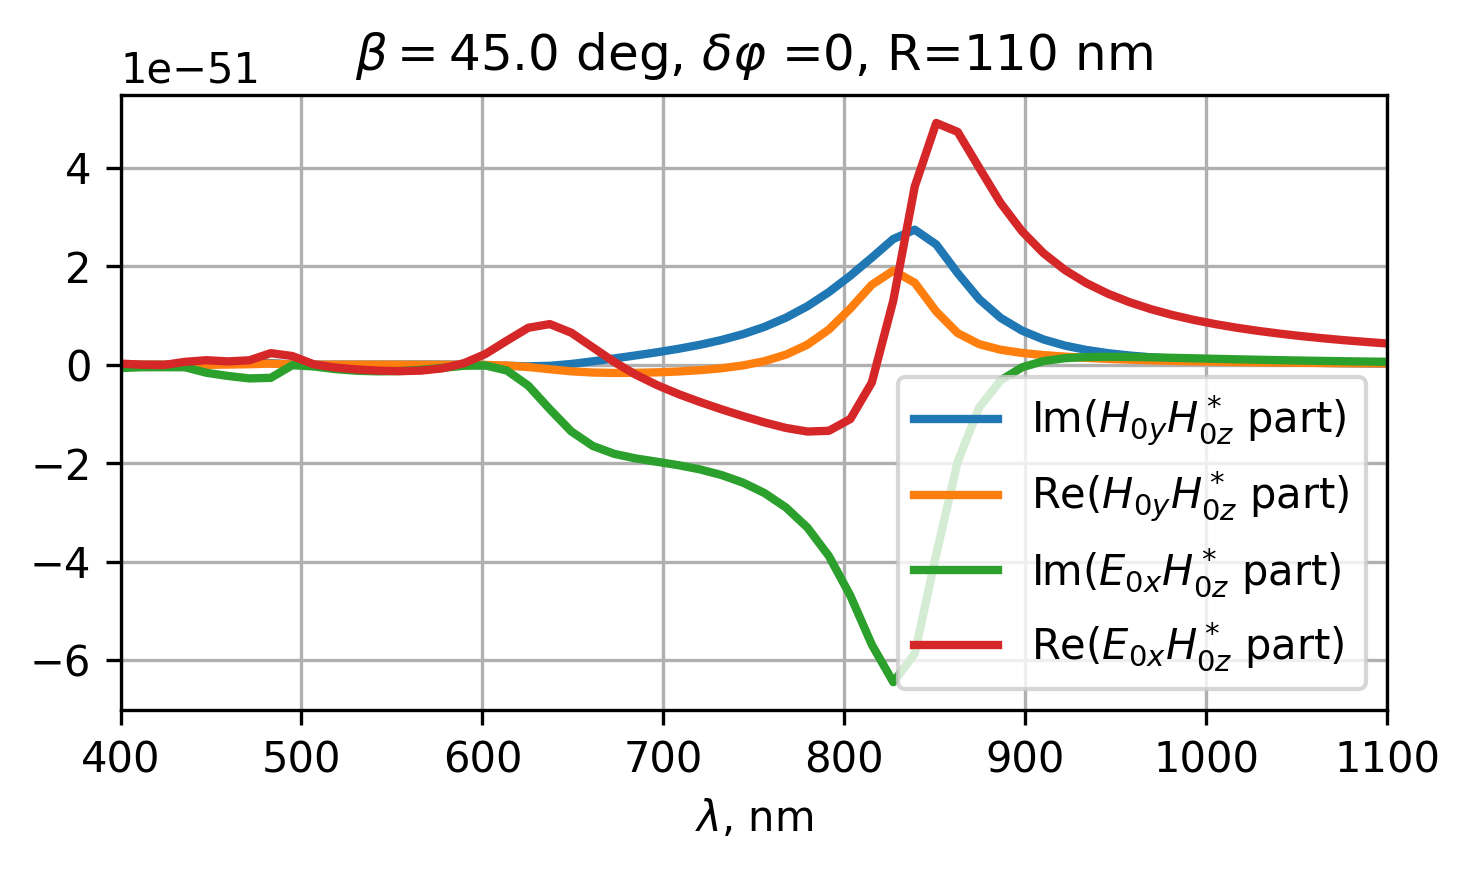

In [126]:
E0xH0z_v2 = AlphaEE(wls)*eps0_const * AlphaHH(wls).conj() * np.sin(2*angle)/ 2 * rp_rs_conj_mymz_2 

H0yH0z_v2 = -np.abs(AlphaHH(wls))**2 * AlphaEE(wls) * eps0_const *k0(wls)*np.sin(angle) * GEMxy/(omega(wls) * mu0_const * (1 - AlphaHH(wls)*GMMxx)) * rp_rs_conj_mymz_1

plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, np.imag(H0yH0z_v2), label='Im($H_{0y} H_{0z}^*$ part)', lw=2)
plt.plot(wls, np.real(H0yH0z_v2), label='Re($H_{0y} H_{0z}^*$ part)', lw=2)
plt.plot(wls, np.imag(E0xH0z_v2), label='Im($E_{0x} H_{0z}^*$ part)', lw=2)
plt.plot(wls, np.real(E0xH0z_v2), label='Re($E_{0x} H_{0z}^*$ part)', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend(loc='lower right')

plt.savefig(f'HOYHOZ_E0XH0Z_pxmz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

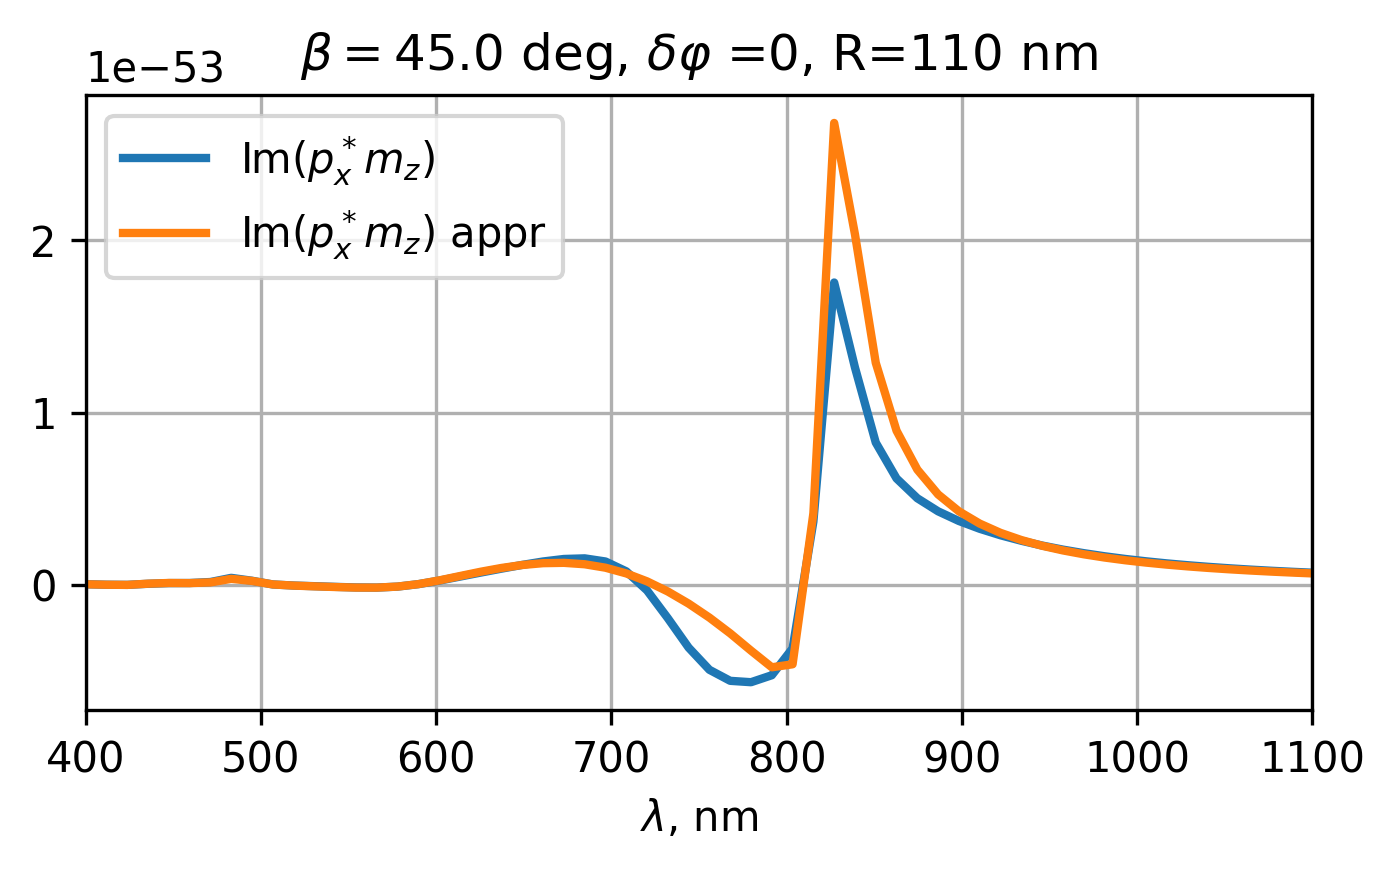

In [131]:
# Apxmy = 1 - AlphaHH(wls) * GMMxx
# Bpxmz = 1 - AlphaHH(wls).conj() * GMMzz.conj()
# Cpxmz = 1 - AlphaEE(wls) * eps0_const * GEExx 
# Epxmz = -AlphaEE(wls)*eps0_const * AlphaHH(wls) * GMExy * GEMyx


# Eeff_x_e = E0X * Apxmy / (Cpxmz*Apxmy+Epxmz)
# Eeff_x_m = -H0Y * AlphaHH(wls) * GEMyx /(1-AlphaHH(wls)*GMMxx) * Apxmy / (Cpxmz*Dpxmz+Epxmz)



pxmz_coeff = k0(wls) * np.sin(2*a_angle)/2/omega(wls)/mu0_const

px_mz_1 = pxmz_coeff * np.real( Greens_px_mz * E0xH0z_v2)

px_mz_2 = pxmz_coeff * np.real( Greens_px_mz * H0yH0z_v2)

px_mz_appr = pxmz_coeff * np.real( Greens_px_mz_appr * E0xH0z_v2)


plt.figure(figsize=(5,3),dpi=300)
plt.plot(wls, px_mz_1+px_mz_2, label='Im($p_x^*  m_z$)', lw=2)

plt.plot(wls, px_mz_appr , label='Im($p_x^*  m_z$) appr', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'pxmz_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')



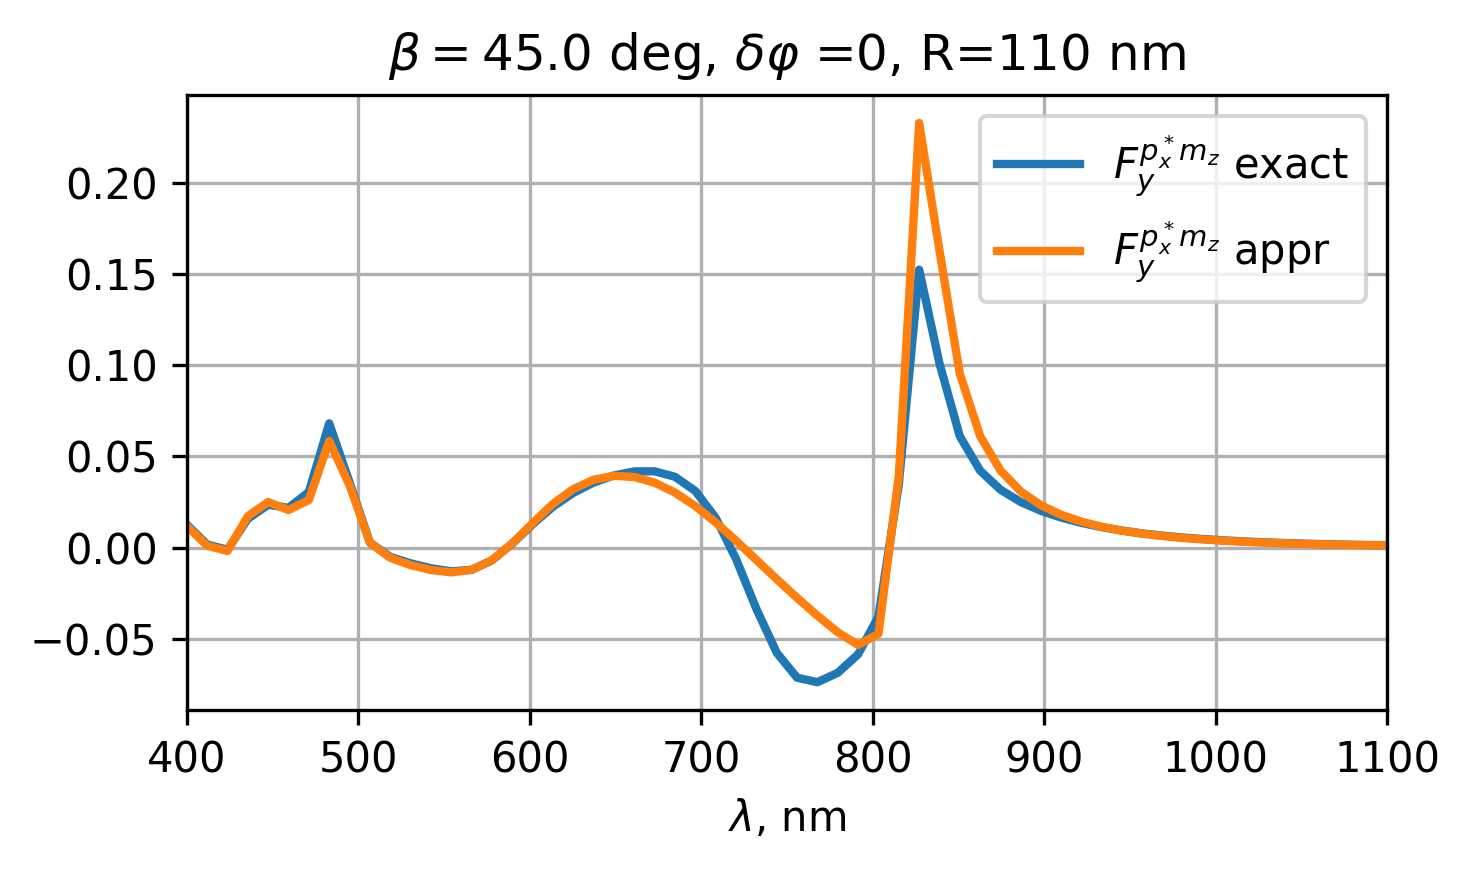

In [181]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, Fy_pxmz_exact/F0, label='$F_y^{p_x^* m_z}$ exact', lw=2 )


Fy_pxmz_appr = - omega(wls) * mu0_const * (np.imag(dyrotGHxz) - k0(wls)**3/(12 * np.pi )) * px_mz_appr

plt.plot(wls, Fy_pxmz_appr/F0, label='$F_y^{p_x^* m_z}$ appr', lw=2 )

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'fypxmz_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

# $Re(m_x^* p_z) $

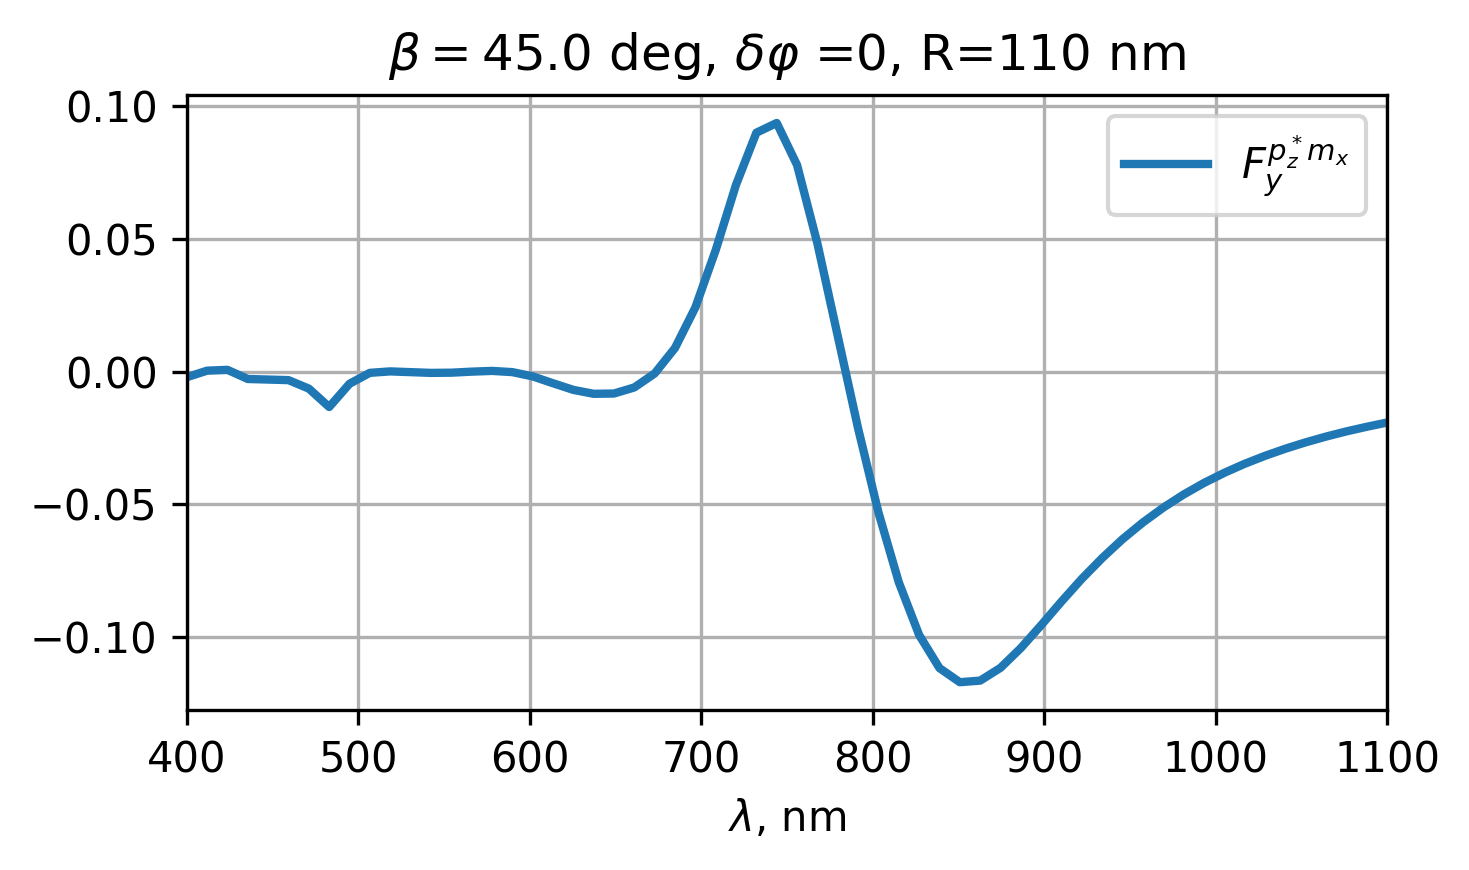

In [180]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, Fy_pzmx_exact/F0, label='$F_y^{p_z^* m_x}$', lw=2 )

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'fypzmx_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

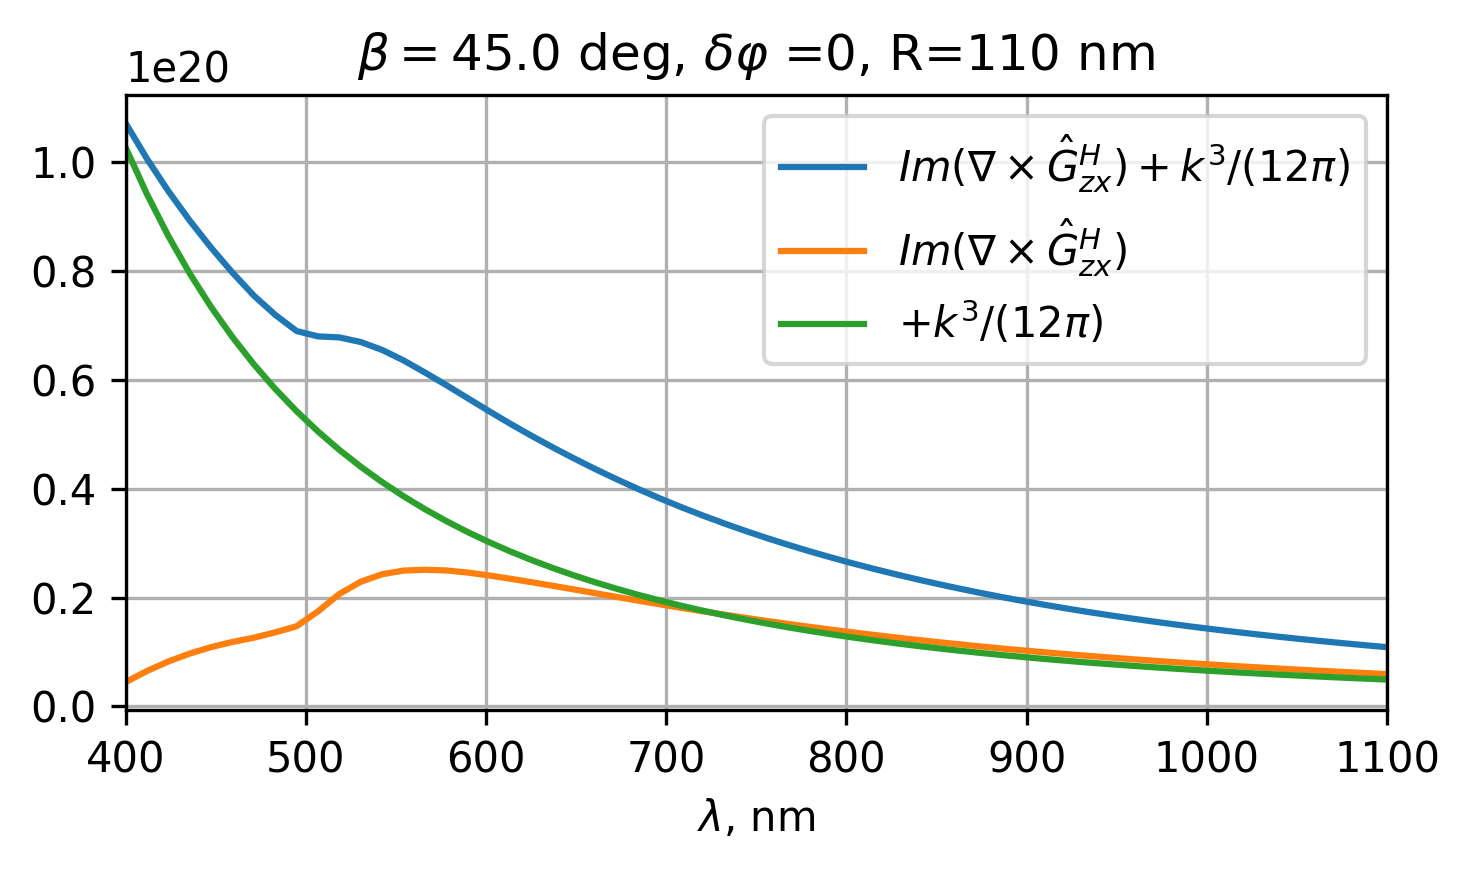

In [212]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.imag(dyrotGHzx)  + k0(wls)**3/(12 * np.pi ), label='$Im(\\nabla \\times \hat{G}_{zx}^H) + k^3/(12 \pi)$')
plt.plot(wls, np.imag(dyrotGHzx), label='$Im(\\nabla \\times \hat{G}_{zx}^H)$' )
plt.plot(wls, + k0(wls)**3/(12 * np.pi ), label='$+ k^3/(12 \pi)$')

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'dyrotGHzx_const_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

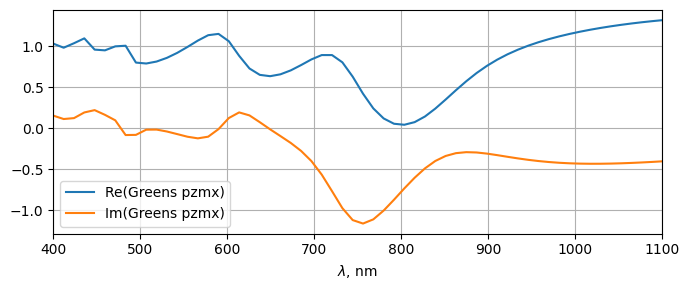

In [174]:
Apzmx = 1 - AlphaEE(wls) * eps0_const * GEExx
Bpzmx = 1 - AlphaEE(wls).conj() * eps0_const * GEEzz.conj()
Cpzmx = 1 - AlphaHH(wls) * GMMxx
Dpzmx = - AlphaHH(wls) * AlphaEE(wls) * eps0_const * GMExy * GEMyx

Greens_pz_mx = Apzmx/(Cpzmx * Apzmx + Dpzmx)/Bpzmx

Greens_pz_mx_appr= 1/(Cpzmx  )/Bpzmx

plt.figure(figsize=(7,3))
plt.plot(wls, np.real(Greens_pz_mx), label='Re(Greens pzmx)')
plt.plot(wls, np.imag(Greens_pz_mx), label='Im(Greens pzmx)')
plt_set(wls)

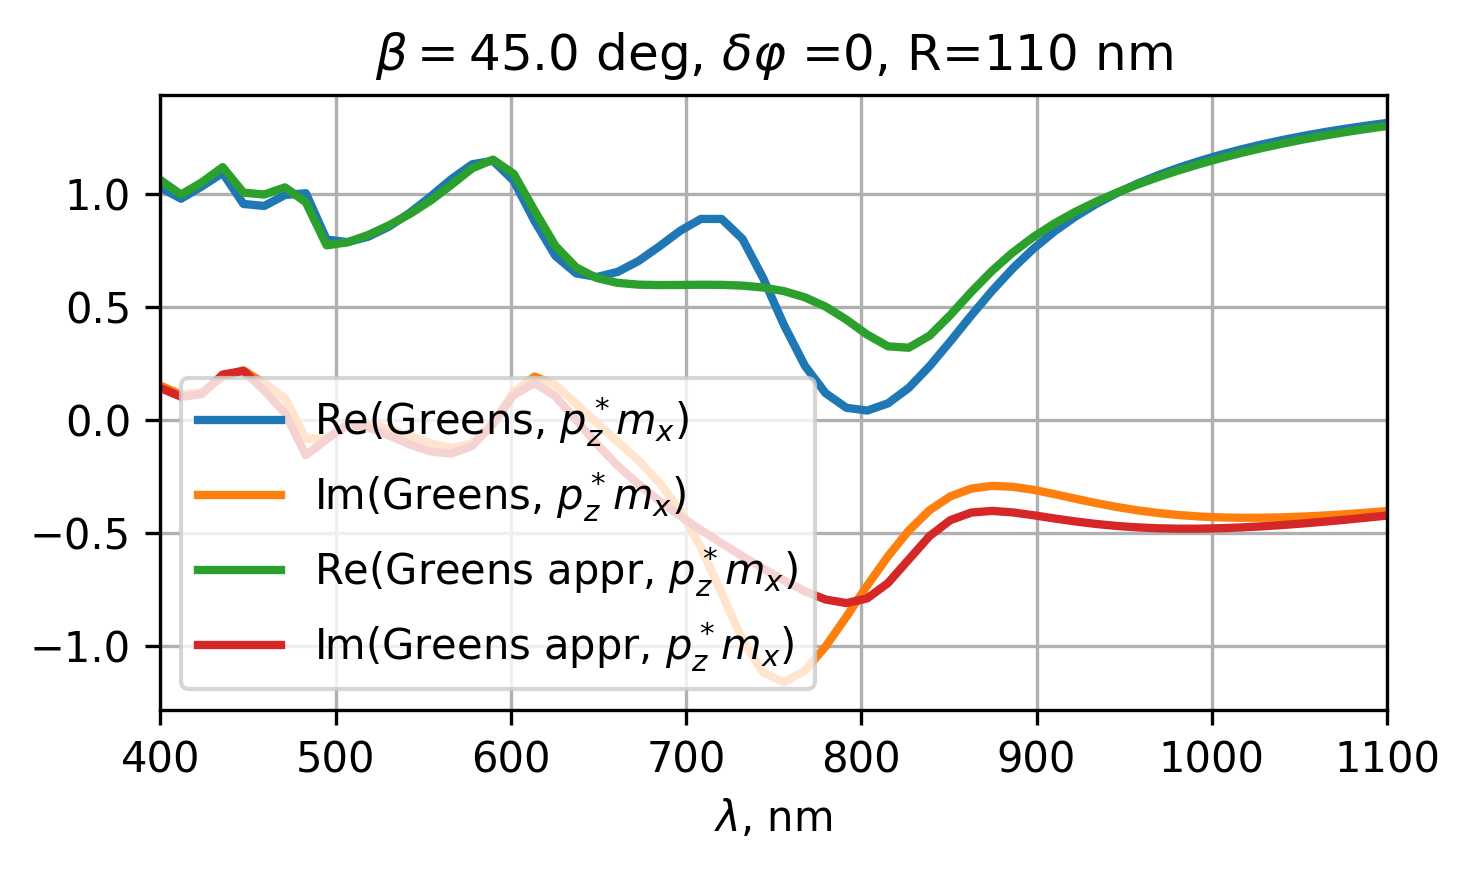

In [183]:
plt.figure(figsize=(5,3), dpi=300)

plt.plot(wls, np.real(Greens_pz_mx), label='Re(Greens, $p_z^* m_x$)', lw=2)
plt.plot(wls, np.imag(Greens_pz_mx), label='Im(Greens, $p_z^* m_x$)', lw=2)

plt.plot(wls, np.real(Greens_pz_mx_appr), label='Re(Greens appr, $p_z^* m_x$)', lw=2)
plt.plot(wls, np.imag(Greens_pz_mx_appr), label='Im(Greens appr, $p_z^* m_x$)', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

plt.savefig(f'greeens_pzmx_const_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

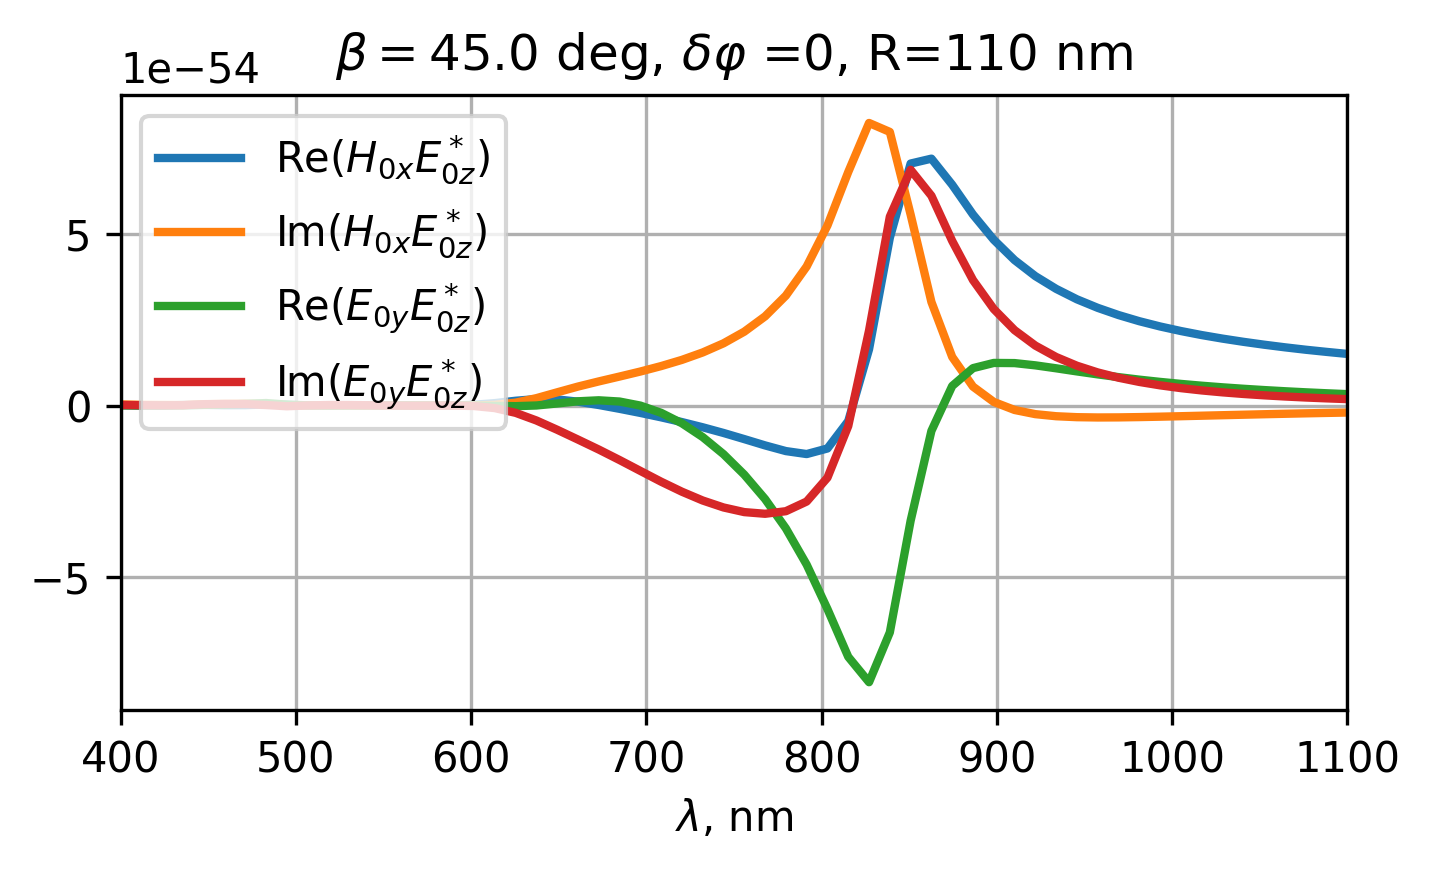

In [176]:
H0xE0z_v2 =  AlphaHH(wls) * AlphaEE(wls).conj() * H0XE0z * eps0_const

E0yE0z_v2 = E0yE0z * AlphaHH(wls) * np.abs(AlphaEE(wls))**2 *eps0_const**2 * GMExy/(1 - AlphaEE(wls) * eps0_const * GEExx)


plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, np.real(H0xE0z_v2), label='Re($H_{0x}E_{0z}^*$)', lw=2)
plt.plot(wls, np.imag(H0xE0z_v2), label='Im($H_{0x}E_{0z}^*$)', lw=2)

plt.plot(wls, np.real(E0yE0z_v2), label='Re($E_{0y}E_{0z}^*$)', lw=2)
plt.plot(wls, np.imag(E0yE0z_v2), label='Im($E_{0y}E_{0z}^*$)', lw=2)

plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend(loc='upper left')

plt.savefig(f'H0XE0Z_E0YE0Z_pzmx_const_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')



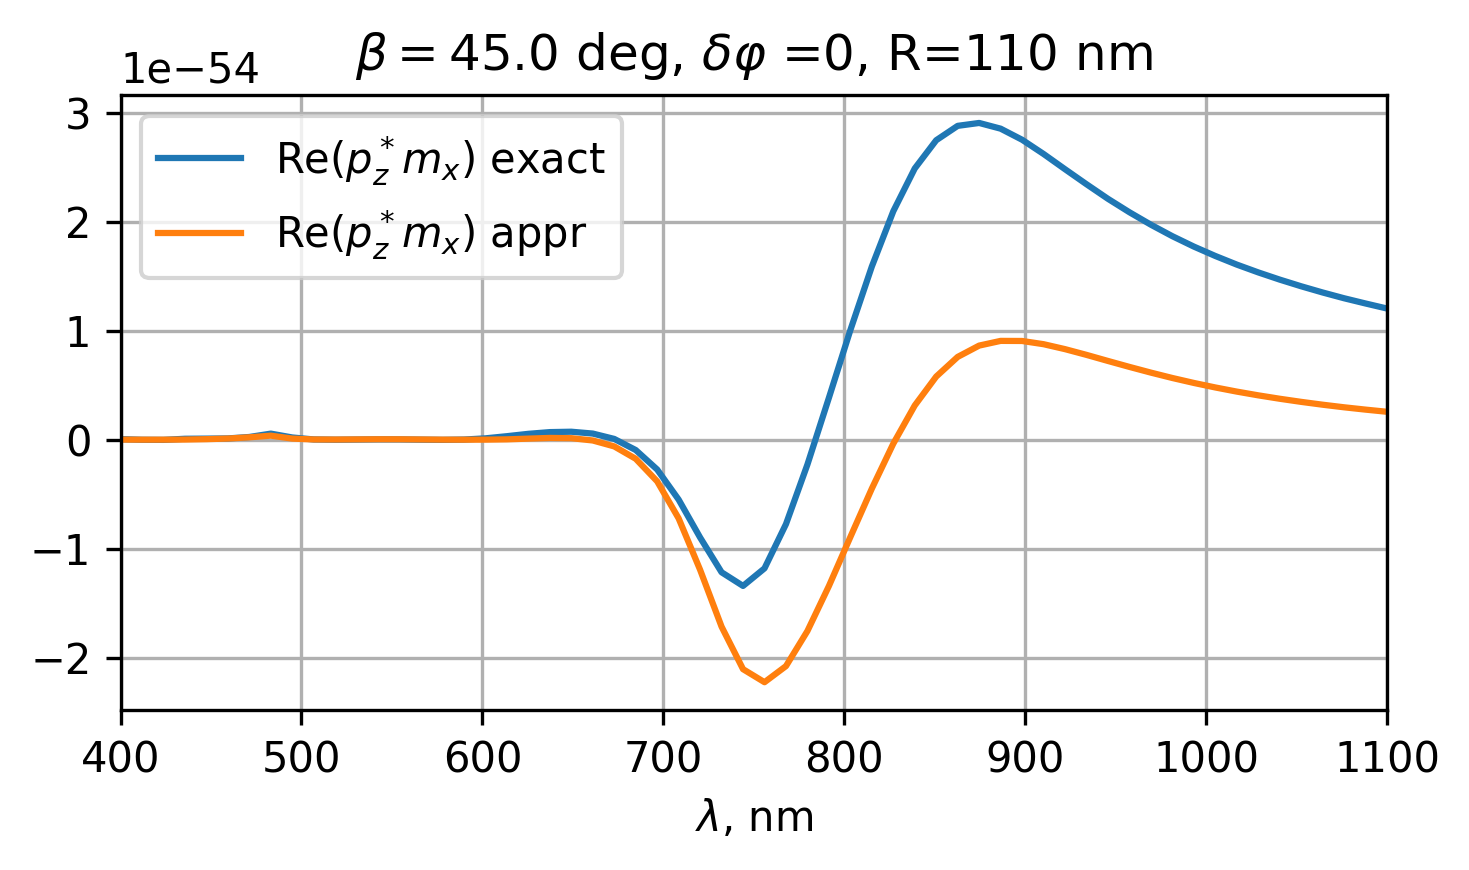

In [194]:
pz_mx_1 = np.sin(2*a_angle)/2 * np.real(Greens_pz_mx * H0xE0z_v2)

pz_mx_2 = np.sin(2*a_angle)/2 * np.real(Greens_pz_mx * E0yE0z_v2)

pz_mx_approx = np.sin(2*a_angle)/2 * np.real(Greens_pz_mx* (E0yE0z_v2   ) )

plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, pz_mx_2+pz_mx_1, label='Re($p_z^* m_x$) exact')
plt.plot(wls, pz_mx_approx, label='Re($p_z^* m_x$) appr')


plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend(loc='upper left')

#plt.savefig(f'pzmx_const_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

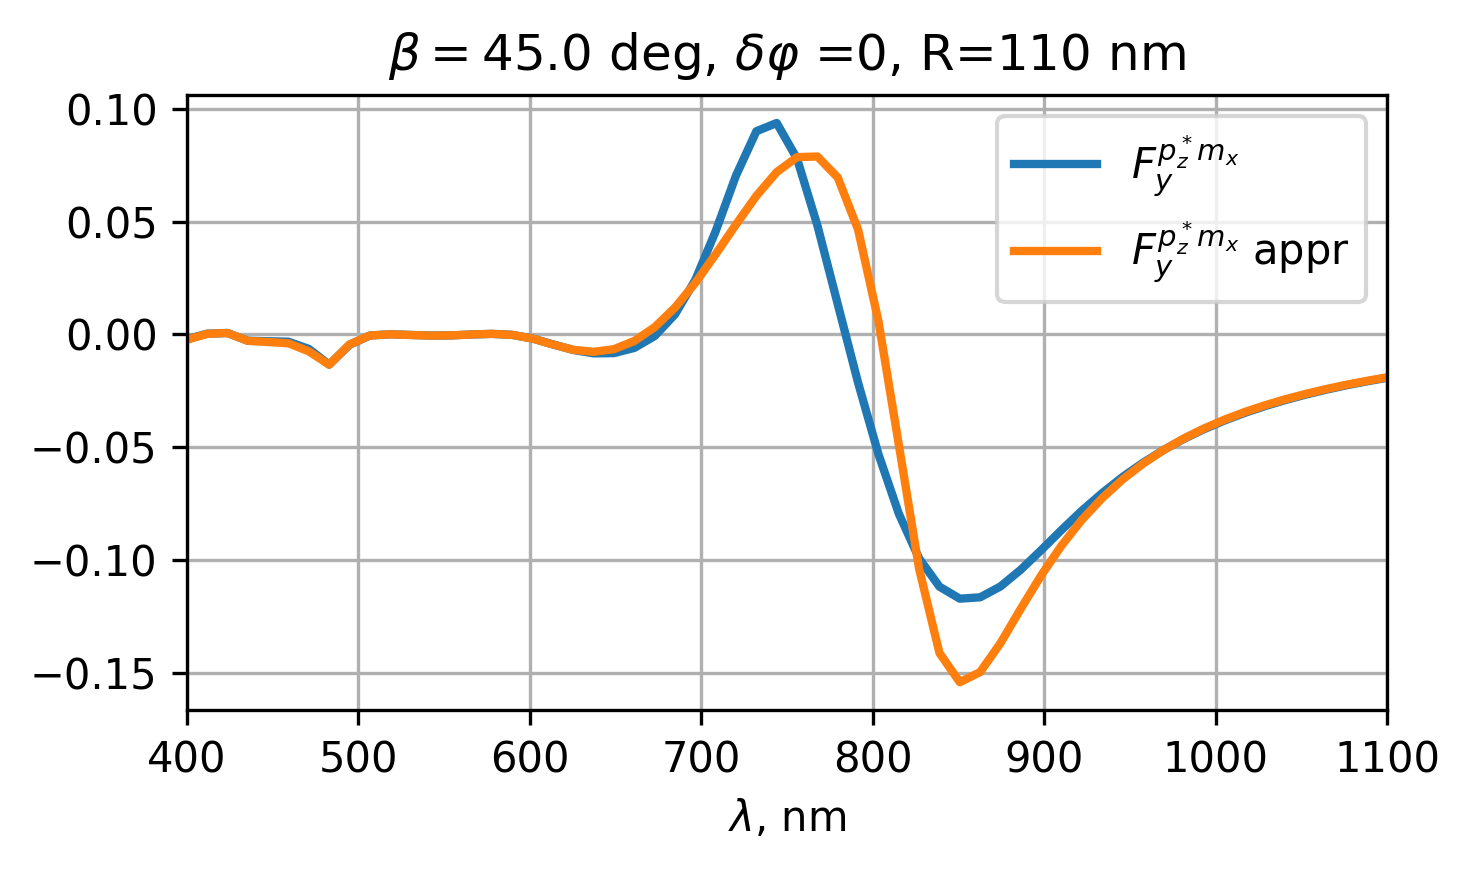

In [ ]:
Fy_pzmx_appr = - omega(wls) * mu0_const * (np.imag(dyrotGHzx) + k0(wls)**3/(12 * np.pi )) * pz_mx_approx

plt.figure(figsize=(5,3), dpi=300)
plt.plot(wls, Fy_pzmx_exact/F0, label='$F_y^{p_z^* m_x}$', lw=2 )
plt.plot(wls, Fy_pzmx_appr/F0, label='$F_y^{p_z^* m_x}$ appr', lw=2 )


plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()

#plt.savefig(f'fypzmx_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

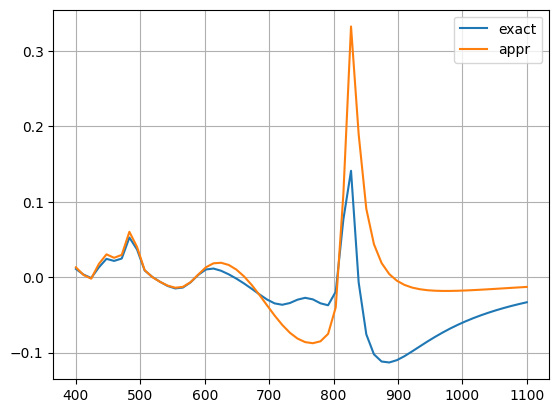

In [ ]:
plt.plot(wls, F_y[:,0]/F0, label='exact')
plt.plot(wls, - k0(wls)**2 * py_pz_appr * np.imag(dyGE_yz) / eps0_const/F0 -k0(wls)**2 * mu0_const *mymz_apr * np.imag(dyGH_yz)/F0 + Fy_pxmz_appr/F0 + Fy_pzmx_appr, label='appr')
plt.grid() 
plt.legend()

# $\alpha_E, \alpha_H$


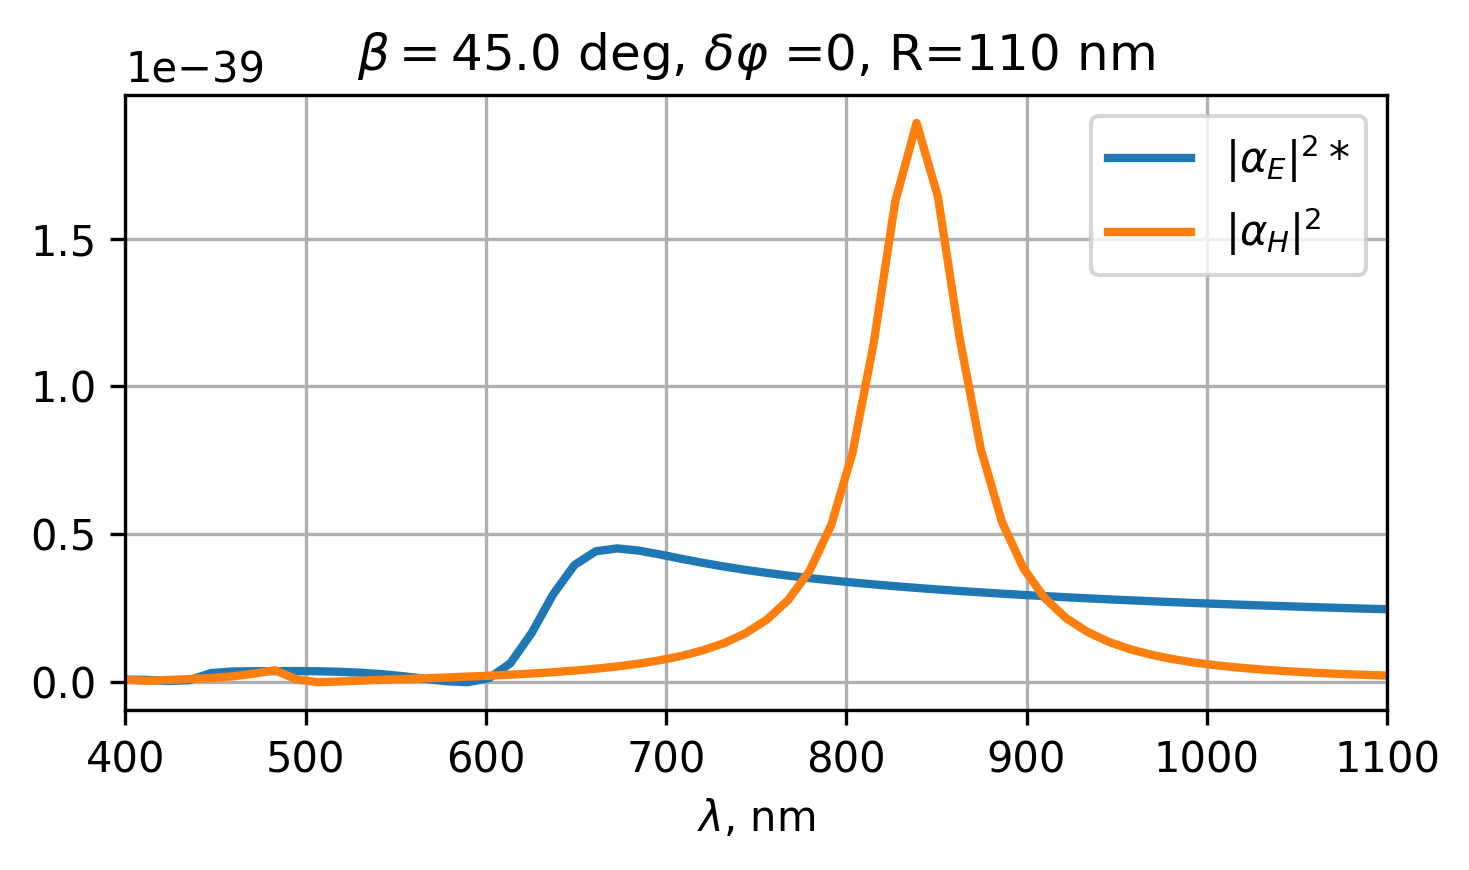

In [210]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, np.abs(AlphaEE(wls))**2, label='$|\\alpha_E|^2*$', lw=2)
plt.plot(wls, np.abs(AlphaHH(wls))**2, label='$|\\alpha_H|^2$', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()
plt.savefig(f'alphaE_alphaH_abs_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

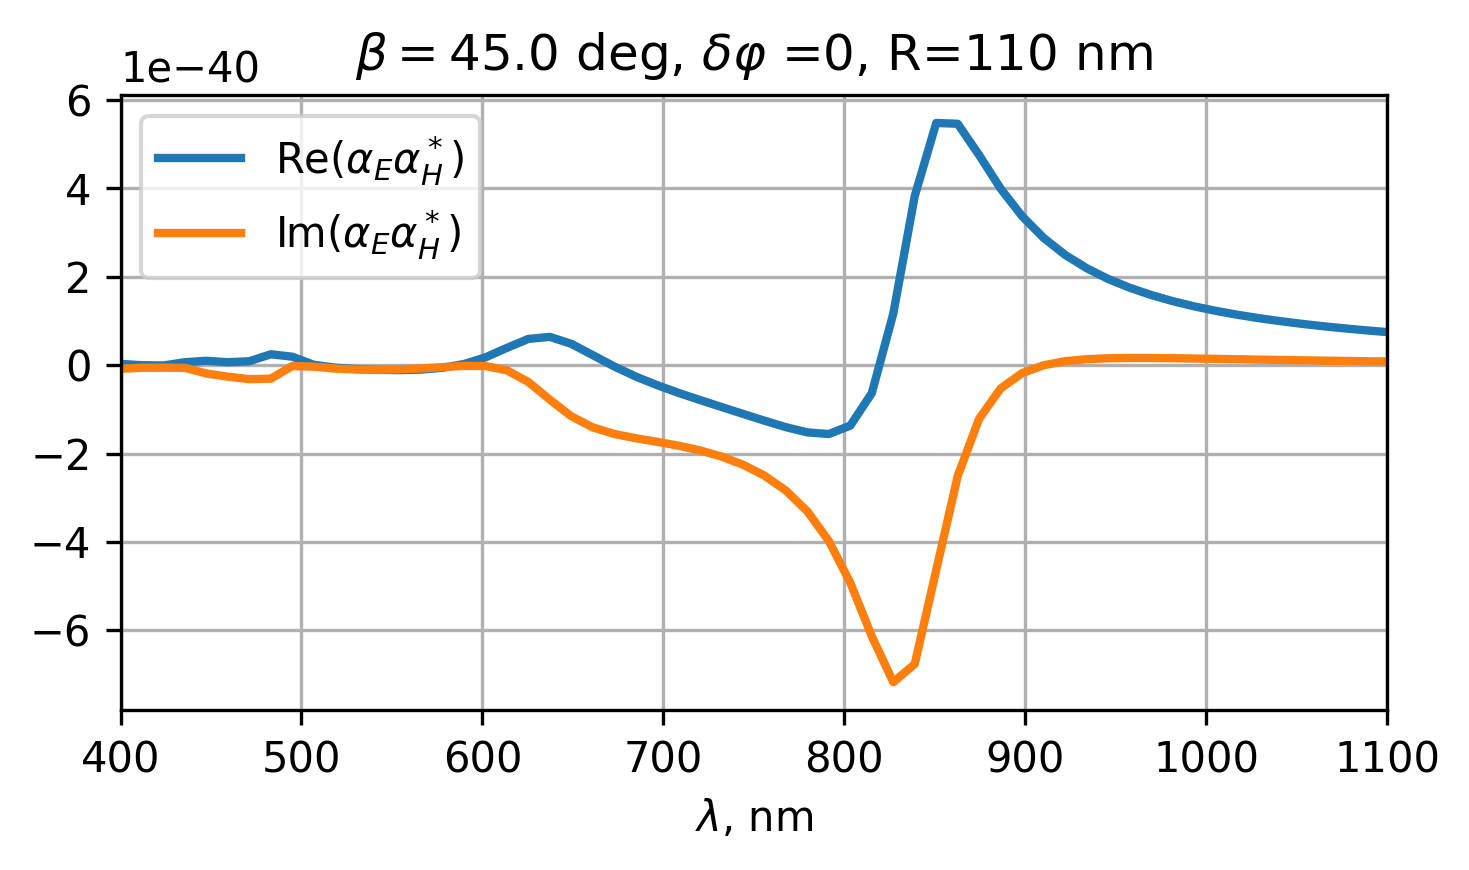

In [211]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, np.real(AlphaEE(wls)*AlphaHH(wls).conj()), label='Re($\\alpha_E \\alpha_H^*$)', lw=2)
plt.plot(wls, np.imag(AlphaEE(wls)*AlphaHH(wls).conj()), label='Im($\\alpha_E \\alpha_H^*$)', lw=2)
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')

plt_set(wls)
plt.legend()
plt.savefig(f'alphaEalphaH_conj_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda.pdf')

#  В зависимости от угла $\theta$

In [256]:
angles = np.array([10, 25, 50, 70])*np.pi/180

F_xx = np.empty((len(angles),len(wls), 8))
F_yy = np.empty_like(F_xx)
F_zz = np.empty_like(F_xx)

Fy_pxmz_angles = np.empty((len(angles),len(wls)))
Fy_pzmx_angles = np.empty((len(angles),len(wls)))

for j, angle in enumerate(angles):
    for i in tqdm(range(len(wls))):
        f =  force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
        F_xx[j,i,:] = f[0]
        F_yy[j,i,:] = f[1]
        F_zz[j,i,:] = f[2]
        P_angle, M_angle = dipoles.calc_dipoles_v2(wls[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
        
        P_angle,M_angle = P_angle[:,0],M_angle[:,0]
        
        Fy_pxmz_exact_angle = - omega(wls[i]) * mu0_const * (np.imag(dyrotGHxz[i])  - k0(wls[i])**3/(12 * np.pi )) * np.real(P_angle[0].conj()*M_angle[2])

        Fy_pzmx_exact_angle = - omega(wls[i]) * mu0_const * (np.imag(dyrotGHzx[i]) + k0(wls[i])**3/(12 * np.pi)) * np.real(P_angle[2].conj() * M_angle[0])

        Fy_pxmz_angles[j,i] = Fy_pxmz_exact_angle
        Fy_pzmx_angles[j,i] = Fy_pzmx_exact_angle
        


100%|██████████| 60/60 [00:00<00:00, 2394.24it/s]


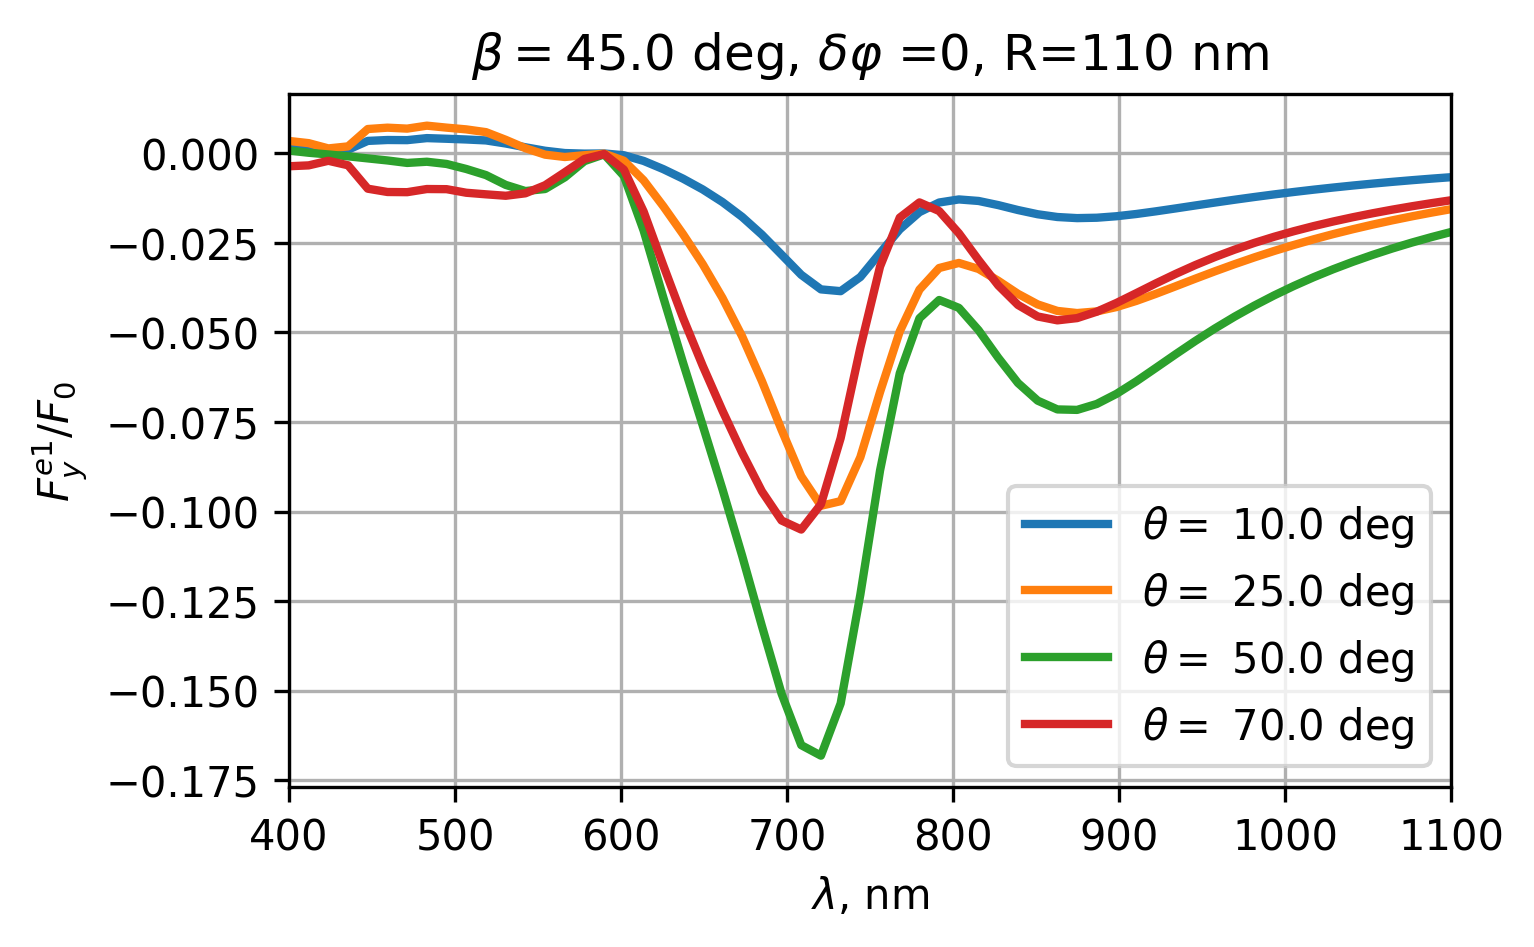

In [265]:
plt.figure(figsize=(5, 3), dpi=300)

for j, angle in enumerate(angles):
    plt.plot(wls, F_yy[j,:,2]/F0, label=f'$\\theta=$ {round(angle*180/np.pi,2)} deg', lw=2)
    
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$F_y^{e1}/F_0$')
plt.legend()
plt.xlim(wls[0], wls[-1])
plt.savefig(f'Fye1_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda_theta.pdf')

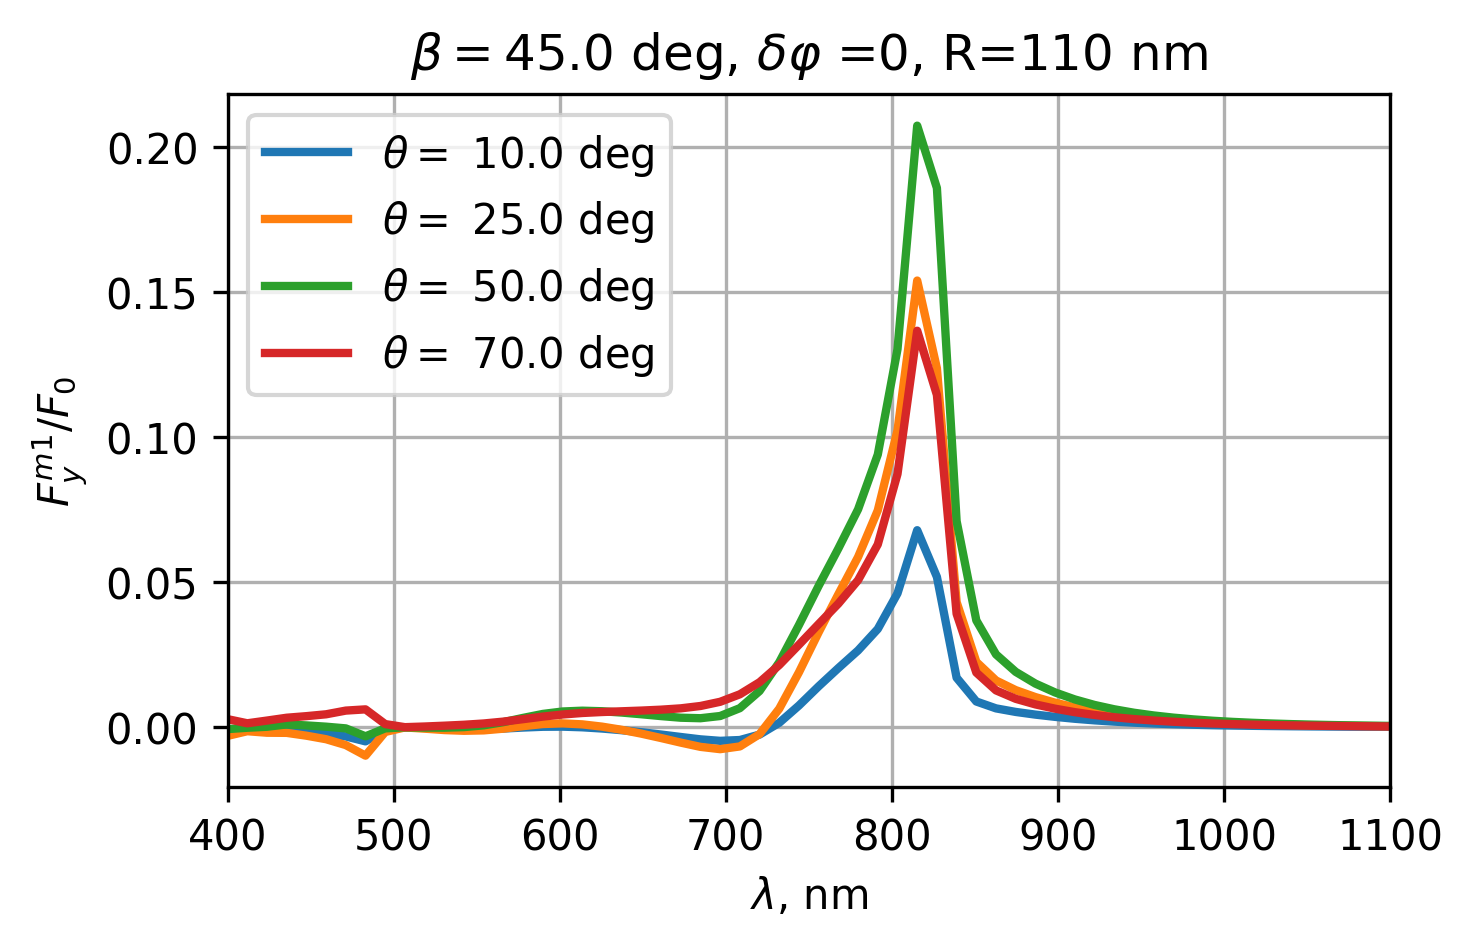

In [266]:
plt.figure(figsize=(5, 3), dpi=300)

for j, angle in enumerate(angles):
    plt.plot(wls, F_yy[j,:,5]/F0, label=f'$\\theta=$ {round(angle*180/np.pi,2)} deg', lw=2)
    
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$F_y^{m1}/F_0$')
plt.legend()
plt.xlim(wls[0], wls[-1])
plt.savefig(f'Fym1_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda_theta.pdf')

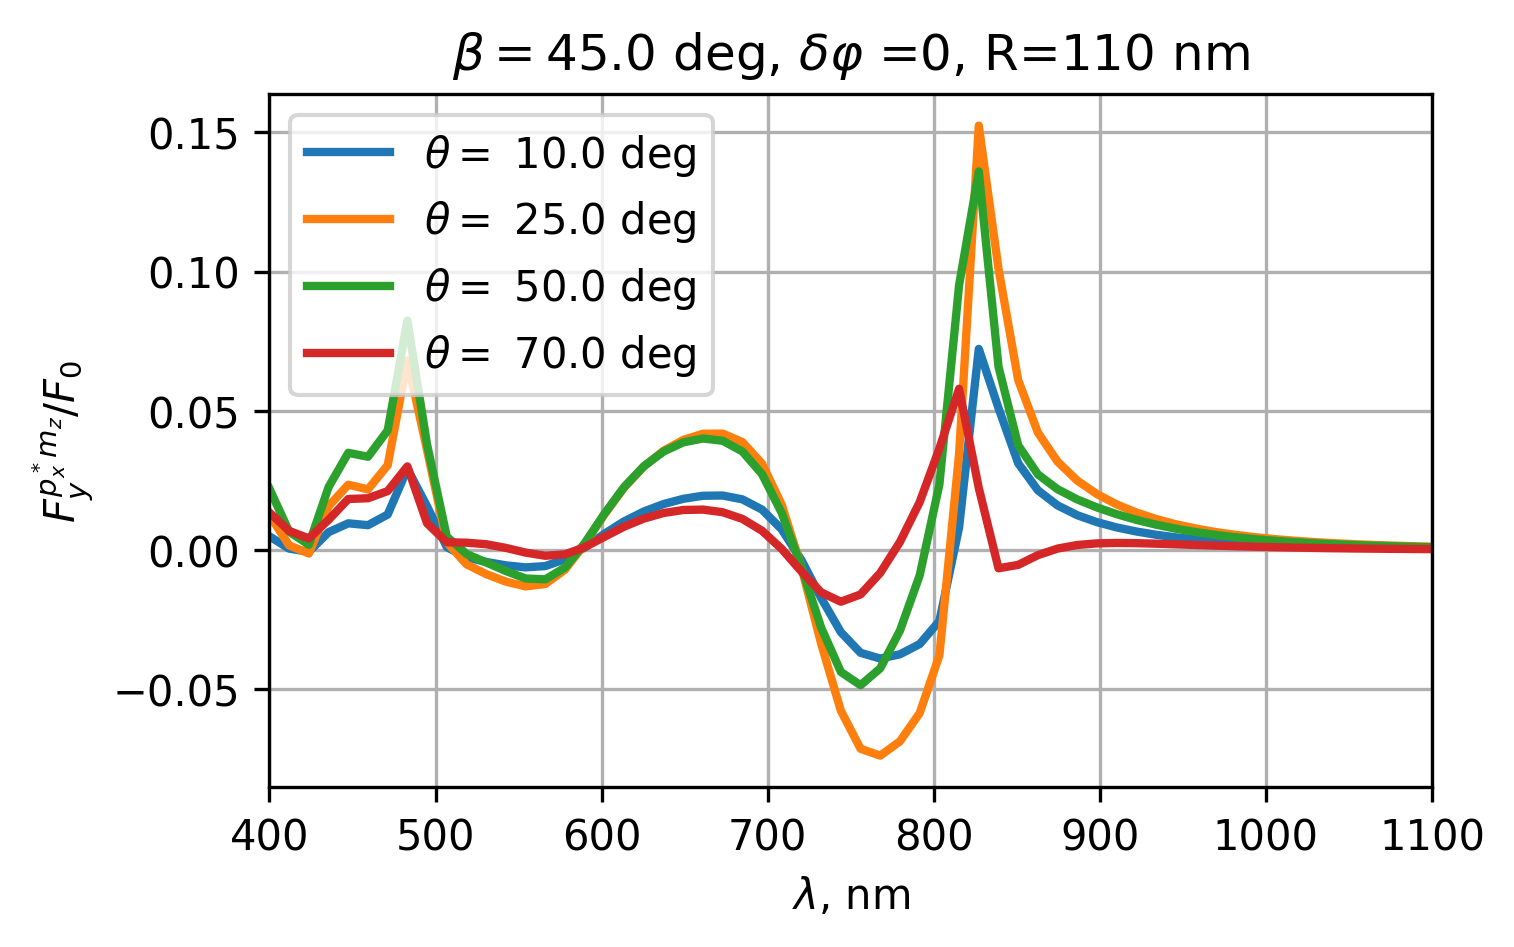

In [267]:
plt.figure(figsize=(5, 3), dpi=300)

for j, angle in enumerate(angles):
    plt.plot(wls, Fy_pxmz_angles[j,:]/F0, label=f'$\\theta=$ {round(angle*180/np.pi,2)} deg', lw=2)
    
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$F_y^{p_x^* m_z}/F_0$')
plt.legend()
plt.xlim(wls[0], wls[-1])
plt.savefig(f'Fypxmz_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda_theta.pdf')
    

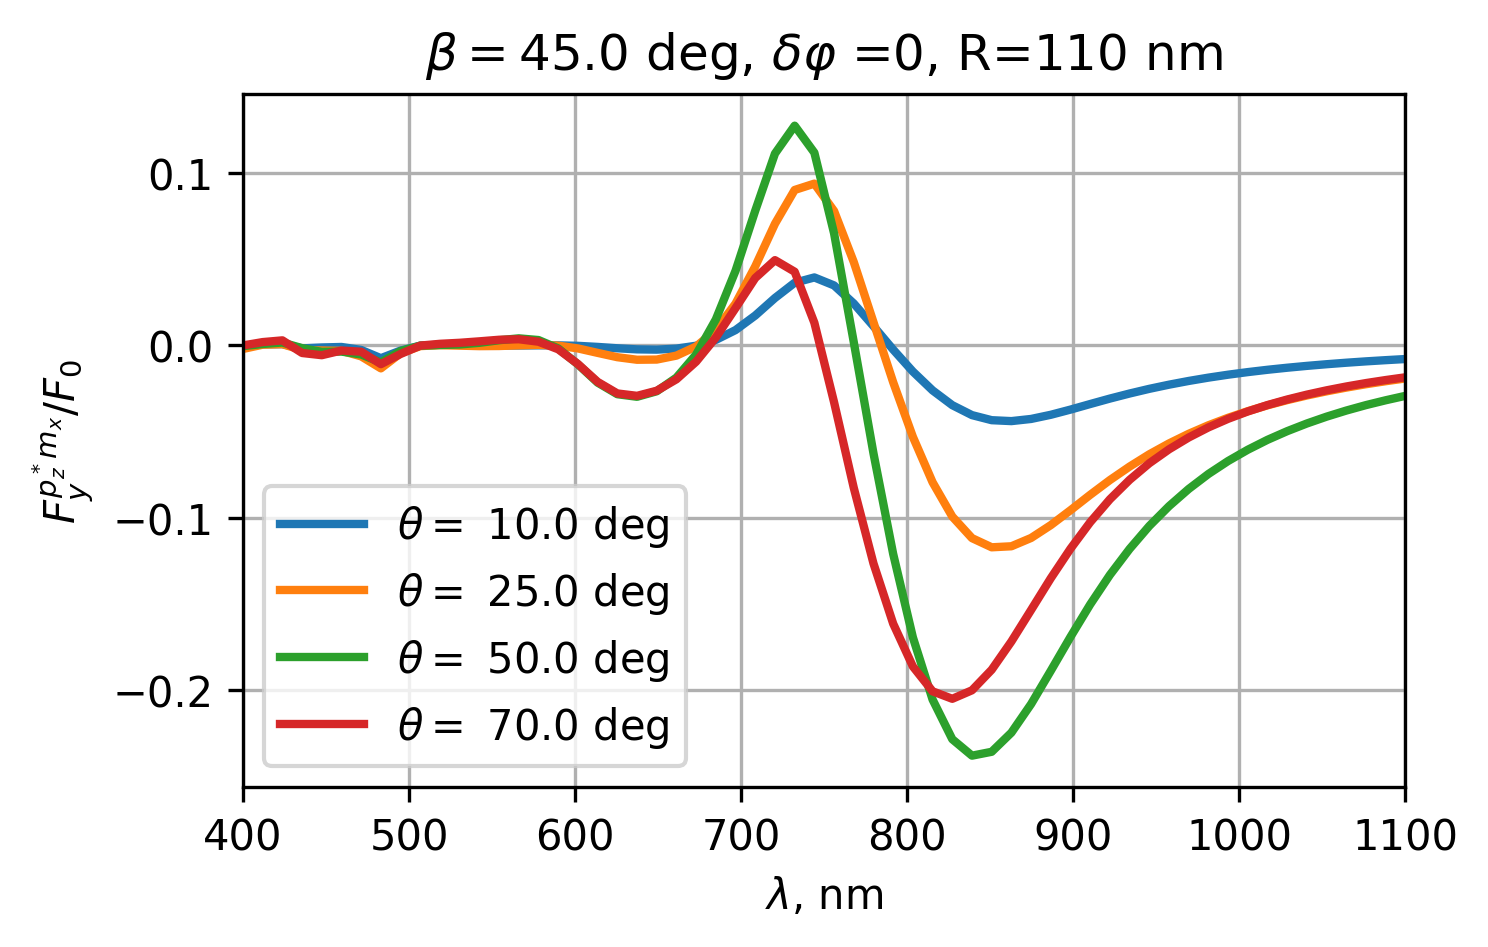

In [268]:
plt.figure(figsize=(5, 3), dpi=300)

for j, angle in enumerate(angles):
    plt.plot(wls, Fy_pzmx_angles[j,:]/F0, label=f'$\\theta=$ {round(angle*180/np.pi,2)} deg', lw=2)
    
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$F_y^{p_z^* m_x}/F_0$')
plt.legend()
plt.xlim(wls[0], wls[-1])
plt.savefig(f'Fypzmx_appr_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_lambda_theta.pdf')

(400.0, 1100.0)

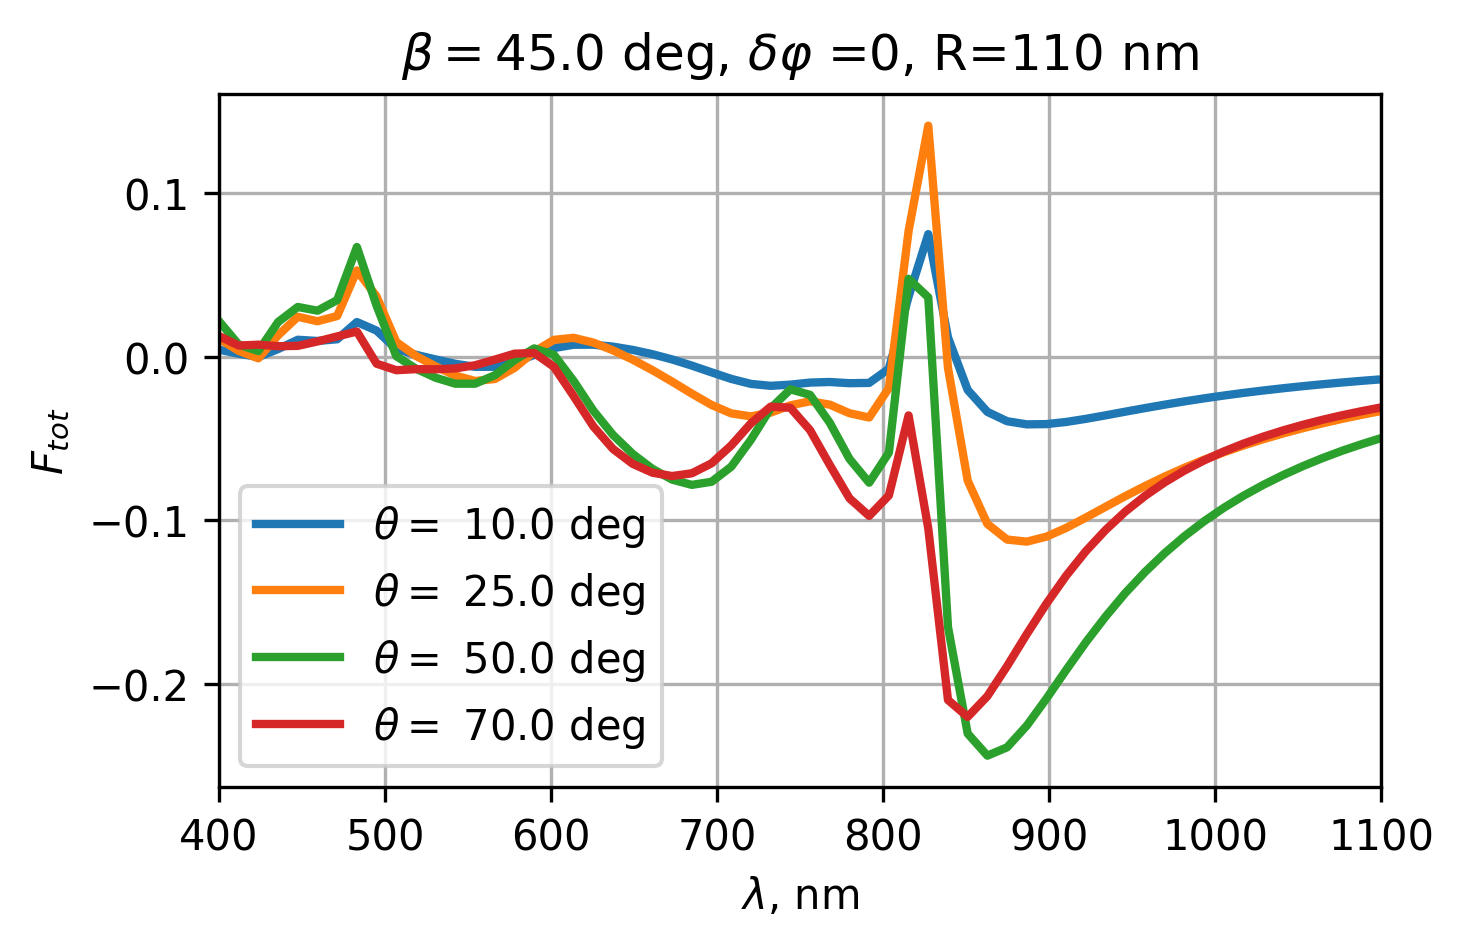

In [273]:
plt.figure(figsize=(5, 3), dpi=300)

for j, angle in enumerate(angles):
    plt.plot(wls, (F_yy[j,:,0])/F0, label=f'$\\theta=$ {round(angle*180/np.pi,2)} deg', lw=2)
    

    
plt.title(f'$\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$F_{tot}$')
plt.legend()
plt.xlim(wls[0], wls[-1])

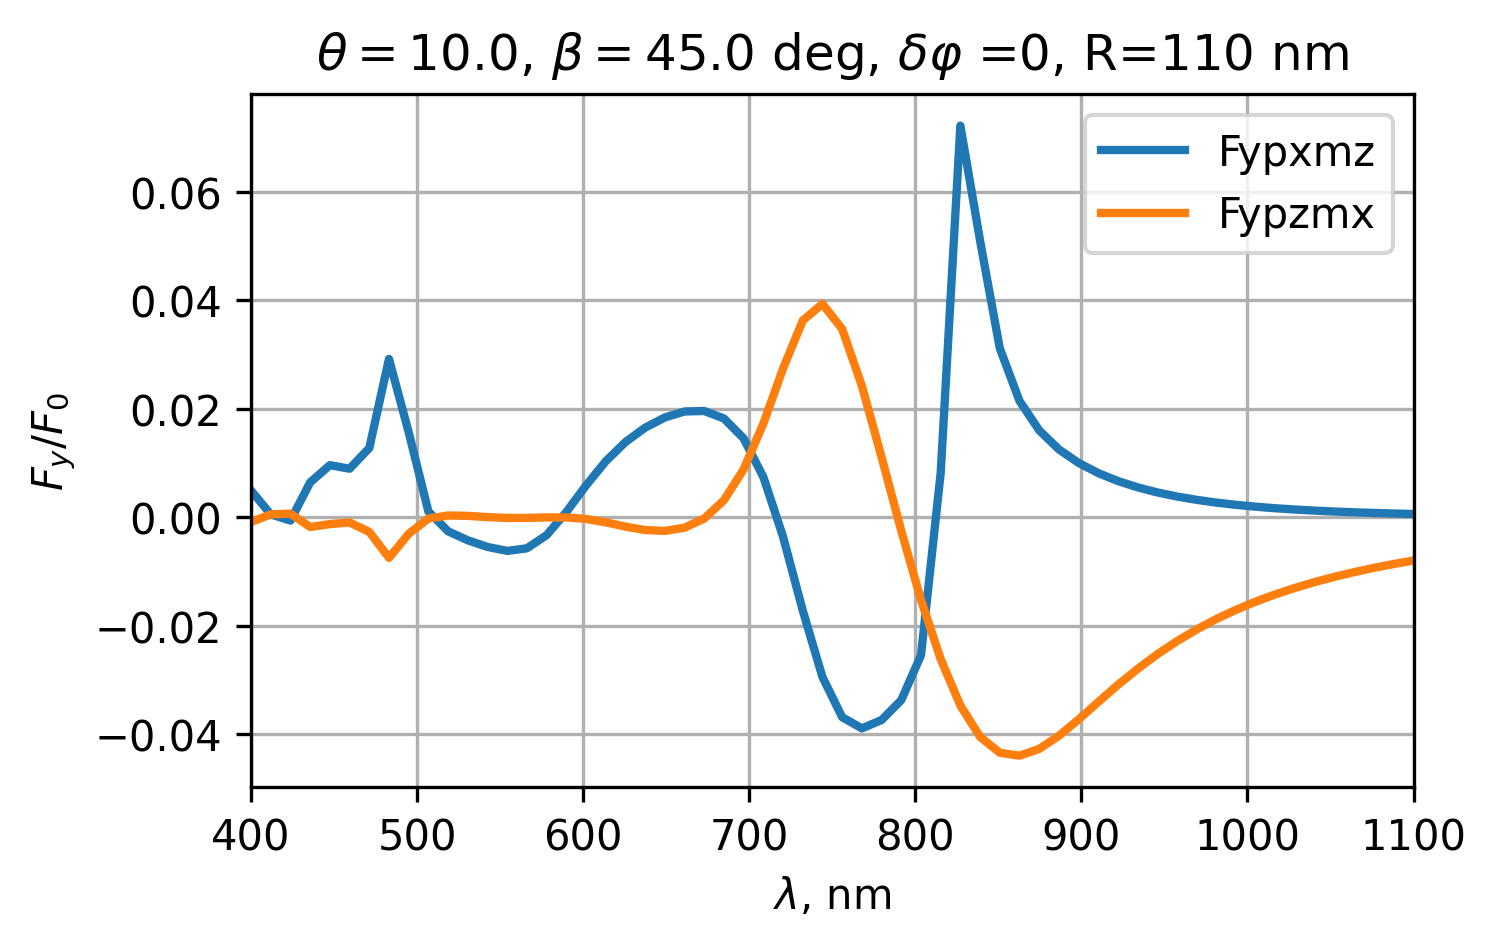

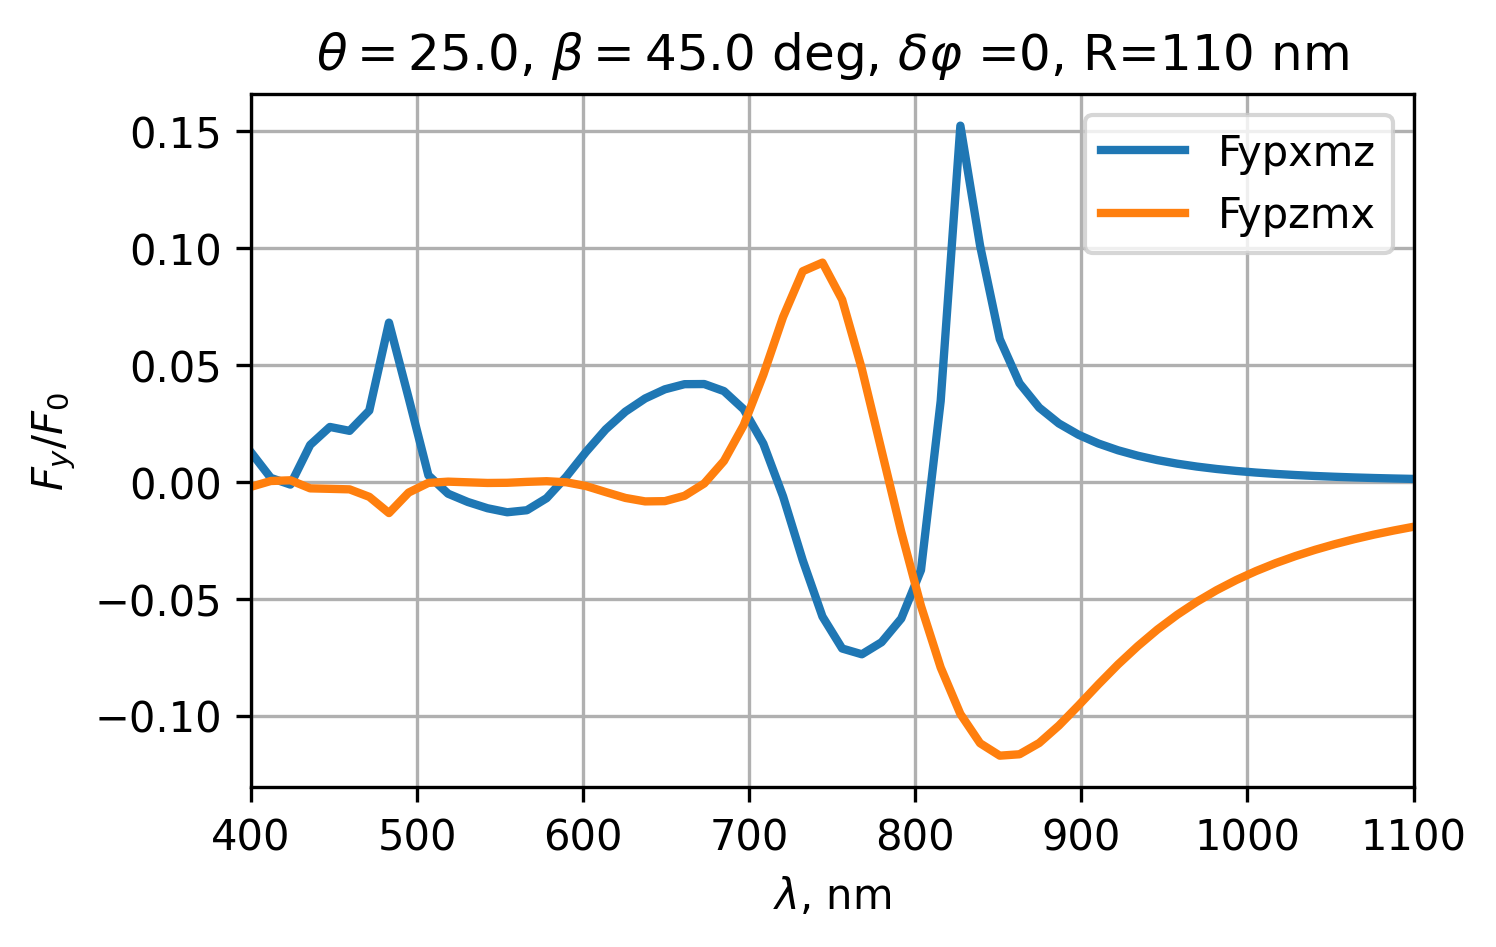

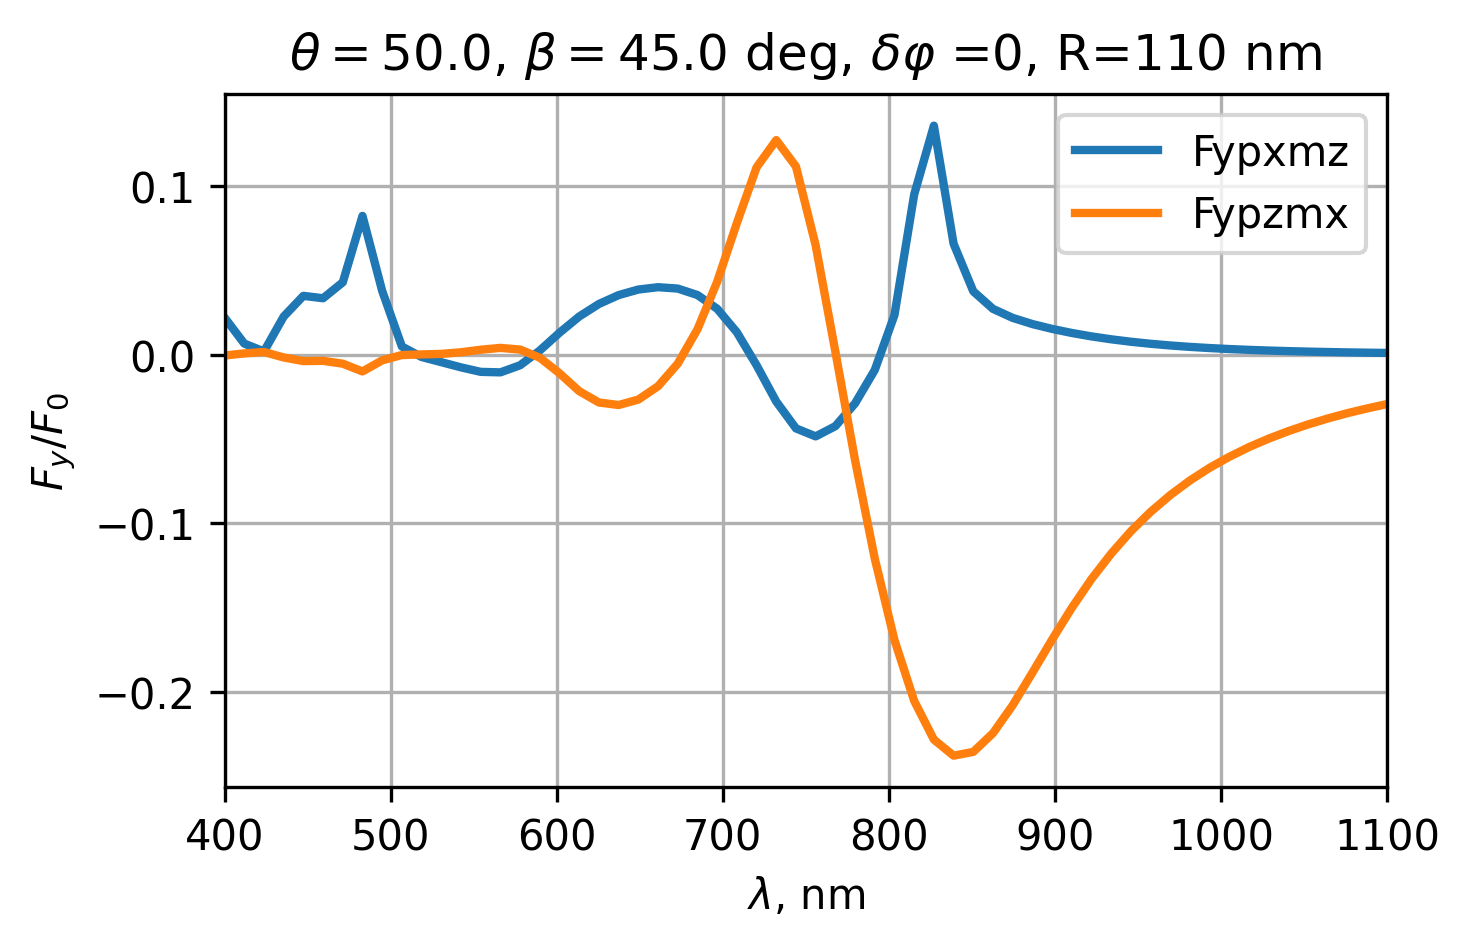

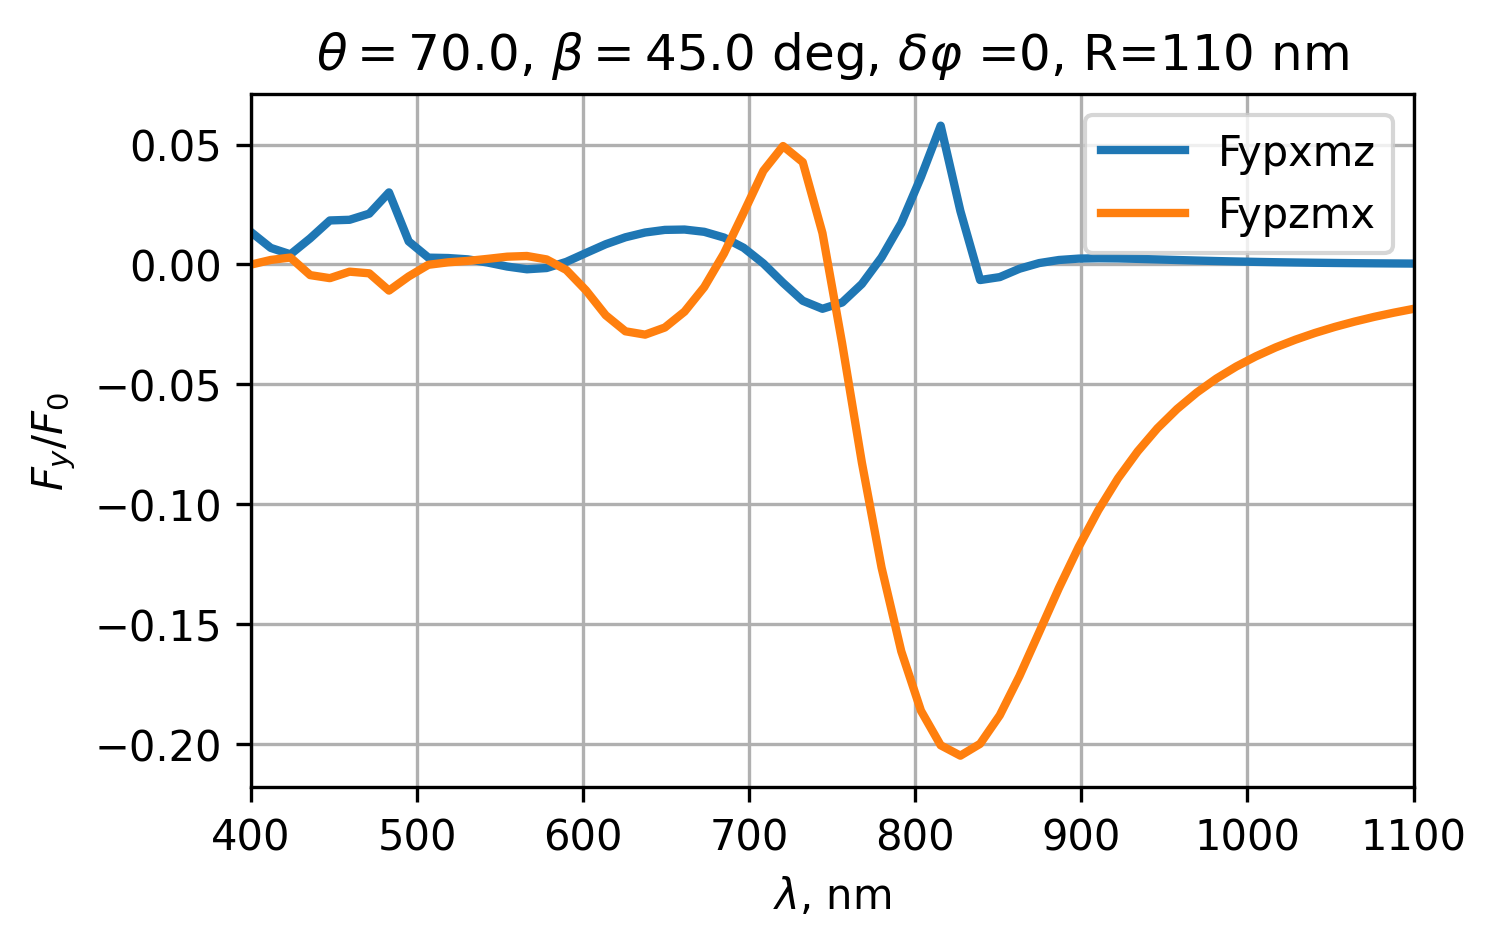

In [272]:

for j, angle in enumerate(angles):
    plt.figure(figsize=(5, 3), dpi=300)
    plt.plot(wls, Fy_pxmz_angles[j,:]/F0, label=f'Fypxmz', lw=2)
    plt.plot(wls, Fy_pzmx_angles[j,:]/F0, label=f'Fypzmx', lw=2)
    plt.title(f'$\\theta=${round(angle*180/np.pi,2)}, $\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
    plt.grid()
    plt.xlabel('$\lambda$, nm')
    plt.ylabel('$F_y/F_0$')
    plt.legend()
    plt.xlim(wls[0], wls[-1])
    plt.show()


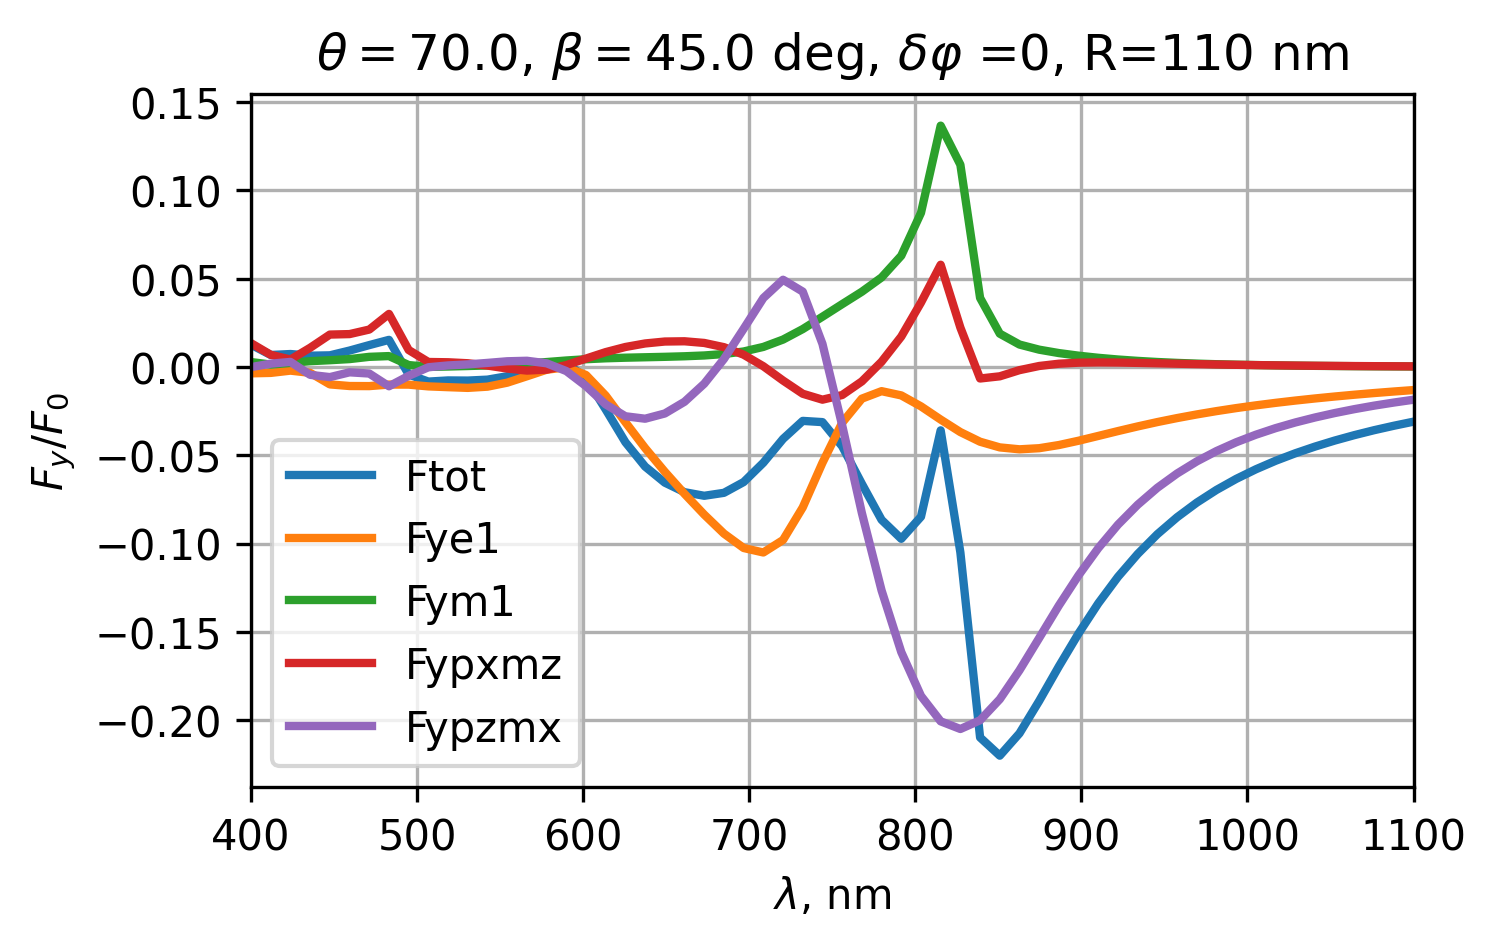

In [274]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, F_yy[-1,:,0]/F0, label=f'Ftot', lw=2)
plt.plot(wls, F_yy[-1,:,2]/F0, label=f'Fye1', lw=2)
plt.plot(wls, F_yy[-1,:,5]/F0, label=f'Fym1', lw=2)

plt.plot(wls, Fy_pxmz_angles[-1,:]/F0, label=f'Fypxmz', lw=2)
plt.plot(wls, Fy_pzmx_angles[-1,:]/F0, label=f'Fypzmx', lw=2)
plt.title(f'$\\theta=${round(angle*180/np.pi,2)}, $\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$F_y/F_0$')
plt.legend()
plt.xlim(wls[0], wls[-1])
plt.show()

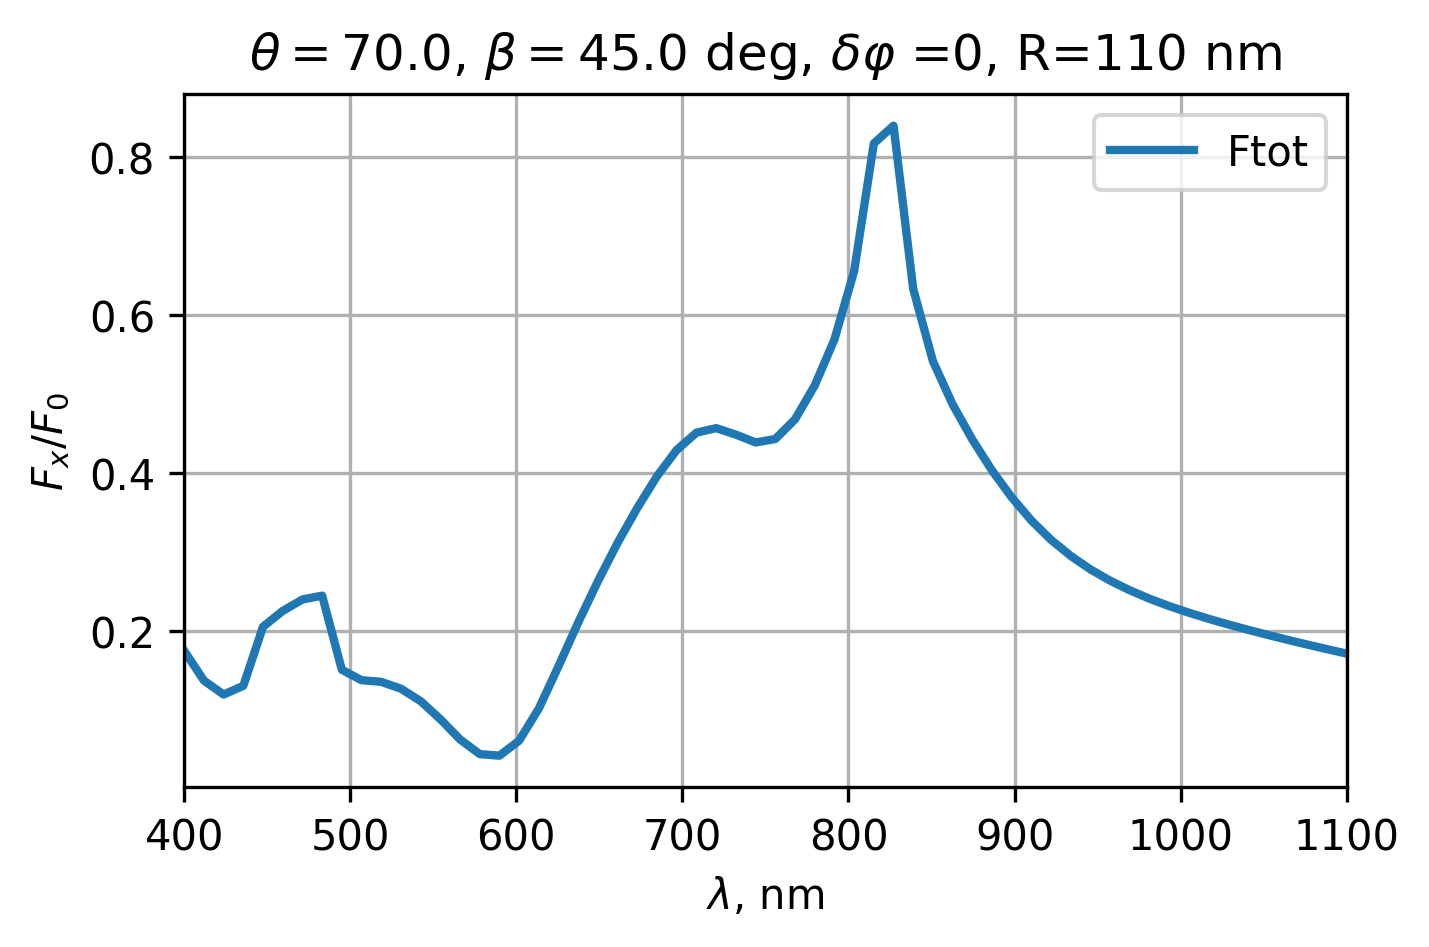

In [275]:
plt.figure(figsize=(5, 3), dpi=300)
plt.plot(wls, F_xx[-1,:,0]/F0, label=f'Ftot', lw=2)

plt.title(f'$\\theta=${round(angle*180/np.pi,2)}, $\\beta=${round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, R={R} nm')
plt.grid()
plt.xlabel('$\lambda$, nm')
plt.ylabel('$F_x/F_0$')
plt.legend()
plt.xlim(wls[0], wls[-1])
plt.show()

## Найти параметры при которых все силы отрицательны  (в зависимости от длин волны и размера частиц) 

